## **Machine Learning**

### *Unsupervised Learning and Dimensionality Reduction*

#### Objective:
For this project, we use some of the clustering and dimensionality reduction algorithms.

#### Set up

Libraries to be used are imported below.

In [ ]:
# Import libraries
import torch
import numpy as np
import pandas as pd
import sklearn
import random
import warnings
import time
from sklearn import preprocessing
from sklearn import svm
from sklearn import datasets
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, make_scorer
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt

# Set random seed for reproducibility
seed = 4    # Jorge's lucky number! :)
np.random.seed(seed)
torch.manual_seed(seed)
random.seed(seed)

# For scikit-learn
sklearn_random_state = seed  # or any other integer

### **Datasets**

The following datasets are selected to design the classification problems:


1.   Diabetes Dataset:
  *   Kaggle (https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

  *   Number of instances: 768
  *   Number of features: 8
  


2.   Concrete Compressive Strength:
  *   UCI ML Repository  (https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)

  *   Number of instances: 1,030
  *   Number of features: 8





The preprocessing of this data was limited, as the datasets were complete and there were no missing values.

In [ ]:
# Create class for a DataFrame dataset
class df_dataset:
    def __init__(self, df):
        # Constructor method to initialize the attributes
        self.df = df
        self.features = df.iloc[:,:-1]
        self.target = df.iloc[:,-1]     # It assumes target values at end of df


    def __str__(self):
        # Method to return a string representation of the object
        return f"DataFrame dataset with df, feature and target attributes"

In [ ]:
# Read the diabetes dataset .CSV file into a DataFrame
df_diabetes = pd.read_csv('diabetes_dataset.csv')

# Create a new df_dataset object for diabetes
diabetes = df_dataset(df_diabetes)

In [ ]:
# Read the concrete strength dataset .XLS file into a DataFrame
df_concrete = pd.read_excel('concrete_dataset.xls')

# Create a new df_dataset object for diabetes
concrete = df_dataset(df_concrete)

### **Algorithms to be Implemented**

We are to implement five algorithms.
The first two are clustering algorithms. We choose our own measures of distance/similarity.
- Expectation Maximization
- K-Means Clustering

The last three are linear dimensionality reduction algorithms:
- Randomized Projections
- Principle Component Analysis (PCA)
- Independent Component Analysis (ICA)

We run several experiments with the goal of disseminating how dimensionality reduction affects your
data.

### **1. Apply Clustering Algorithms**

#### Expectation Maximization (EM)

##### **EM: Diabetes Dataset**


RANDOM STATE: 0

RANDOM STATE: 1

RANDOM STATE: 2

RANDOM STATE: 3

RANDOM STATE: 4

Best n_components according to BIC: 4 with BIC: 8166.139793949699
Best n_components according to AIC: 100 with AIC: -229.5052453946799
Best n_components according to Silhouette Score: 2 with score: 0.16168192109879848
Best n_components according to Log-Likelihood: 100 with value: 4613.75262269734


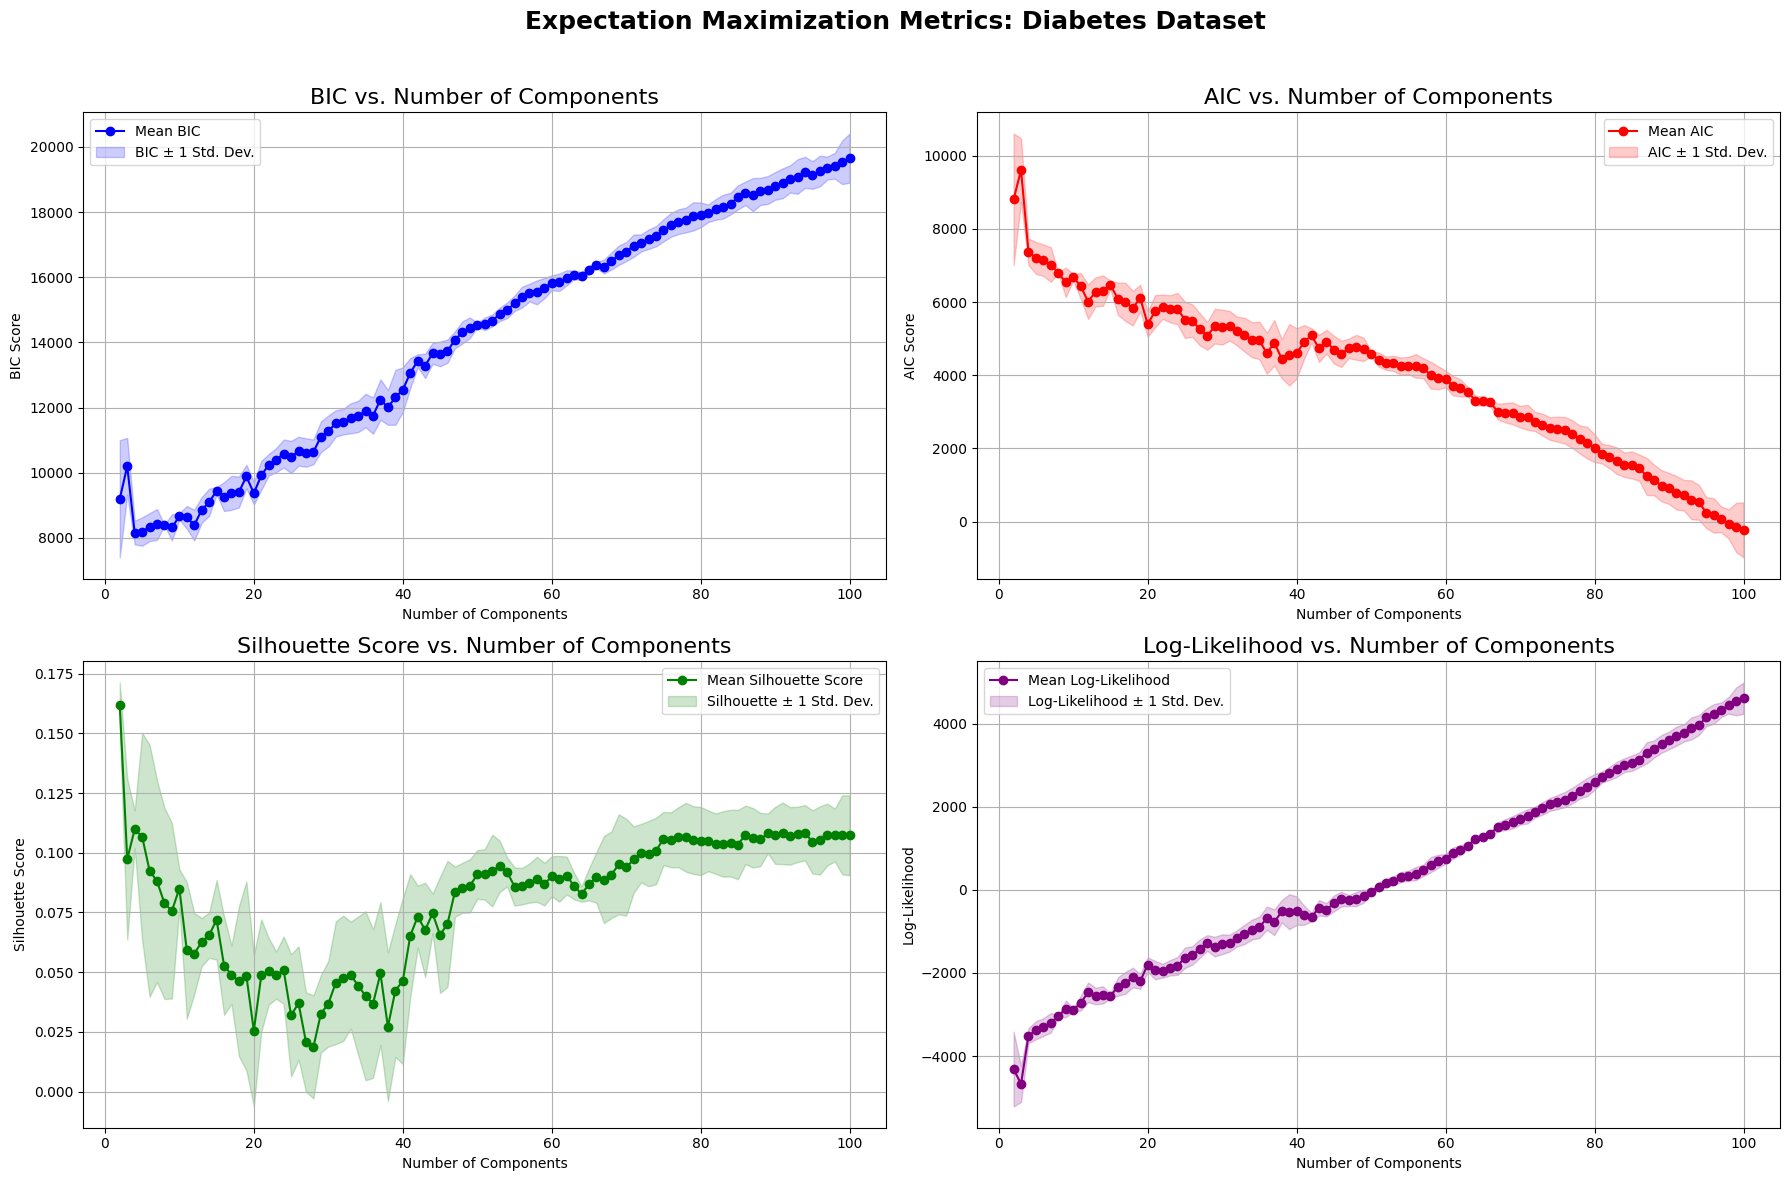

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n_components and random states
n_components_range = list(range(2, 101))
random_states = [0, 1, 2, 3, 4]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes.target, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler_diabetes = StandardScaler()
X_train_scaled = scaler_diabetes.fit_transform(X_train)
X_test_scaled = scaler_diabetes.transform(X_test)

# Store BIC, AIC, Silhouette scores, and Log-Likelihood for each n_components and random state
bic_scores = {n: [] for n in n_components_range}
aic_scores = {n: [] for n in n_components_range}
silhouette_scores = {n: [] for n in n_components_range}
log_likelihood_scores = {n: [] for n in n_components_range}

# Loop through each random state and calculate BIC, AIC, Silhouette, and Log-Likelihood scores
for random_state in random_states:
    print(f"\nRANDOM STATE: {random_state}")
    for n in n_components_range:
        gmm = GaussianMixture(n_components=n, random_state=random_state)
        gmm.fit(X_train_scaled)

        # Record the BIC, AIC, and Log-Likelihood scores
        bic = gmm.bic(X_train_scaled)
        aic = gmm.aic(X_train_scaled)
        log_likelihood = gmm.score(X_train_scaled) * X_train_scaled.shape[0]  # Total log-likelihood
        bic_scores[n].append(bic)
        aic_scores[n].append(aic)
        log_likelihood_scores[n].append(log_likelihood)

        # Calculate Silhouette score only if n_components > 1
        if n > 1:
            y_train_pred = gmm.predict(X_train_scaled)
            s_score = silhouette_score(X_train_scaled, y_train_pred)
            silhouette_scores[n].append(s_score)
        else:
            silhouette_scores[n].append(np.nan)  # Invalid for n=1

        # print(f"random_state={random_state}, n_components={n}, BIC: {bic:.4f}, AIC: {aic:.4f}, s_score: {s_score:.4f}, log_likelihood: {log_likelihood:.4f}")

# Calculate mean and standard deviation for each number of components
bic_mean = [np.mean(bic_scores[n]) for n in n_components_range]
bic_std = [np.std(bic_scores[n]) for n in n_components_range]
aic_mean = [np.mean(aic_scores[n]) for n in n_components_range]
aic_std = [np.std(aic_scores[n]) for n in n_components_range]
silhouette_mean = [np.nanmean(silhouette_scores[n]) for n in n_components_range]
silhouette_std = [np.nanstd(silhouette_scores[n]) for n in n_components_range]
log_likelihood_mean = [np.mean(log_likelihood_scores[n]) for n in n_components_range]
log_likelihood_std = [np.std(log_likelihood_scores[n]) for n in n_components_range]

# Find best n_components according to BIC, AIC, and Silhouette
best_n_components_bic = n_components_range[np.argmin(bic_mean)]
best_n_components_aic = n_components_range[np.argmin(aic_mean)]
best_n_components_silhouette = n_components_range[np.nanargmax(silhouette_mean)]
best_n_components_log_likelihood = n_components_range[np.argmax(log_likelihood_mean)]

best_bic = bic_mean[np.argmin(bic_mean)]
best_aic = aic_mean[np.argmin(aic_mean)]
best_silhouette = silhouette_mean[np.nanargmax(silhouette_mean)]
best_log_likelihood = log_likelihood_mean[np.argmax(log_likelihood_mean)]

print(f"\nBest n_components according to BIC: {best_n_components_bic} with BIC: {best_bic}")
print(f"Best n_components according to AIC: {best_n_components_aic} with AIC: {best_aic}")
print(f"Best n_components according to Silhouette Score: {best_n_components_silhouette} with score: {best_silhouette}")
print(f"Best n_components according to Log-Likelihood: {best_n_components_log_likelihood} with value: {best_log_likelihood}")

# Train the GMM model with the best number of components based on BIC
gmm_model_bic = GaussianMixture(n_components=best_n_components_bic, random_state=4)
gmm_model_bic.fit(X_train_scaled)

# Recompute the mean target value for each predicted cluster after retraining
y_train_pred_bic = gmm_model_bic.predict(X_train_scaled)
cluster_mean_target_bic = {cluster: y_train[y_train_pred_bic == cluster].mean() for cluster in np.unique(y_train_pred_bic)}

# Predict the cluster for each sample in the test set
y_test_pred_bic = gmm_model_bic.predict(X_test_scaled)

# Map the predicted clusters to their corresponding mean target values for the test set
y_test_pred_mapped_bic = np.array([cluster_mean_target_bic[cluster] for cluster in y_test_pred_bic])

# Evaluate using regression-like metrics
mae_bic = mean_absolute_error(y_test, y_test_pred_mapped_bic)
mse_bic = mean_squared_error(y_test, y_test_pred_mapped_bic)
r2_bic = r2_score(y_test, y_test_pred_mapped_bic)
log_likelihood_test = gmm_model_bic.score(X_test_scaled) * X_test_scaled.shape[0]  # Total log-likelihood for test data
sil_score_test = silhouette_score(X_test_scaled, y_test_pred_bic) if best_n_components_bic > 1 else np.nan

# # Output the regression metrics
# print("\nTest set evaluation with regression metrics (BIC-based model):")
# print(f"Mean Absolute Error (MAE): {mae_bic:.4f}")
# print(f"Mean Squared Error (MSE): {mse_bic:.4f}")
# print(f"R² Score: {r2_bic:.4f}")
# print(f"BIC Score for the Test Data: {gmm_model_bic.bic(X_test_scaled):.4f}")
# print(f"AIC Score for the Test Data: {gmm_model_bic.aic(X_test_scaled):.4f}")
# print(f"Silhouette Score for the Test Data: {sil_score_test:.4f}")
# print(f"Log-Likelihood for the Test Data: {log_likelihood_test:.4f}")

# Plot the BIC, AIC, Silhouette scores, and Log-Likelihood with variability
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("Expectation Maximization Metrics: Diabetes Dataset" ,fontsize=18,fontweight='bold')

# Plot BIC on the first subplot
axes[0, 0].plot(n_components_range, bic_mean, marker='o', linestyle='-', color='b', label="Mean BIC")
axes[0, 0].fill_between(n_components_range, np.array(bic_mean) - np.array(bic_std),
                        np.array(bic_mean) + np.array(bic_std), color='b', alpha=0.2, label="BIC ± 1 Std. Dev.")
axes[0, 0].set_title("BIC vs. Number of Components" ,fontsize=16)
axes[0, 0].set_xlabel("Number of Components")
axes[0, 0].set_ylabel("BIC Score")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot AIC on the second subplot
axes[0, 1].plot(n_components_range, aic_mean, marker='o', linestyle='-', color='r', label="Mean AIC")
axes[0, 1].fill_between(n_components_range, np.array(aic_mean) - np.array(aic_std),
                        np.array(aic_mean) + np.array(aic_std), color='r', alpha=0.2, label="AIC ± 1 Std. Dev.")
axes[0, 1].set_title("AIC vs. Number of Components",fontsize=16)
axes[0, 1].set_xlabel("Number of Components")
axes[0, 1].set_ylabel("AIC Score")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot Silhouette Score on the third subplot
axes[1, 0].plot(n_components_range, silhouette_mean, marker='o', linestyle='-', color='g', label="Mean Silhouette Score")
axes[1, 0].fill_between(n_components_range, np.array(silhouette_mean) - np.array(silhouette_std),
                        np.array(silhouette_mean) + np.array(silhouette_std), color='g', alpha=0.2, label="Silhouette ± 1 Std. Dev.")
axes[1, 0].set_title("Silhouette Score vs. Number of Components",fontsize=16)
axes[1, 0].set_xlabel("Number of Components")
axes[1, 0].set_ylabel("Silhouette Score")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot Log-Likelihood on the fourth subplot
axes[1, 1].plot(n_components_range, log_likelihood_mean, marker='o', linestyle='-', color='purple', label="Mean Log-Likelihood")
axes[1, 1].fill_between(n_components_range, np.array(log_likelihood_mean) - np.array(log_likelihood_std),
                        np.array(log_likelihood_mean) + np.array(log_likelihood_std), color='purple', alpha=0.2, label="Log-Likelihood ± 1 Std. Dev.")
axes[1, 1].set_title("Log-Likelihood vs. Number of Components",fontsize=16)
axes[1, 1].set_xlabel("Number of Components")
axes[1, 1].set_ylabel("Log-Likelihood")
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# import pandas as pd
# from sklearn import preprocessing
# from sklearn.mixture import GaussianMixture
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score, confusion_matrix, classification_report, accuracy_score
# from sklearn.model_selection import train_test_split
# import numpy as np
# import time


# # Encode the target labels to numerical values
# Label = preprocessing.LabelEncoder()
# diabetes_outcome = Label.fit_transform(diabetes.target)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state = seed, shuffle=True)

# # Scale the features
# scaler_diab = StandardScaler()
# scaler_diab.fit(X_train)
# X_train_scaled = scaler_diab.transform(X_train)
# X_test_scaled = scaler_diab.transform(X_test)

# # Find the optimal n_components using cross-validation
# best_n_components = None
# best_silhouette_score = -1

# for n in range(2, 11):
#     gmm = GaussianMixture(n_components=n, random_state= seed)
#     gmm.fit(X_train_scaled)

#     # Predict clusters on the training data
#     y_train_pred = gmm.predict(X_train_scaled)

#     # Calculate silhouette score for the current model
#     sil_score = silhouette_score(X_train_scaled, y_train_pred)

#     print(f"n_components={n}, Silhouette Score: {sil_score:.4f}")

#     # Keep track of the best model
#     if sil_score > best_silhouette_score:
#         best_silhouette_score = sil_score
#         best_n_components = n

# print(f"\nBest n_components: {best_n_components} with Silhouette Score: {best_silhouette_score:.4f}")

# # Train the GMM model with the best number of components on the entire training data
# gmm_model = GaussianMixture(n_components=best_n_components, random_state = seed)
# gmm_model.fit(X_train_scaled)

# # Predict the clusters for the test data
# query_start_time = time.time()
# y_test_pred = gmm_model.predict(X_test_scaled)
# query_time = time.time() - query_start_time
# print(f"Query time (prediction time): {query_time:.4f} seconds")

# # Calculate silhouette score for the test set
# sil_score_test = silhouette_score(X_test_scaled, y_test_pred)
# print(f"Silhouette Score for Test Data: {sil_score_test:.4f}")

# # Compare predicted clusters to actual test labels
# print("\nTest set evaluation:")
# print("Confusion matrix: ")
# print(confusion_matrix(y_test, y_test_pred))
# print("Classification report: ")
# print(classification_report(y_test, y_test_pred, zero_division=np.nan))
# print("Accuracy score between y_test and y_test_pred: ")
# print(accuracy_score(y_test, y_test_pred))


##### **EM: Concrete Strength Dataset**


RANDOM STATE: 0

RANDOM STATE: 1

RANDOM STATE: 2

RANDOM STATE: 3

RANDOM STATE: 4

Best n_components according to BIC: 74 with BIC: -8761.403076847182
Best n_components according to AIC: 100 with AIC: -27701.288887325412
Best n_components according to Silhouette Score: 100 with score: 0.3129652046914505
Best n_components according to Log-Likelihood: 100 with value: 18349.644443662706


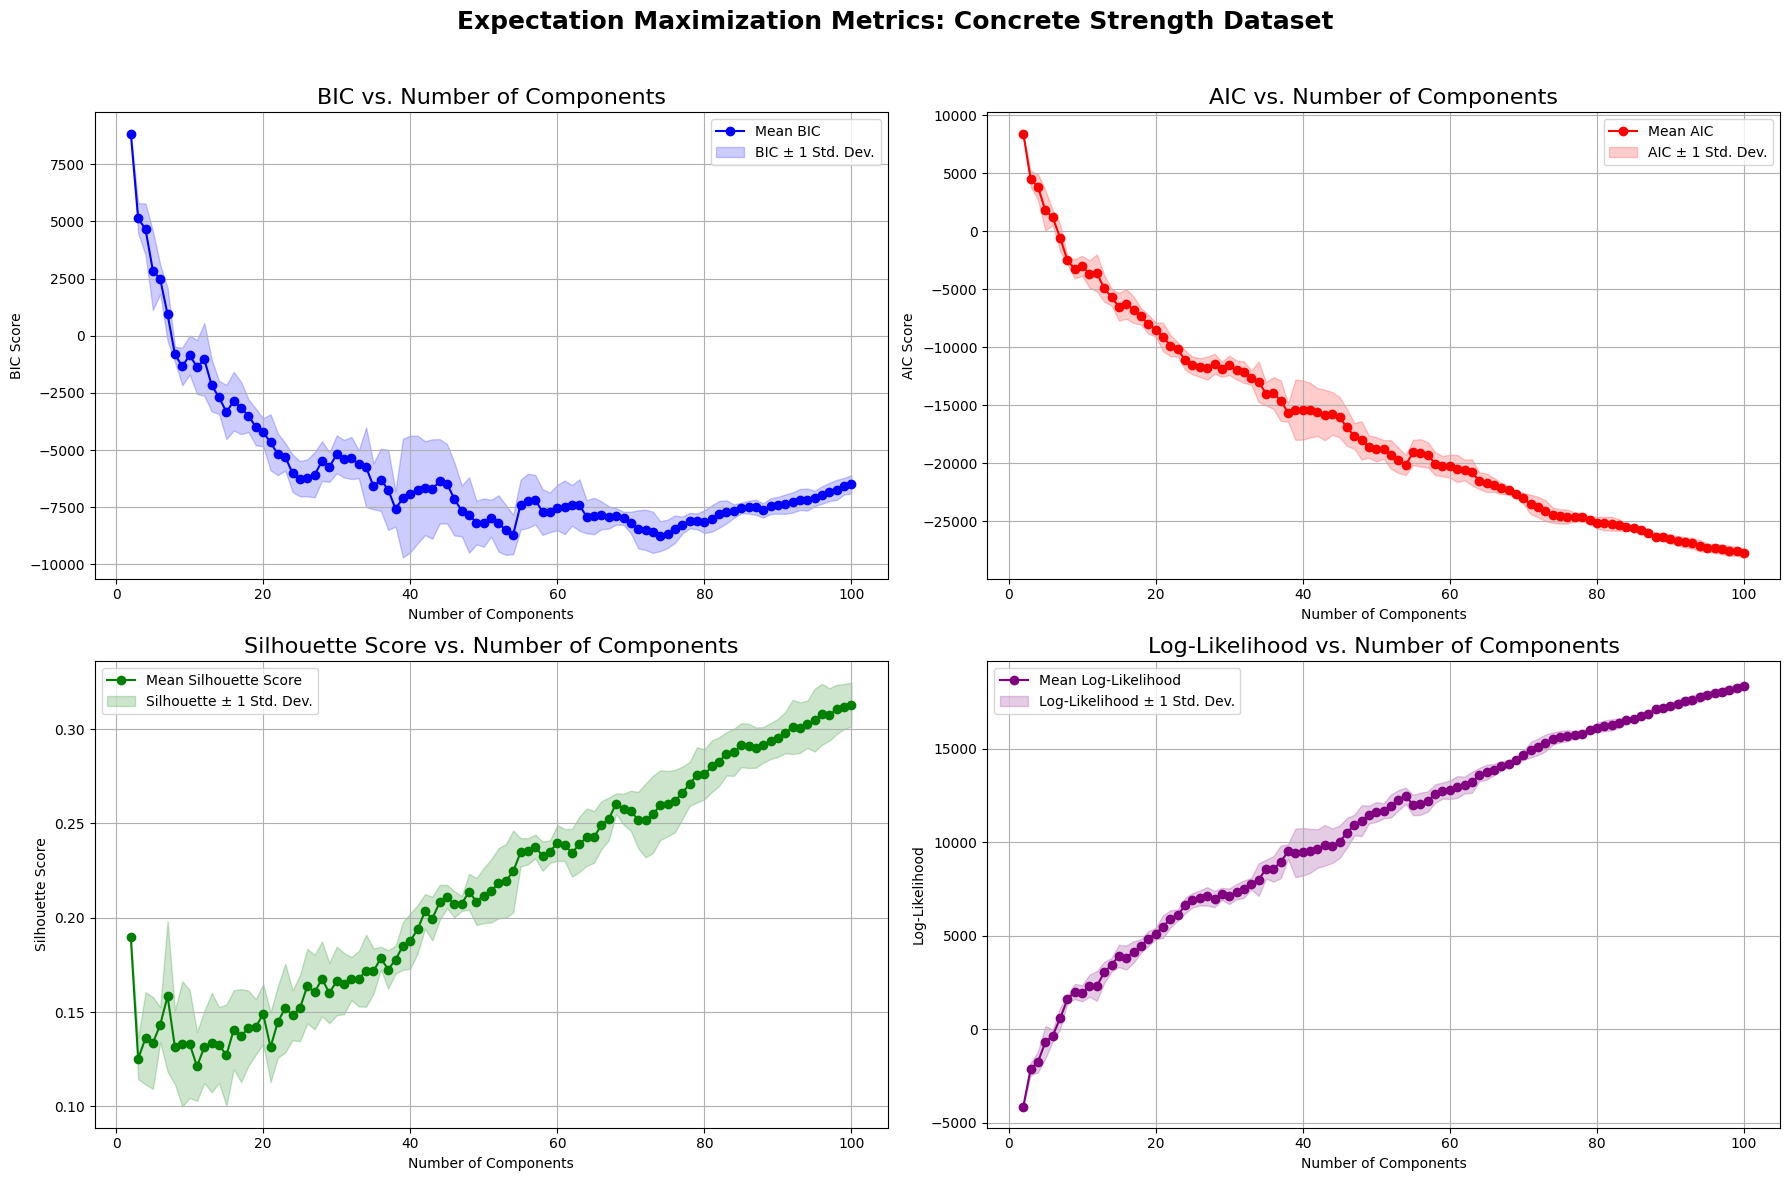

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n_components and random states
n_components_range = list(range(2, 101))
random_states = [0, 1, 2, 3, 4]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(concrete.features, concrete.target, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler_concrete = StandardScaler()
X_train_scaled = scaler_concrete.fit_transform(X_train)
X_test_scaled = scaler_concrete.transform(X_test)

# Store BIC, AIC, Silhouette scores, and Log-Likelihood for each n_components and random state
bic_scores = {n: [] for n in n_components_range}
aic_scores = {n: [] for n in n_components_range}
silhouette_scores = {n: [] for n in n_components_range}
log_likelihood_scores = {n: [] for n in n_components_range}

# Loop through each random state and calculate BIC, AIC, Silhouette, and Log-Likelihood scores
for random_state in random_states:
    print(f"\nRANDOM STATE: {random_state}")
    for n in n_components_range:
        gmm = GaussianMixture(n_components=n, random_state=random_state)
        gmm.fit(X_train_scaled)

        # Record the BIC, AIC, and Log-Likelihood scores
        bic = gmm.bic(X_train_scaled)
        aic = gmm.aic(X_train_scaled)
        log_likelihood = gmm.score(X_train_scaled) * X_train_scaled.shape[0]  # Total log-likelihood
        bic_scores[n].append(bic)
        aic_scores[n].append(aic)
        log_likelihood_scores[n].append(log_likelihood)

        # Calculate Silhouette score only if n_components > 1
        if n > 1:
            y_train_pred = gmm.predict(X_train_scaled)
            s_score = silhouette_score(X_train_scaled, y_train_pred)
            silhouette_scores[n].append(s_score)
        else:
            silhouette_scores[n].append(np.nan)  # Invalid for n=1

        # print(f"random_state={random_state}, n_components={n}, BIC: {bic:.4f}, AIC: {aic:.4f}, s_score: {s_score:.4f}, log_likelihood: {log_likelihood:.4f}")

# Calculate mean and standard deviation for each number of components
bic_mean = [np.mean(bic_scores[n]) for n in n_components_range]
bic_std = [np.std(bic_scores[n]) for n in n_components_range]
aic_mean = [np.mean(aic_scores[n]) for n in n_components_range]
aic_std = [np.std(aic_scores[n]) for n in n_components_range]
silhouette_mean = [np.nanmean(silhouette_scores[n]) for n in n_components_range]
silhouette_std = [np.nanstd(silhouette_scores[n]) for n in n_components_range]
log_likelihood_mean = [np.mean(log_likelihood_scores[n]) for n in n_components_range]
log_likelihood_std = [np.std(log_likelihood_scores[n]) for n in n_components_range]

# Find best n_components according to BIC, AIC, and Silhouette
best_n_components_bic = n_components_range[np.argmin(bic_mean)]
best_n_components_aic = n_components_range[np.argmin(aic_mean)]
best_n_components_silhouette = n_components_range[np.nanargmax(silhouette_mean)]
best_n_components_log_likelihood = n_components_range[np.argmax(log_likelihood_mean)]

best_bic = bic_mean[np.argmin(bic_mean)]
best_aic = aic_mean[np.argmin(aic_mean)]
best_silhouette = silhouette_mean[np.nanargmax(silhouette_mean)]
best_log_likelihood = log_likelihood_mean[np.argmax(log_likelihood_mean)]

print(f"\nBest n_components according to BIC: {best_n_components_bic} with BIC: {best_bic}")
print(f"Best n_components according to AIC: {best_n_components_aic} with AIC: {best_aic}")
print(f"Best n_components according to Silhouette Score: {best_n_components_silhouette} with score: {best_silhouette}")
print(f"Best n_components according to Log-Likelihood: {best_n_components_log_likelihood} with value: {best_log_likelihood}")

# Train the GMM model with the best number of components based on BIC
gmm_model_bic = GaussianMixture(n_components=best_n_components_bic, random_state=4)
gmm_model_bic.fit(X_train_scaled)

# Recompute the mean target value for each predicted cluster after retraining
y_train_pred_bic = gmm_model_bic.predict(X_train_scaled)
cluster_mean_target_bic = {cluster: y_train[y_train_pred_bic == cluster].mean() for cluster in np.unique(y_train_pred_bic)}

# Predict the cluster for each sample in the test set
y_test_pred_bic = gmm_model_bic.predict(X_test_scaled)

# Map the predicted clusters to their corresponding mean target values for the test set
y_test_pred_mapped_bic = np.array([cluster_mean_target_bic[cluster] for cluster in y_test_pred_bic])

# Evaluate using regression-like metrics
mae_bic = mean_absolute_error(y_test, y_test_pred_mapped_bic)
mse_bic = mean_squared_error(y_test, y_test_pred_mapped_bic)
r2_bic = r2_score(y_test, y_test_pred_mapped_bic)
log_likelihood_test = gmm_model_bic.score(X_test_scaled) * X_test_scaled.shape[0]  # Total log-likelihood for test data
sil_score_test = silhouette_score(X_test_scaled, y_test_pred_bic) if best_n_components_bic > 1 else np.nan

# # Output the regression metrics
# print("\nTest set evaluation with regression metrics (BIC-based model):")
# print(f"Mean Absolute Error (MAE): {mae_bic:.4f}")
# print(f"Mean Squared Error (MSE): {mse_bic:.4f}")
# print(f"R² Score: {r2_bic:.4f}")
# print(f"BIC Score for the Test Data: {gmm_model_bic.bic(X_test_scaled):.4f}")
# print(f"AIC Score for the Test Data: {gmm_model_bic.aic(X_test_scaled):.4f}")
# print(f"Silhouette Score for the Test Data: {sil_score_test:.4f}")
# print(f"Log-Likelihood for the Test Data: {log_likelihood_test:.4f}")


# Plot the BIC, AIC, Silhouette scores, and Log-Likelihood with variability
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("Expectation Maximization Metrics: Concrete Strength Dataset",fontsize=18,fontweight='bold')

# Plot BIC on the first subplot
axes[0, 0].plot(n_components_range, bic_mean, marker='o', linestyle='-', color='b', label="Mean BIC")
axes[0, 0].fill_between(n_components_range, np.array(bic_mean) - np.array(bic_std),
                        np.array(bic_mean) + np.array(bic_std), color='b', alpha=0.2, label="BIC ± 1 Std. Dev.")
axes[0, 0].set_title("BIC vs. Number of Components",fontsize=16)
axes[0, 0].set_xlabel("Number of Components")
axes[0, 0].set_ylabel("BIC Score")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot AIC on the second subplot
axes[0, 1].plot(n_components_range, aic_mean, marker='o', linestyle='-', color='r', label="Mean AIC")
axes[0, 1].fill_between(n_components_range, np.array(aic_mean) - np.array(aic_std),
                        np.array(aic_mean) + np.array(aic_std), color='r', alpha=0.2, label="AIC ± 1 Std. Dev.")
axes[0, 1].set_title("AIC vs. Number of Components",fontsize=16)
axes[0, 1].set_xlabel("Number of Components")
axes[0, 1].set_ylabel("AIC Score")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot Silhouette Score on the third subplot
axes[1, 0].plot(n_components_range, silhouette_mean, marker='o', linestyle='-', color='g', label="Mean Silhouette Score")
axes[1, 0].fill_between(n_components_range, np.array(silhouette_mean) - np.array(silhouette_std),
                        np.array(silhouette_mean) + np.array(silhouette_std), color='g', alpha=0.2, label="Silhouette ± 1 Std. Dev.")
axes[1, 0].set_title("Silhouette Score vs. Number of Components",fontsize=16)
axes[1, 0].set_xlabel("Number of Components")
axes[1, 0].set_ylabel("Silhouette Score")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot Log-Likelihood on the fourth subplot
axes[1, 1].plot(n_components_range, log_likelihood_mean, marker='o', linestyle='-', color='purple', label="Mean Log-Likelihood")
axes[1, 1].fill_between(n_components_range, np.array(log_likelihood_mean) - np.array(log_likelihood_std),
                        np.array(log_likelihood_mean) + np.array(log_likelihood_std), color='purple', alpha=0.2, label="Log-Likelihood ± 1 Std. Dev.")
axes[1, 1].set_title("Log-Likelihood vs. Number of Components",fontsize=16)
axes[1, 1].set_xlabel("Number of Components")
axes[1, 1].set_ylabel("Log-Likelihood")
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### K-Means Clustering (K-Means)

##### **K-Means: Diabetes Dataset**


RANDOM STATE: 0

RANDOM STATE: 1

RANDOM STATE: 2

RANDOM STATE: 3

RANDOM STATE: 4

Best n_components according to Inertia: 100  with score: 713.4558602970197
Best n_components according to Silhouette Score: 3  with score: 0.18640596411636862
Best n_components according to VRC (Calinski-Harabasz): 3  with score: 122.04418215983995
Best n_components according to Davies-Bouldin Index: 100  with score: 1.18821118656811


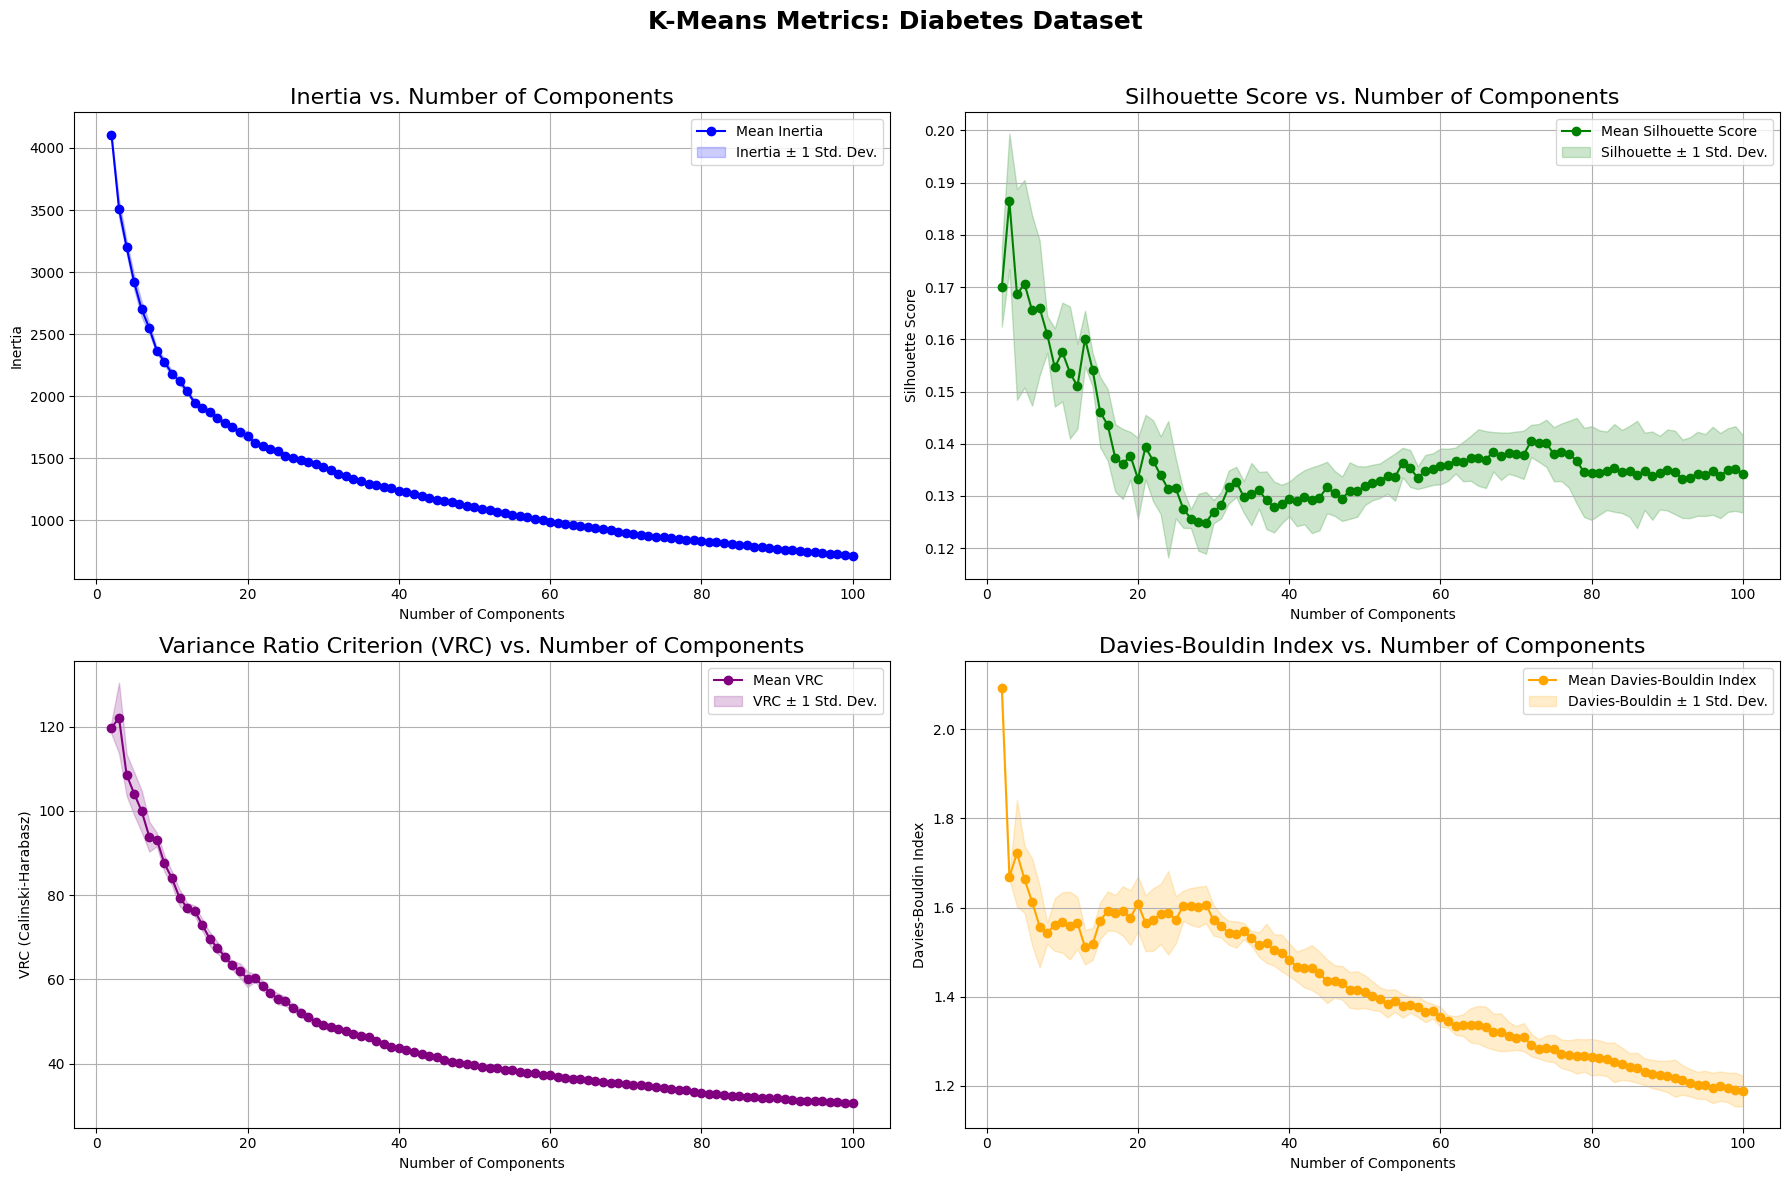

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n_components (clusters) and random states
n_components_range = list(range(2, 101))
random_states = [0, 1, 2, 3, 4]

# Assuming you have the diabetes dataset loaded into a DataFrame `diabetes`
# and split into features and target
X = diabetes.features
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler_diabetes = StandardScaler()
X_train_scaled = scaler_diabetes.fit_transform(X_train)
X_test_scaled = scaler_diabetes.transform(X_test)

# Store inertia, silhouette, VRC, and Davies-Bouldin scores for each n_components and random state
inertia_scores = {n: [] for n in n_components_range}
silhouette_scores = {n: [] for n in n_components_range}
vrc_scores = {n: [] for n in n_components_range}
davies_bouldin_scores = {n: [] for n in n_components_range}

# Loop through each random state and calculate metrics
for random_state in random_states:
    print(f"\nRANDOM STATE: {random_state}")
    for n in n_components_range:
        kmeans = KMeans(n_clusters=n, random_state=random_state)
        kmeans.fit(X_train_scaled)

        # Record the inertia
        inertia = kmeans.inertia_
        inertia_scores[n].append(inertia)

        # Calculate clustering metrics only if n_components > 1
        if n > 1:
            y_train_pred = kmeans.predict(X_train_scaled)
            s_score = silhouette_score(X_train_scaled, y_train_pred)
            vrc = calinski_harabasz_score(X_train_scaled, y_train_pred)
            dbi = davies_bouldin_score(X_train_scaled, y_train_pred)

            silhouette_scores[n].append(s_score)
            vrc_scores[n].append(vrc)
            davies_bouldin_scores[n].append(dbi)
        else:
            # Invalid for n=1
            silhouette_scores[n].append(np.nan)
            vrc_scores[n].append(np.nan)
            davies_bouldin_scores[n].append(np.nan)

# Calculate mean and standard deviation for each number of components
inertia_mean = [np.mean(inertia_scores[n]) for n in n_components_range]
inertia_std = [np.std(inertia_scores[n]) for n in n_components_range]
silhouette_mean = [np.nanmean(silhouette_scores[n]) for n in n_components_range]
silhouette_std = [np.nanstd(silhouette_scores[n]) for n in n_components_range]
vrc_mean = [np.nanmean(vrc_scores[n]) for n in n_components_range]
vrc_std = [np.nanstd(vrc_scores[n]) for n in n_components_range]
davies_bouldin_mean = [np.nanmean(davies_bouldin_scores[n]) for n in n_components_range]
davies_bouldin_std = [np.nanstd(davies_bouldin_scores[n]) for n in n_components_range]

# Find the best n_components according to each criterion
best_n_components_inertia = n_components_range[np.argmin(inertia_mean)]
best_n_components_silhouette = n_components_range[np.nanargmax(silhouette_mean)]
best_n_components_vrc = n_components_range[np.nanargmax(vrc_mean)]
best_n_components_davies_bouldin = n_components_range[np.nanargmin(davies_bouldin_mean)]

best_inertia = inertia_mean[np.argmin(inertia_mean)]
best_silhouette = silhouette_mean[np.nanargmax(silhouette_mean)]
best_vrc = vrc_mean[np.nanargmax(vrc_mean)]
best_davies_boulding = davies_bouldin_mean[np.nanargmin(davies_bouldin_mean)]

# Print the best n_components for each criterion
print(f"\nBest n_components according to Inertia: {best_n_components_inertia}  with score: {best_inertia}")
print(f"Best n_components according to Silhouette Score: {best_n_components_silhouette}  with score: {best_silhouette}")
print(f"Best n_components according to VRC (Calinski-Harabasz): {best_n_components_vrc}  with score: {best_vrc}")
print(f"Best n_components according to Davies-Bouldin Index: {best_n_components_davies_bouldin}  with score: {best_davies_boulding}")

# Train the KMeans model with the best number of components based on Silhouette Score
kmeans_model_silhouette = KMeans(n_clusters=best_n_components_silhouette, random_state=4)
kmeans_model_silhouette.fit(X_train_scaled)

# Recompute the mean target value for each predicted cluster after retraining
y_train_pred_silhouette = kmeans_model_silhouette.predict(X_train_scaled)
cluster_mean_target_silhouette = {cluster: y_train[y_train_pred_silhouette == cluster].mean() for cluster in np.unique(y_train_pred_silhouette)}

# Predict the cluster for each sample in the test set
y_test_pred_silhouette = kmeans_model_silhouette.predict(X_test_scaled)

# Map the predicted clusters to their corresponding mean target values for the test set
y_test_pred_mapped_silhouette = np.array([cluster_mean_target_silhouette[cluster] for cluster in y_test_pred_silhouette])

# Evaluate using regression-like metrics
mae_silhouette = mean_absolute_error(y_test, y_test_pred_mapped_silhouette)
mse_silhouette = mean_squared_error(y_test, y_test_pred_mapped_silhouette)
r2_silhouette = r2_score(y_test, y_test_pred_mapped_silhouette)
sil_score_test = silhouette_score(X_test_scaled, y_test_pred_silhouette) if best_n_components_silhouette > 1 else np.nan

# # Output the regression metrics
# print("\nTest set evaluation with regression metrics (Silhouette-based model):")
# print(f"Mean Absolute Error (MAE): {mae_silhouette:.4f}")
# print(f"Mean Squared Error (MSE): {mse_silhouette:.4f}")
# print(f"R² Score: {r2_silhouette:.4f}")
# print(f"Silhouette Score for the Test Data: {sil_score_test:.4f}")

# Plot the Inertia, Silhouette Score, VRC, and Davies-Bouldin Index with variability
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("K-Means Metrics: Diabetes Dataset", fontsize=18,fontweight='bold' )

# Plot Inertia on the first subplot
axes[0, 0].plot(n_components_range, inertia_mean, marker='o', linestyle='-', color='b', label="Mean Inertia")
axes[0, 0].fill_between(n_components_range, np.array(inertia_mean) - np.array(inertia_std),
                        np.array(inertia_mean) + np.array(inertia_std), color='b', alpha=0.2, label="Inertia ± 1 Std. Dev.")
axes[0, 0].set_title("Inertia vs. Number of Components",fontsize=16)
axes[0, 0].set_xlabel("Number of Components")
axes[0, 0].set_ylabel("Inertia")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot Silhouette Score on the second subplot
axes[0, 1].plot(n_components_range, silhouette_mean, marker='o', linestyle='-', color='g', label="Mean Silhouette Score")
axes[0, 1].fill_between(n_components_range, np.array(silhouette_mean) - np.array(silhouette_std),
                        np.array(silhouette_mean) + np.array(silhouette_std), color='g', alpha=0.2, label="Silhouette ± 1 Std. Dev.")
axes[0, 1].set_title("Silhouette Score vs. Number of Components",fontsize=16)
axes[0, 1].set_xlabel("Number of Components")
axes[0, 1].set_ylabel("Silhouette Score")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot VRC on the third subplot
axes[1, 0].plot(n_components_range, vrc_mean, marker='o', linestyle='-', color='purple', label="Mean VRC")
axes[1, 0].fill_between(n_components_range, np.array(vrc_mean) - np.array(vrc_std),
                        np.array(vrc_mean) + np.array(vrc_std), color='purple', alpha=0.2, label="VRC ± 1 Std. Dev.")
axes[1, 0].set_title("Variance Ratio Criterion (VRC) vs. Number of Components",fontsize=16)
axes[1, 0].set_xlabel("Number of Components")
axes[1, 0].set_ylabel("VRC (Calinski-Harabasz)")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot Davies-Bouldin Index on the fourth subplot
axes[1, 1].plot(n_components_range, davies_bouldin_mean, marker='o', linestyle='-', color='orange', label="Mean Davies-Bouldin Index")
axes[1, 1].fill_between(n_components_range, np.array(davies_bouldin_mean) - np.array(davies_bouldin_std),
                        np.array(davies_bouldin_mean) + np.array(davies_bouldin_std), color='orange', alpha=0.2, label="Davies-Bouldin ± 1 Std. Dev.")
axes[1, 1].set_title("Davies-Bouldin Index vs. Number of Components",fontsize=16)
axes[1, 1].set_xlabel("Number of Components")
axes[1, 1].set_ylabel("Davies-Bouldin Index")
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### **K-Means: Concrete Strength Dataset**


RANDOM STATE: 0

RANDOM STATE: 1

RANDOM STATE: 2

RANDOM STATE: 3

RANDOM STATE: 4

Best n_components according to Inertia: 100  with score: 378.01016967999027
Best n_components according to Silhouette Score: 100  with score: 0.37134189728996214
Best n_components according to VRC (Calinski-Harabasz): 2  with score: 204.9397763860743
Best n_components according to Davies-Bouldin Index: 100  with score: 0.9108508703180431


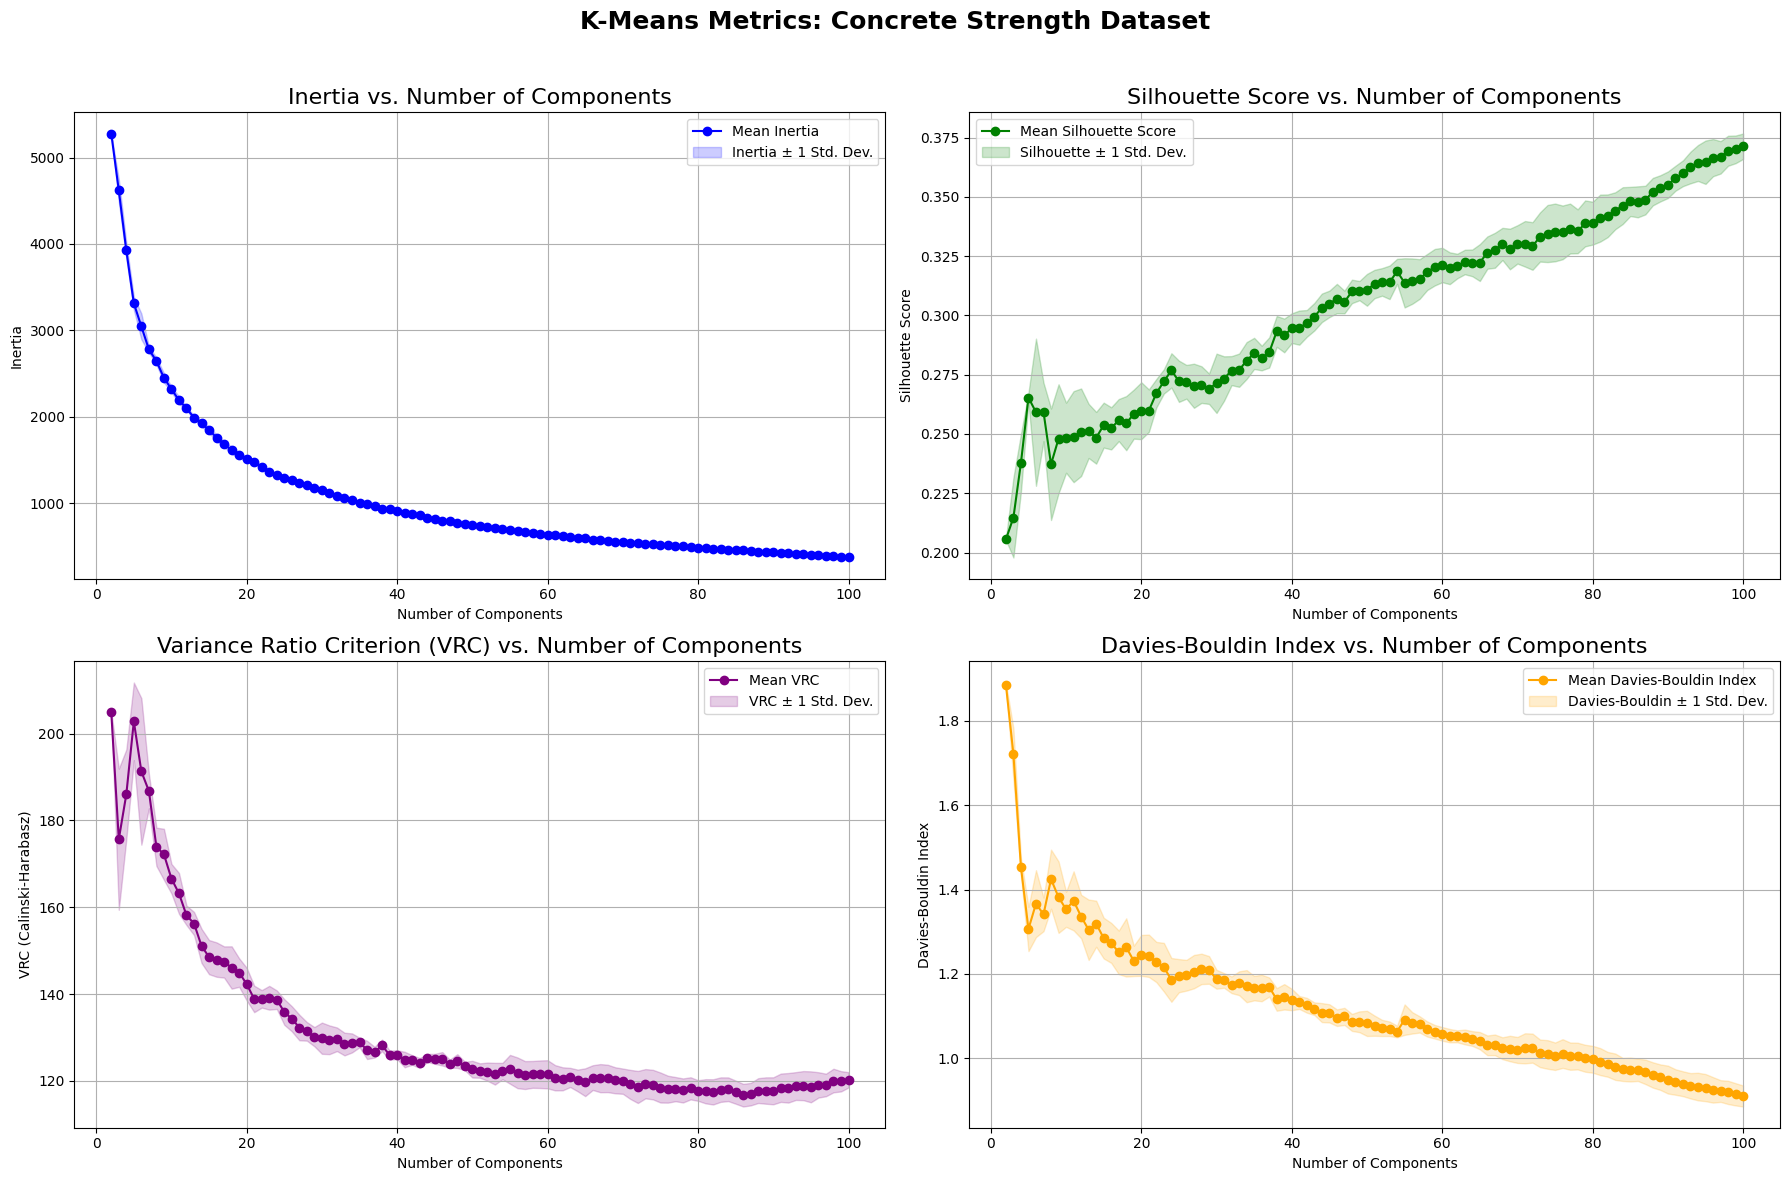

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n_components (clusters) and random states
n_components_range = list(range(2, 101))
random_states = [0, 1, 2, 3, 4]

# Assuming you have the concrete strength dataset loaded into a DataFrame `concrete`
# and split into features and target
X = concrete.features
y = concrete.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler_concrete = StandardScaler()
X_train_scaled = scaler_concrete.fit_transform(X_train)
X_test_scaled = scaler_concrete.transform(X_test)

# Store inertia, silhouette, VRC, and Davies-Bouldin scores for each n_components and random state
inertia_scores = {n: [] for n in n_components_range}
silhouette_scores = {n: [] for n in n_components_range}
vrc_scores = {n: [] for n in n_components_range}
davies_bouldin_scores = {n: [] for n in n_components_range}

# Loop through each random state and calculate metrics
for random_state in random_states:
    print(f"\nRANDOM STATE: {random_state}")
    for n in n_components_range:
        kmeans = KMeans(n_clusters=n, random_state=random_state)
        kmeans.fit(X_train_scaled)

        # Record the inertia
        inertia = kmeans.inertia_
        inertia_scores[n].append(inertia)

        # Calculate clustering metrics only if n_components > 1
        if n > 1:
            y_train_pred = kmeans.predict(X_train_scaled)
            s_score = silhouette_score(X_train_scaled, y_train_pred)
            vrc = calinski_harabasz_score(X_train_scaled, y_train_pred)
            dbi = davies_bouldin_score(X_train_scaled, y_train_pred)

            silhouette_scores[n].append(s_score)
            vrc_scores[n].append(vrc)
            davies_bouldin_scores[n].append(dbi)
        else:
            # Invalid for n=1
            silhouette_scores[n].append(np.nan)
            vrc_scores[n].append(np.nan)
            davies_bouldin_scores[n].append(np.nan)

# Calculate mean and standard deviation for each number of components
inertia_mean = [np.mean(inertia_scores[n]) for n in n_components_range]
inertia_std = [np.std(inertia_scores[n]) for n in n_components_range]
silhouette_mean = [np.nanmean(silhouette_scores[n]) for n in n_components_range]
silhouette_std = [np.nanstd(silhouette_scores[n]) for n in n_components_range]
vrc_mean = [np.nanmean(vrc_scores[n]) for n in n_components_range]
vrc_std = [np.nanstd(vrc_scores[n]) for n in n_components_range]
davies_bouldin_mean = [np.nanmean(davies_bouldin_scores[n]) for n in n_components_range]
davies_bouldin_std = [np.nanstd(davies_bouldin_scores[n]) for n in n_components_range]

# Find the best n_components according to each criterion
best_n_components_inertia = n_components_range[np.argmin(inertia_mean)]
best_n_components_silhouette = n_components_range[np.nanargmax(silhouette_mean)]
best_n_components_vrc = n_components_range[np.nanargmax(vrc_mean)]
best_n_components_davies_bouldin = n_components_range[np.nanargmin(davies_bouldin_mean)]

best_inertia = inertia_mean[np.argmin(inertia_mean)]
best_silhouette = silhouette_mean[np.nanargmax(silhouette_mean)]
best_vrc = vrc_mean[np.nanargmax(vrc_mean)]
best_davies_boulding = davies_bouldin_mean[np.nanargmin(davies_bouldin_mean)]

# Print the best n_components for each criterion
print(f"\nBest n_components according to Inertia: {best_n_components_inertia}  with score: {best_inertia}")
print(f"Best n_components according to Silhouette Score: {best_n_components_silhouette}  with score: {best_silhouette}")
print(f"Best n_components according to VRC (Calinski-Harabasz): {best_n_components_vrc}  with score: {best_vrc}")
print(f"Best n_components according to Davies-Bouldin Index: {best_n_components_davies_bouldin}  with score: {best_davies_boulding}")

# Train the KMeans model with the best number of components based on Silhouette Score
kmeans_model_silhouette = KMeans(n_clusters=best_n_components_silhouette, random_state=4)
kmeans_model_silhouette.fit(X_train_scaled)

# Recompute the mean target value for each predicted cluster after retraining
y_train_pred_silhouette = kmeans_model_silhouette.predict(X_train_scaled)
cluster_mean_target_silhouette = {cluster: y_train[y_train_pred_silhouette == cluster].mean() for cluster in np.unique(y_train_pred_silhouette)}

# Predict the cluster for each sample in the test set
y_test_pred_silhouette = kmeans_model_silhouette.predict(X_test_scaled)

# Map the predicted clusters to their corresponding mean target values for the test set
y_test_pred_mapped_silhouette = np.array([cluster_mean_target_silhouette[cluster] for cluster in y_test_pred_silhouette])

# Evaluate using regression-like metrics
mae_silhouette = mean_absolute_error(y_test, y_test_pred_mapped_silhouette)
mse_silhouette = mean_squared_error(y_test, y_test_pred_mapped_silhouette)
r2_silhouette = r2_score(y_test, y_test_pred_mapped_silhouette)
sil_score_test = silhouette_score(X_test_scaled, y_test_pred_silhouette) if best_n_components_silhouette > 1 else np.nan

# # Output the regression metrics
# print("\nTest set evaluation with regression metrics (Silhouette-based model):")
# print(f"Mean Absolute Error (MAE): {mae_silhouette:.4f}")
# print(f"Mean Squared Error (MSE): {mse_silhouette:.4f}")
# print(f"R² Score: {r2_silhouette:.4f}")
# print(f"Silhouette Score for the Test Data: {sil_score_test:.4f}")

# Plot the Inertia, Silhouette Score, VRC, and Davies-Bouldin Index with variability
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle("K-Means Metrics: Concrete Strength Dataset",fontsize=18,fontweight='bold')

# Plot Inertia on the first subplot
axes[0, 0].plot(n_components_range, inertia_mean, marker='o', linestyle='-', color='b', label="Mean Inertia")
axes[0, 0].fill_between(n_components_range, np.array(inertia_mean) - np.array(inertia_std),
                        np.array(inertia_mean) + np.array(inertia_std), color='b', alpha=0.2, label="Inertia ± 1 Std. Dev.")
axes[0, 0].set_title("Inertia vs. Number of Components",fontsize=16)
axes[0, 0].set_xlabel("Number of Components")
axes[0, 0].set_ylabel("Inertia")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Plot Silhouette Score on the second subplot
axes[0, 1].plot(n_components_range, silhouette_mean, marker='o', linestyle='-', color='g', label="Mean Silhouette Score")
axes[0, 1].fill_between(n_components_range, np.array(silhouette_mean) - np.array(silhouette_std),
                        np.array(silhouette_mean) + np.array(silhouette_std), color='g', alpha=0.2, label="Silhouette ± 1 Std. Dev.")
axes[0, 1].set_title("Silhouette Score vs. Number of Components",fontsize=16)
axes[0, 1].set_xlabel("Number of Components")
axes[0, 1].set_ylabel("Silhouette Score")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Plot VRC on the third subplot
axes[1, 0].plot(n_components_range, vrc_mean, marker='o', linestyle='-', color='purple', label="Mean VRC")
axes[1, 0].fill_between(n_components_range, np.array(vrc_mean) - np.array(vrc_std),
                        np.array(vrc_mean) + np.array(vrc_std), color='purple', alpha=0.2, label="VRC ± 1 Std. Dev.")
axes[1, 0].set_title("Variance Ratio Criterion (VRC) vs. Number of Components",fontsize=16)
axes[1, 0].set_xlabel("Number of Components")
axes[1, 0].set_ylabel("VRC (Calinski-Harabasz)")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Plot Davies-Bouldin Index on the fourth subplot
axes[1, 1].plot(n_components_range, davies_bouldin_mean, marker='o', linestyle='-', color='orange', label="Mean Davies-Bouldin Index")
axes[1, 1].fill_between(n_components_range, np.array(davies_bouldin_mean) - np.array(davies_bouldin_std),
                        np.array(davies_bouldin_mean) + np.array(davies_bouldin_std), color='orange', alpha=0.2, label="Davies-Bouldin ± 1 Std. Dev.")
axes[1, 1].set_title("Davies-Bouldin Index vs. Number of Components",fontsize=16)
axes[1, 1].set_xlabel("Number of Components")
axes[1, 1].set_ylabel("Davies-Bouldin Index")
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Combined Plots Execution Time

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# from sklearn.mixture import GaussianMixture
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # Define datasets (assuming diabetes and concrete are your dataset variables with .features attributes)
# datasets = {
#     'Diabetes': diabetes.features,
#     'Concrete': concrete.features
# }

# # Define number of components to test
# components_range = range(1, 101)

# # Define seeds
# seeds = [4, 42, 123, 256, 512]

# # Initialize dictionaries to store times for each dataset, clustering method, and seed
# times = {
#     'Diabetes': {'EM': [], 'KMeans': []},
#     'Concrete': {'EM': [], 'KMeans': []}
# }

# # Loop over each dataset
# for dataset_name, features in datasets.items():
#     # Initialize arrays to store times for each number of components across seeds
#     em_times = np.zeros((len(seeds), len(components_range)))
#     kmeans_times = np.zeros((len(seeds), len(components_range)))

#     # Loop over seeds
#     for seed_idx, seed in enumerate(seeds):
#         # Split dataset into training (80%) and testing (20%) sets
#         X_train, X_test = train_test_split(features, test_size=0.2, random_state=seed, shuffle=True)

#         # Scale training features only
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)

#         # Loop over each number of components
#         for i, n_components in enumerate(components_range):
#             # EM timing
#             start_time = time.time()
#             gmm = GaussianMixture(n_components=n_components, random_state=seed)
#             gmm.fit(X_train_scaled)
#             em_times[seed_idx, i] = time.time() - start_time

#             # KMeans timing
#             start_time = time.time()
#             kmeans = KMeans(n_clusters=n_components, random_state=seed)
#             kmeans.fit(X_train_scaled)
#             kmeans_times[seed_idx, i] = time.time() - start_time

#     # Calculate mean and standard deviation for each method
#     times[dataset_name]['EM_mean'] = np.mean(em_times, axis=0)
#     times[dataset_name]['EM_std'] = np.std(em_times, axis=0)
#     times[dataset_name]['KMeans_mean'] = np.mean(kmeans_times, axis=0)
#     times[dataset_name]['KMeans_std'] = np.std(kmeans_times, axis=0)

# # Plotting
# fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# # Plot for Diabetes dataset
# axes[0].plot(components_range, times['Diabetes']['EM_mean'], label='EM', color='blue')
# axes[0].fill_between(components_range,
#                      times['Diabetes']['EM_mean'] - times['Diabetes']['EM_std'],
#                      times['Diabetes']['EM_mean'] + times['Diabetes']['EM_std'],
#                      color='blue', alpha=0.2)
# axes[0].plot(components_range, times['Diabetes']['KMeans_mean'], label='K-Means', color='orange')
# axes[0].fill_between(components_range,
#                      times['Diabetes']['KMeans_mean'] - times['Diabetes']['KMeans_std'],
#                      times['Diabetes']['KMeans_mean'] + times['Diabetes']['KMeans_std'],
#                      color='orange', alpha=0.2)
# axes[0].set_title('Diabetes Dataset', fontsize=16)
# axes[0].set_xlabel('Number of Components', fontsize=14)
# axes[0].set_ylabel('Time (seconds)', fontsize=14)
# axes[0].grid(True)
# axes[0].legend(loc="best")

# # Plot for Concrete dataset
# axes[1].plot(components_range, times['Concrete']['EM_mean'], label='EM', color='blue')
# axes[1].fill_between(components_range,
#                      times['Concrete']['EM_mean'] - times['Concrete']['EM_std'],
#                      times['Concrete']['EM_mean'] + times['Concrete']['EM_std'],
#                      color='blue', alpha=0.2)
# axes[1].plot(components_range, times['Concrete']['KMeans_mean'], label='K-Means', color='orange')
# axes[1].fill_between(components_range,
#                      times['Concrete']['KMeans_mean'] - times['Concrete']['KMeans_std'],
#                      times['Concrete']['KMeans_mean'] + times['Concrete']['KMeans_std'],
#                      color='orange', alpha=0.2)
# axes[1].set_title('Concrete Dataset', fontsize=16)
# axes[1].set_xlabel('Number of Components', fontsize=14)
# axes[1].set_ylabel('Time (seconds)', fontsize=14)
# axes[1].grid(True)
# axes[1].legend(loc="best")

# # Global title
# plt.suptitle('Runtime of EM and K-Means Clustering Across Number of Components (Mean ± 1 Std)',fontsize=16,fontweight='bold')
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import time
# from sklearn.mixture import GaussianMixture
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # Define datasets (assuming diabetes and concrete are your dataset variables with .features attributes)
# datasets = {
#     'Diabetes': diabetes.features,
#     'Concrete': concrete.features
# }

# # Define number of components to test
# components_range = range(1, 11)

# # Define seeds
# seeds = [4, 42, 123, 256, 512]

# # Initialize dictionaries to store times for each dataset, clustering method, and seed
# times = {
#     'Diabetes': {'EM': [], 'KMeans': []},
#     'Concrete': {'EM': [], 'KMeans': []}
# }

# # Loop over each dataset
# for dataset_name, features in datasets.items():
#     # Initialize arrays to store times for each number of components across seeds
#     em_times = np.zeros((len(seeds), len(components_range)))
#     kmeans_times = np.zeros((len(seeds), len(components_range)))

#     # Loop over seeds
#     for seed_idx, seed in enumerate(seeds):
#         # Split dataset into training (80%) and testing (20%) sets
#         X_train, X_test = train_test_split(features, test_size=0.2, random_state=seed, shuffle=True)

#         # Scale training features only
#         scaler = StandardScaler()
#         X_train_scaled = scaler.fit_transform(X_train)

#         # Loop over each number of components
#         for i, n_components in enumerate(components_range):
#             # EM timing
#             start_time = time.time()
#             gmm = GaussianMixture(n_components=n_components, random_state=seed)
#             gmm.fit(X_train_scaled)
#             em_times[seed_idx, i] = time.time() - start_time

#             # KMeans timing
#             start_time = time.time()
#             kmeans = KMeans(n_clusters=n_components, random_state=seed)
#             kmeans.fit(X_train_scaled)
#             kmeans_times[seed_idx, i] = time.time() - start_time

#     # Calculate mean and standard deviation for each method
#     times[dataset_name]['EM_mean'] = np.mean(em_times, axis=0)
#     times[dataset_name]['EM_std'] = np.std(em_times, axis=0)
#     times[dataset_name]['KMeans_mean'] = np.mean(kmeans_times, axis=0)
#     times[dataset_name]['KMeans_std'] = np.std(kmeans_times, axis=0)

# # Plotting
# fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# # Plot for Diabetes dataset
# axes[0].plot(components_range, times['Diabetes']['EM_mean'], label='EM', color='blue')
# axes[0].fill_between(components_range,
#                      times['Diabetes']['EM_mean'] - times['Diabetes']['EM_std'],
#                      times['Diabetes']['EM_mean'] + times['Diabetes']['EM_std'],
#                      color='blue', alpha=0.2)
# axes[0].plot(components_range, times['Diabetes']['KMeans_mean'], label='K-Means', color='orange')
# axes[0].fill_between(components_range,
#                      times['Diabetes']['KMeans_mean'] - times['Diabetes']['KMeans_std'],
#                      times['Diabetes']['KMeans_mean'] + times['Diabetes']['KMeans_std'],
#                      color='orange', alpha=0.2)
# axes[0].set_title('Diabetes Dataset', fontsize=16)
# axes[0].set_xlabel('Number of Components', fontsize=14)
# axes[0].set_ylabel('Time (seconds)', fontsize=14)
# axes[0].grid(True)
# axes[0].legend(loc="best")

# # Plot for Concrete dataset
# axes[1].plot(components_range, times['Concrete']['EM_mean'], label='EM', color='blue')
# axes[1].fill_between(components_range,
#                      times['Concrete']['EM_mean'] - times['Concrete']['EM_std'],
#                      times['Concrete']['EM_mean'] + times['Concrete']['EM_std'],
#                      color='blue', alpha=0.2)
# axes[1].plot(components_range, times['Concrete']['KMeans_mean'], label='K-Means', color='orange')
# axes[1].fill_between(components_range,
#                      times['Concrete']['KMeans_mean'] - times['Concrete']['KMeans_std'],
#                      times['Concrete']['KMeans_mean'] + times['Concrete']['KMeans_std'],
#                      color='orange', alpha=0.2)
# axes[1].set_title('Concrete Dataset', fontsize=16)
# axes[1].set_xlabel('Number of Components', fontsize=14)
# axes[1].grid(True)
# axes[1].legend(loc="best")

# # Global title
# plt.suptitle('Runtime of EM and K-Means Clustering Across Number of Components (Mean ± 1 Std)', fontweight='bold')
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


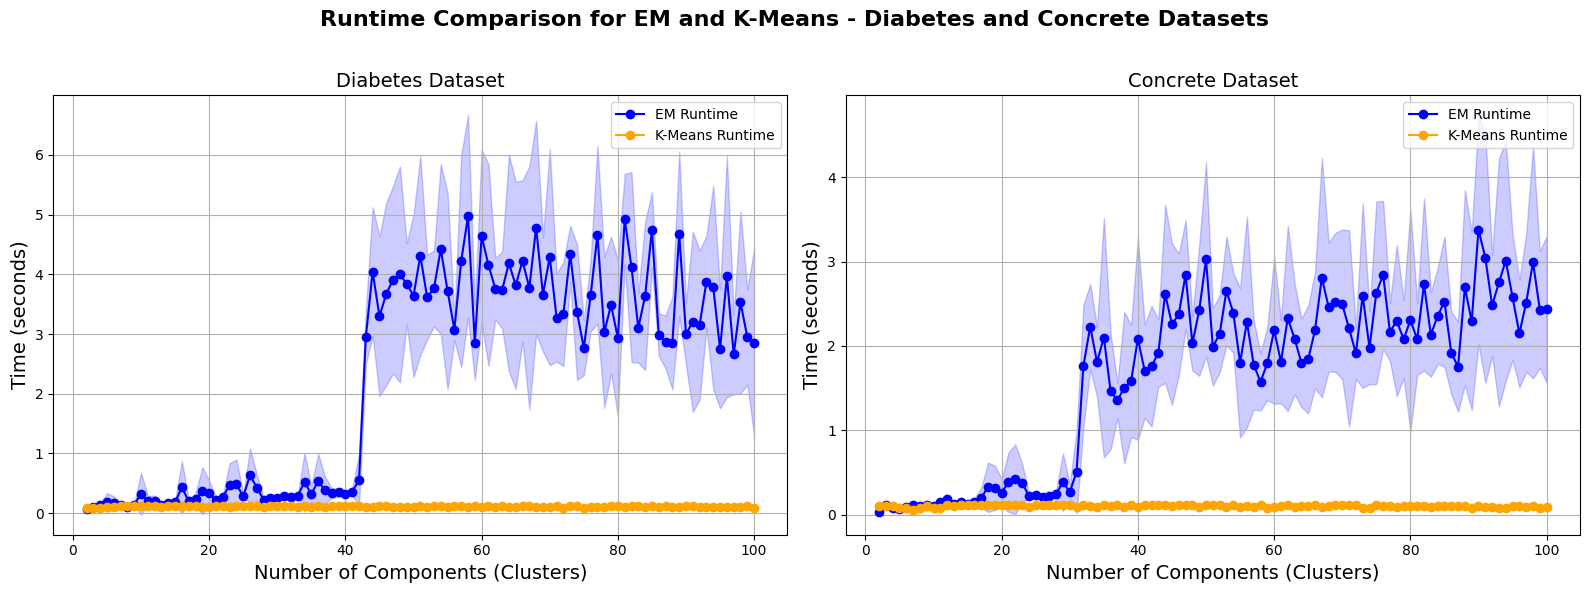

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define datasets and labels for convenience
datasets = {
    'Diabetes': diabetes.features,
    'Concrete': concrete.features
}

# Define the range of components (clusters) to test and seeds
components_range = list(range(2, 101))
seeds = [4, 42, 123, 256, 512]

# Function to calculate runtime for EM and K-Means across multiple seeds
def calculate_cluster_runtimes(X, dataset_name):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize arrays to store runtimes for each seed
    em_times = np.zeros((len(seeds), len(components_range)))
    kmeans_times = np.zeros((len(seeds), len(components_range)))

    # Loop over seeds
    for seed_idx, seed in enumerate(seeds):
        # Loop over each component count
        for i, n_components in enumerate(components_range):
            # EM Runtime
            start_time = time.time()
            gmm = GaussianMixture(n_components=n_components, random_state=seed)
            gmm.fit(X_scaled)
            em_times[seed_idx, i] = time.time() - start_time

            # K-Means Runtime
            start_time = time.time()
            kmeans = KMeans(n_clusters=n_components, random_state=seed)
            kmeans.fit(X_scaled)
            kmeans_times[seed_idx, i] = time.time() - start_time

    # Calculate mean and standard deviation across seeds
    em_mean, em_std = np.mean(em_times, axis=0), np.std(em_times, axis=0)
    kmeans_mean, kmeans_std = np.mean(kmeans_times, axis=0), np.std(kmeans_times, axis=0)

    return em_mean, em_std, kmeans_mean, kmeans_std

# Calculate runtimes for both datasets
diabetes_em_mean, diabetes_em_std, diabetes_kmeans_mean, diabetes_kmeans_std = calculate_cluster_runtimes(datasets['Diabetes'], "Diabetes")
concrete_em_mean, concrete_em_std, concrete_kmeans_mean, concrete_kmeans_std = calculate_cluster_runtimes(datasets['Concrete'], "Concrete")

# Plotting the combined runtime results with variability for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Runtime Comparison for EM and K-Means - Diabetes and Concrete Datasets", fontsize=16, fontweight='bold')

# Plot runtime for Diabetes dataset with ±1 std shading
axes[0].plot(components_range, diabetes_em_mean, marker='o', linestyle='-', color='blue', label="EM Runtime")
axes[0].fill_between(components_range, diabetes_em_mean - diabetes_em_std, diabetes_em_mean + diabetes_em_std, color='blue', alpha=0.2)

axes[0].plot(components_range, diabetes_kmeans_mean, marker='o', linestyle='-', color='orange', label="K-Means Runtime")
axes[0].fill_between(components_range, diabetes_kmeans_mean - diabetes_kmeans_std, diabetes_kmeans_mean + diabetes_kmeans_std, color='orange', alpha=0.2)

axes[0].set_xlabel("Number of Components (Clusters)", fontsize=14)
axes[0].set_ylabel("Time (seconds)", fontsize=14)
axes[0].set_title("Diabetes Dataset", fontsize=14)
axes[0].grid(True)
axes[0].legend()

# Plot runtime for Concrete dataset with ±1 std shading
axes[1].plot(components_range, concrete_em_mean, marker='o', linestyle='-', color='blue', label="EM Runtime")
axes[1].fill_between(components_range, concrete_em_mean - concrete_em_std, concrete_em_mean + concrete_em_std, color='blue', alpha=0.2)

axes[1].plot(components_range, concrete_kmeans_mean, marker='o', linestyle='-', color='orange', label="K-Means Runtime")
axes[1].fill_between(components_range, concrete_kmeans_mean - concrete_kmeans_std, concrete_kmeans_mean + concrete_kmeans_std, color='orange', alpha=0.2)

axes[1].set_xlabel("Number of Components (Clusters)", fontsize=14)
axes[1].set_ylabel("Time (seconds)", fontsize=14)
axes[1].set_title("Concrete Dataset", fontsize=14)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **2. Apply Dimensionality Reduction Algorithms**

#### Randomized Projections (RP)

##### **RP: Diabetes Dataset**

RP Components: 2, Reconstruction Error: 1.1364
RP Components: 3, Reconstruction Error: 0.9737
RP Components: 4, Reconstruction Error: 1.7323
RP Components: 5, Reconstruction Error: 1.7522

Best RP component count: 3 with Reconstruction Error: 0.9737


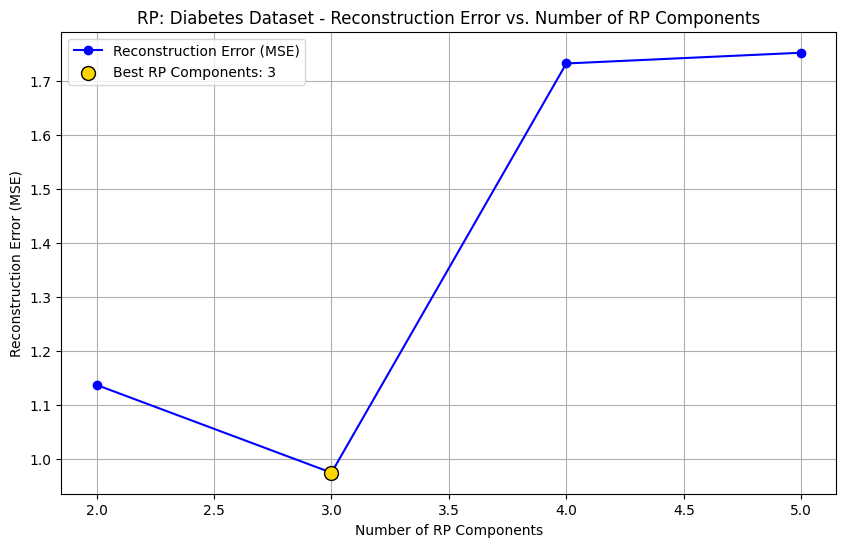

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming `X` is the feature matrix of your dataset (e.g., diabetes or concrete strength data)
X = diabetes.features  # Replace with concrete.features if using the concrete dataset

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of RP components
rp_components_range = list(range(2, 6))

# To store reconstruction errors
reconstruction_errors = []

# Loop over each component count
for n_components in rp_components_range:
    # Apply RP transformation
    rp = GaussianRandomProjection(n_components=n_components, random_state=4)
    X_transformed = rp.fit_transform(X_scaled)

    # Approximate inverse transformation
    X_reconstructed = np.dot(X_transformed, rp.components_)

    # Calculate reconstruction error using mean squared error
    reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)
    print(f"RP Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}")

# Identify the best number of components with the lowest reconstruction error
best_n_components = rp_components_range[np.argmin(reconstruction_errors)]
best_reconstruction_error = min(reconstruction_errors)

print(f"\nBest RP component count: {best_n_components} with Reconstruction Error: {best_reconstruction_error:.4f}")

# Plot number of components vs. reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(rp_components_range, reconstruction_errors, marker='o', linestyle='-', color='b', label="Reconstruction Error (MSE)")

# Highlight the best point in gold
plt.scatter(best_n_components, best_reconstruction_error, color='gold', edgecolor='black', s=100, zorder=5,
            label=f"Best RP Components: {best_n_components}")

plt.xlabel("Number of RP Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("RP: Diabetes Dataset - Reconstruction Error vs. Number of RP Components")
plt.grid(True)
plt.legend()
plt.show()


Time taken for RP with 2 components: 0.0077 seconds
Time taken for RP with 3 components: 0.0022 seconds


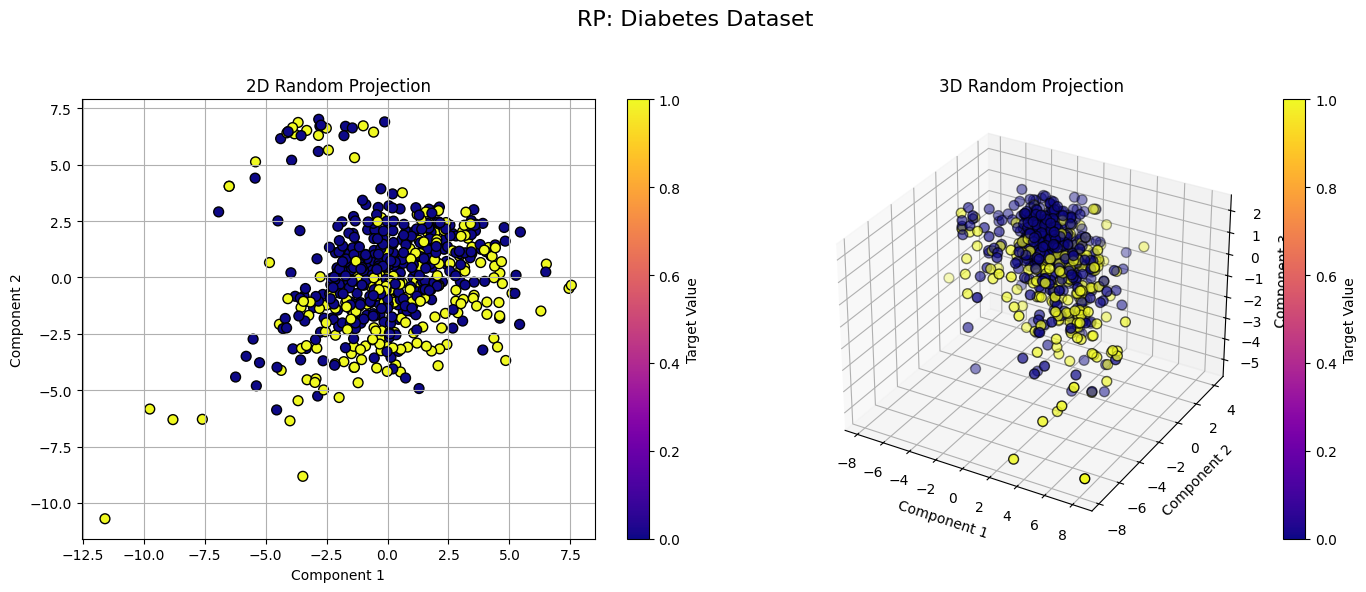

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.random_projection import SparseRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Randomized Projection with 2 components
start_time_2d = time.time()
rp_2d = SparseRandomProjection(n_components=2, random_state=4)
X_rp_2d = rp_2d.fit_transform(X_train_scaled)
end_time_2d = time.time()
time_taken_2d = end_time_2d - start_time_2d
print(f"Time taken for RP with 2 components: {time_taken_2d:.4f} seconds")

# Apply Randomized Projection with 3 components
start_time_3d = time.time()
rp_3d = SparseRandomProjection(n_components=3, random_state=4)
X_rp_3d = rp_3d.fit_transform(X_train_scaled)
end_time_3d = time.time()
time_taken_3d = end_time_3d - start_time_3d
print(f"Time taken for RP with 3 components: {time_taken_3d:.4f} seconds")

# Plotting the 2D and 3D Random Projection with a main title
plt.figure(figsize=(14, 6))
plt.suptitle("RP: Diabetes Dataset", fontsize=16)  # Figure title

# 2D Plot
plt.subplot(1, 2, 1)
plt.scatter(X_rp_2d[:, 0], X_rp_2d[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=50)
plt.title("2D Random Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target Value")
plt.grid(True)

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
sc = ax.scatter(X_rp_3d[:, 0], X_rp_3d[:, 1], X_rp_3d[:, 2], c=y_train, cmap='plasma', edgecolor='k', s=50)
ax.set_title("3D Random Projection")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.colorbar(sc, label="Target Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


##### **RP: Concrete Strength Dataset**

RP Components: 2, Reconstruction Error: 1.3789
RP Components: 3, Reconstruction Error: 0.9953
RP Components: 4, Reconstruction Error: 1.8392
RP Components: 5, Reconstruction Error: 1.8736

Best RP component count: 3 with Reconstruction Error: 0.9953


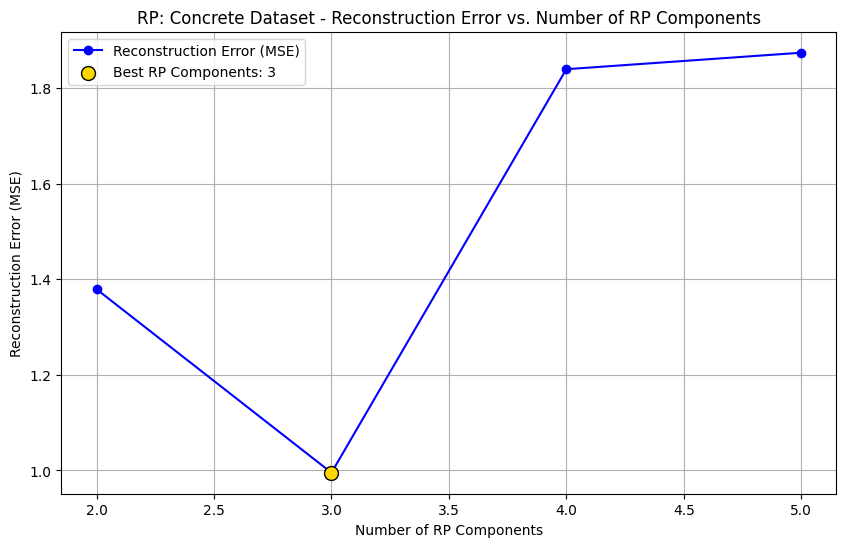

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the concrete dataset features
X = concrete.features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of RP components
rp_components_range = list(range(2, 6))

# To store reconstruction errors
reconstruction_errors = []

# Loop over each component count
for n_components in rp_components_range:
    # Apply RP transformation
    rp = GaussianRandomProjection(n_components=n_components, random_state=4)
    X_transformed = rp.fit_transform(X_scaled)

    # Approximate inverse transformation
    X_reconstructed = np.dot(X_transformed, rp.components_)

    # Calculate reconstruction error using mean squared error
    reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)
    print(f"RP Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}")

# Identify the best number of components with the lowest reconstruction error
best_n_components = rp_components_range[np.argmin(reconstruction_errors)]
best_reconstruction_error = min(reconstruction_errors)

print(f"\nBest RP component count: {best_n_components} with Reconstruction Error: {best_reconstruction_error:.4f}")

# Plot number of components vs. reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(rp_components_range, reconstruction_errors, marker='o', linestyle='-', color='b', label="Reconstruction Error (MSE)")

# Highlight the best point in gold
plt.scatter(best_n_components, best_reconstruction_error, color='gold', edgecolor='black', s=100, zorder=5,
            label=f"Best RP Components: {best_n_components}")

plt.xlabel("Number of RP Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("RP: Concrete Dataset - Reconstruction Error vs. Number of RP Components")
plt.grid(True)
plt.legend()
plt.show()


Time taken for RP with 2 components: 0.0016 seconds
Time taken for RP with 3 components: 0.0028 seconds


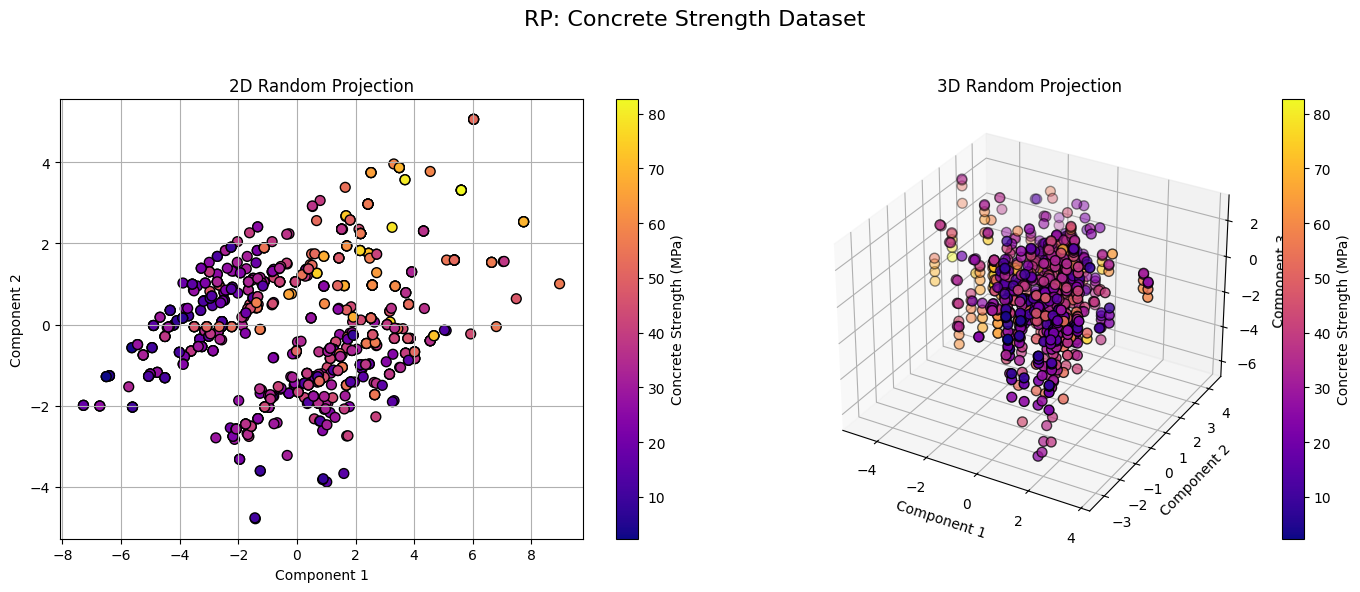

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.random_projection import SparseRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load and split the concrete strength dataset
X = concrete.features  # Features from the concrete strength dataset
y = concrete.target  # Target values (strength)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Randomized Projection with 2 components
start_time_2d = time.time()
rp_2d = SparseRandomProjection(n_components=2, random_state=4)
X_rp_2d = rp_2d.fit_transform(X_train_scaled)
end_time_2d = time.time()
time_taken_2d = end_time_2d - start_time_2d
print(f"Time taken for RP with 2 components: {time_taken_2d:.4f} seconds")

# Apply Randomized Projection with 3 components
start_time_3d = time.time()
rp_3d = SparseRandomProjection(n_components=3, random_state=4)
X_rp_3d = rp_3d.fit_transform(X_train_scaled)
end_time_3d = time.time()
time_taken_3d = end_time_3d - start_time_3d
print(f"Time taken for RP with 3 components: {time_taken_3d:.4f} seconds")

# Plotting the 2D and 3D Random Projection with a main title
plt.figure(figsize=(14, 6))
plt.suptitle("RP: Concrete Strength Dataset", fontsize=16)  # Figure title

# 2D Plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_rp_2d[:, 0], X_rp_2d[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=50)
plt.title("2D Random Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, label="Concrete Strength (MPa)")
plt.grid(True)

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
sc = ax.scatter(X_rp_3d[:, 0], X_rp_3d[:, 1], X_rp_3d[:, 2], c=y_train, cmap='plasma', edgecolor='k', s=50)
ax.set_title("3D Random Projection")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.colorbar(sc, label="Concrete Strength (MPa)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


#### Principal Component Analysis (PCA)

##### **PCA: Diabetes Dataset**

PCA Components: 2, Reconstruction Error: 0.5218, Explained Variance Ratio: 0.4782
PCA Components: 3, Reconstruction Error: 0.3931, Explained Variance Ratio: 0.6069
PCA Components: 4, Reconstruction Error: 0.2837, Explained Variance Ratio: 0.7163
PCA Components: 5, Reconstruction Error: 0.1884, Explained Variance Ratio: 0.8116

Best PCA component count (Reconstruction Error): 5 with Error: 0.1884
Best PCA component count (Explained Variance Ratio): 5 with Variance Ratio: 0.8116


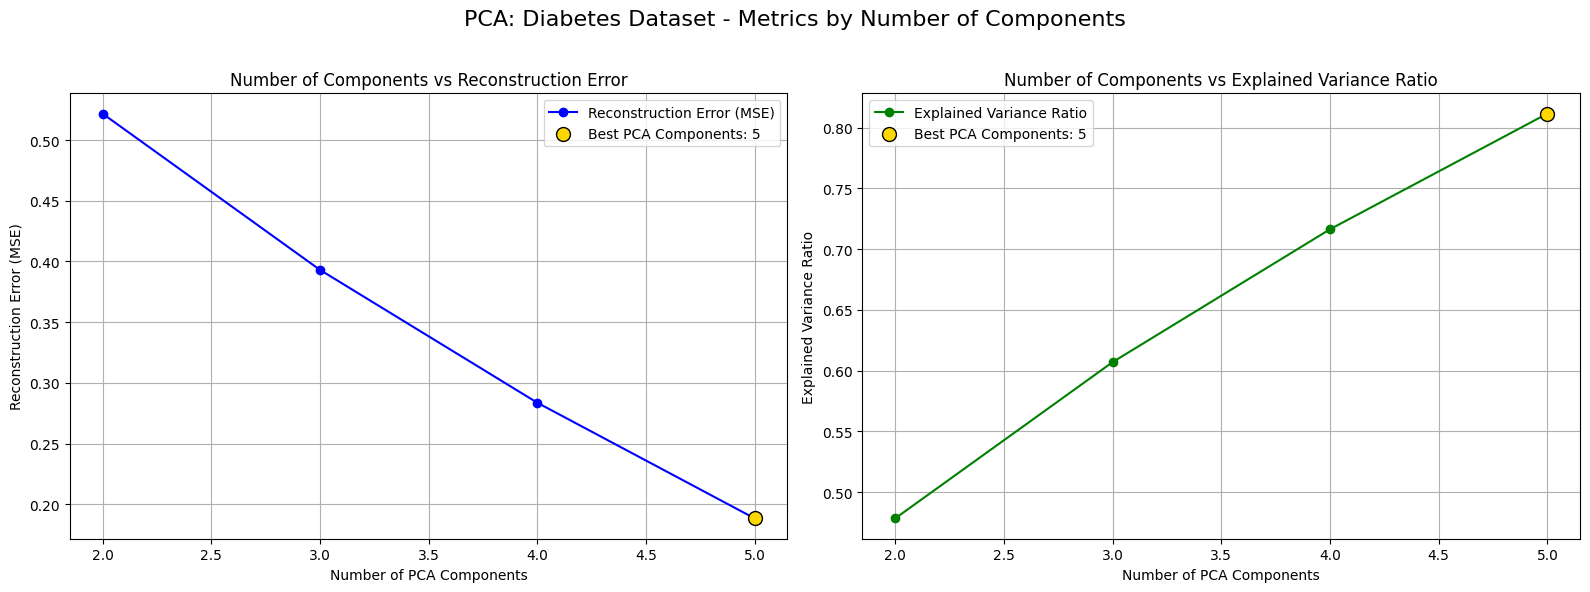

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset features
X = diabetes.features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of PCA components
pca_components_range = list(range(2, 6))

# To store reconstruction errors and explained variance ratios
reconstruction_errors = []
explained_variance_ratios = []

# Loop over each component count
for n_components in pca_components_range:
    # Apply PCA transformation
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_transformed)

    # Calculate reconstruction error using mean squared error
    reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

    # Store the cumulative explained variance ratio
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

    print(f"PCA Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}, Explained Variance Ratio: {explained_variance_ratios[-1]:.4f}")

# Identify the best number of components
best_n_components_reconstruction = pca_components_range[np.argmin(reconstruction_errors)]
best_reconstruction_error = min(reconstruction_errors)
best_n_components_variance = pca_components_range[np.argmax(explained_variance_ratios)]
best_explained_variance_ratio = max(explained_variance_ratios)

print(f"\nBest PCA component count (Reconstruction Error): {best_n_components_reconstruction} with Error: {best_reconstruction_error:.4f}")
print(f"Best PCA component count (Explained Variance Ratio): {best_n_components_variance} with Variance Ratio: {best_explained_variance_ratio:.4f}")

# Plot the metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("PCA: Diabetes Dataset - Metrics by Number of Components", fontsize=16)

# Plot Reconstruction Error
axes[0].plot(pca_components_range, reconstruction_errors, marker='o', linestyle='-', color='b', label="Reconstruction Error (MSE)")
axes[0].scatter(best_n_components_reconstruction, best_reconstruction_error, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best PCA Components: {best_n_components_reconstruction}")
axes[0].set_xlabel("Number of PCA Components")
axes[0].set_ylabel("Reconstruction Error (MSE)")
axes[0].set_title("Number of Components vs Reconstruction Error")
axes[0].grid(True)
axes[0].legend()

# Plot Explained Variance Ratio
axes[1].plot(pca_components_range, explained_variance_ratios, marker='o', linestyle='-', color='g', label="Explained Variance Ratio")
axes[1].scatter(best_n_components_variance, best_explained_variance_ratio, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best PCA Components: {best_n_components_variance}")
axes[1].set_xlabel("Number of PCA Components")
axes[1].set_ylabel("Explained Variance Ratio")
axes[1].set_title("Number of Components vs Explained Variance Ratio")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Time taken for PCA with 2 components: 0.0012 seconds
Time taken for PCA with 3 components: 0.0019 seconds


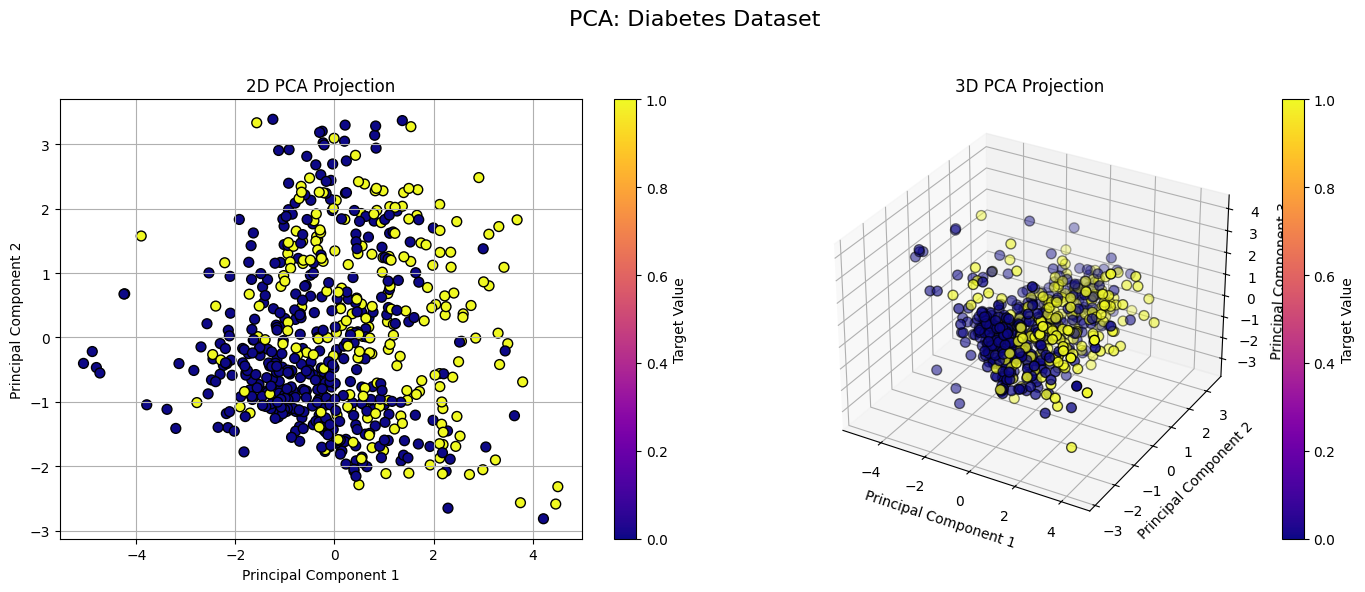

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 2 components
start_time_2d = time.time()
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)
end_time_2d = time.time()
time_taken_2d = end_time_2d - start_time_2d
print(f"Time taken for PCA with 2 components: {time_taken_2d:.4f} seconds")

# Apply PCA with 3 components
start_time_3d = time.time()
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_scaled)
end_time_3d = time.time()
time_taken_3d = end_time_3d - start_time_3d
print(f"Time taken for PCA with 3 components: {time_taken_3d:.4f} seconds")

# Plotting the 2D and 3D PCA projections with a main title
plt.figure(figsize=(14, 6))
plt.suptitle("PCA: Diabetes Dataset", fontsize=16)  # Figure title

# 2D Plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=50)
plt.title("2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Target Value")
plt.grid(True)

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_train, cmap='plasma', edgecolor='k', s=50)
ax.set_title("3D PCA Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(sc, label="Target Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


##### **PCA: Concrete Strength Dataset**

PCA Components: 2, Reconstruction Error: 0.5380, Explained Variance Ratio: 0.4620
PCA Components: 3, Reconstruction Error: 0.3705, Explained Variance Ratio: 0.6295
PCA Components: 4, Reconstruction Error: 0.2437, Explained Variance Ratio: 0.7563
PCA Components: 5, Reconstruction Error: 0.1247, Explained Variance Ratio: 0.8753

Best PCA component count (Reconstruction Error): 5 with Error: 0.1247
Best PCA component count (Explained Variance Ratio): 5 with Variance Ratio: 0.8753


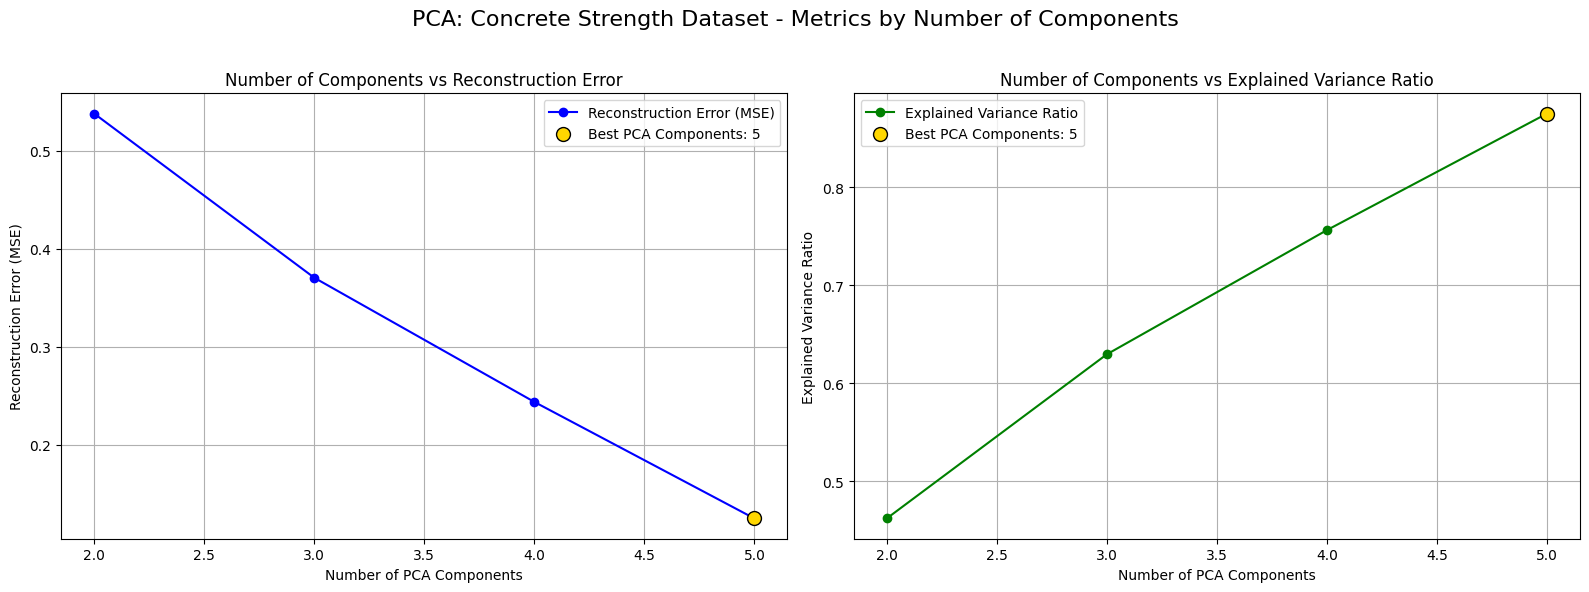

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the concrete strength dataset features
X = concrete.features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of PCA components
pca_components_range = list(range(2, 6))

# To store reconstruction errors and explained variance ratios
reconstruction_errors = []
explained_variance_ratios = []

# Loop over each component count
for n_components in pca_components_range:
    # Apply PCA transformation
    pca = PCA(n_components=n_components)
    X_transformed = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_transformed)

    # Calculate reconstruction error using mean squared error
    reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

    # Store the cumulative explained variance ratio
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

    print(f"PCA Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}, Explained Variance Ratio: {explained_variance_ratios[-1]:.4f}")

# Identify the best number of components
best_n_components_reconstruction = pca_components_range[np.argmin(reconstruction_errors)]
best_reconstruction_error = min(reconstruction_errors)
best_n_components_variance = pca_components_range[np.argmax(explained_variance_ratios)]
best_explained_variance_ratio = max(explained_variance_ratios)

print(f"\nBest PCA component count (Reconstruction Error): {best_n_components_reconstruction} with Error: {best_reconstruction_error:.4f}")
print(f"Best PCA component count (Explained Variance Ratio): {best_n_components_variance} with Variance Ratio: {best_explained_variance_ratio:.4f}")

# Plot the metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("PCA: Concrete Strength Dataset - Metrics by Number of Components", fontsize=16)

# Plot Reconstruction Error
axes[0].plot(pca_components_range, reconstruction_errors, marker='o', linestyle='-', color='b', label="Reconstruction Error (MSE)")
axes[0].scatter(best_n_components_reconstruction, best_reconstruction_error, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best PCA Components: {best_n_components_reconstruction}")
axes[0].set_xlabel("Number of PCA Components")
axes[0].set_ylabel("Reconstruction Error (MSE)")
axes[0].set_title("Number of Components vs Reconstruction Error")
axes[0].grid(True)
axes[0].legend()

# Plot Explained Variance Ratio
axes[1].plot(pca_components_range, explained_variance_ratios, marker='o', linestyle='-', color='g', label="Explained Variance Ratio")
axes[1].scatter(best_n_components_variance, best_explained_variance_ratio, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best PCA Components: {best_n_components_variance}")
axes[1].set_xlabel("Number of PCA Components")
axes[1].set_ylabel("Explained Variance Ratio")
axes[1].set_title("Number of Components vs Explained Variance Ratio")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Time taken for PCA with 2 components: 0.0011 seconds
Time taken for PCA with 3 components: 0.0016 seconds


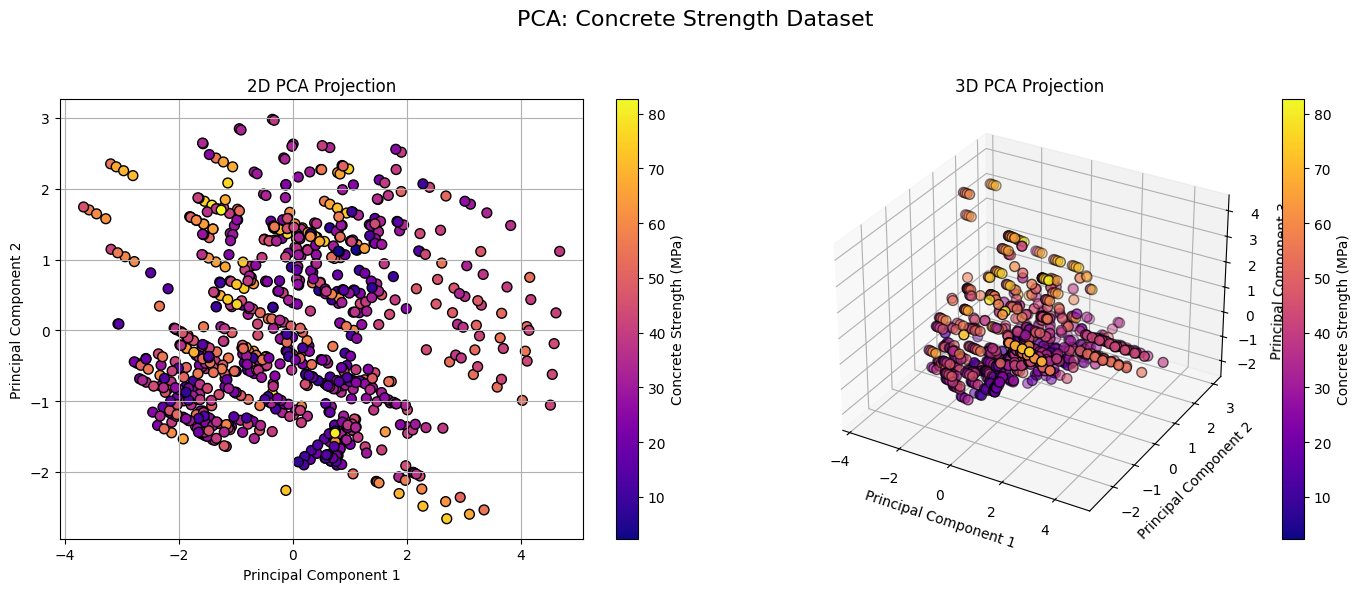

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and split the concrete strength dataset
X = concrete.features  # Features from the concrete strength dataset
y = concrete.target  # Target values (strength)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 2 components
start_time_2d = time.time()
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)
end_time_2d = time.time()
time_taken_2d = end_time_2d - start_time_2d
print(f"Time taken for PCA with 2 components: {time_taken_2d:.4f} seconds")

# Apply PCA with 3 components
start_time_3d = time.time()
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train_scaled)
end_time_3d = time.time()
time_taken_3d = end_time_3d - start_time_3d
print(f"Time taken for PCA with 3 components: {time_taken_3d:.4f} seconds")


# Plotting the 2D and 3D PCA projections with a main title
plt.figure(figsize=(14, 6))
plt.suptitle("PCA: Concrete Strength Dataset", fontsize=16)  # Figure title

# 2D Plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=50)
plt.title("2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Concrete Strength (MPa)")
plt.grid(True)

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_train, cmap='plasma', edgecolor='k', s=50)
ax.set_title("3D PCA Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(sc, label="Concrete Strength (MPa)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


#### Independent Component Analysis (ICA)

##### **ICA: Diabetes Dataset**

ICA Components: 2, Reconstruction Error: 0.5218, Kurtosis: 3.1982
ICA Components: 3, Reconstruction Error: 0.3931, Kurtosis: 4.8001
ICA Components: 4, Reconstruction Error: 0.2837, Kurtosis: 5.5317
ICA Components: 5, Reconstruction Error: 0.1884, Kurtosis: 5.5053

Best ICA component count (Reconstruction Error): 5 with Error: 0.1884
Best ICA component count (Kurtosis): 4 with Kurtosis: 5.5317


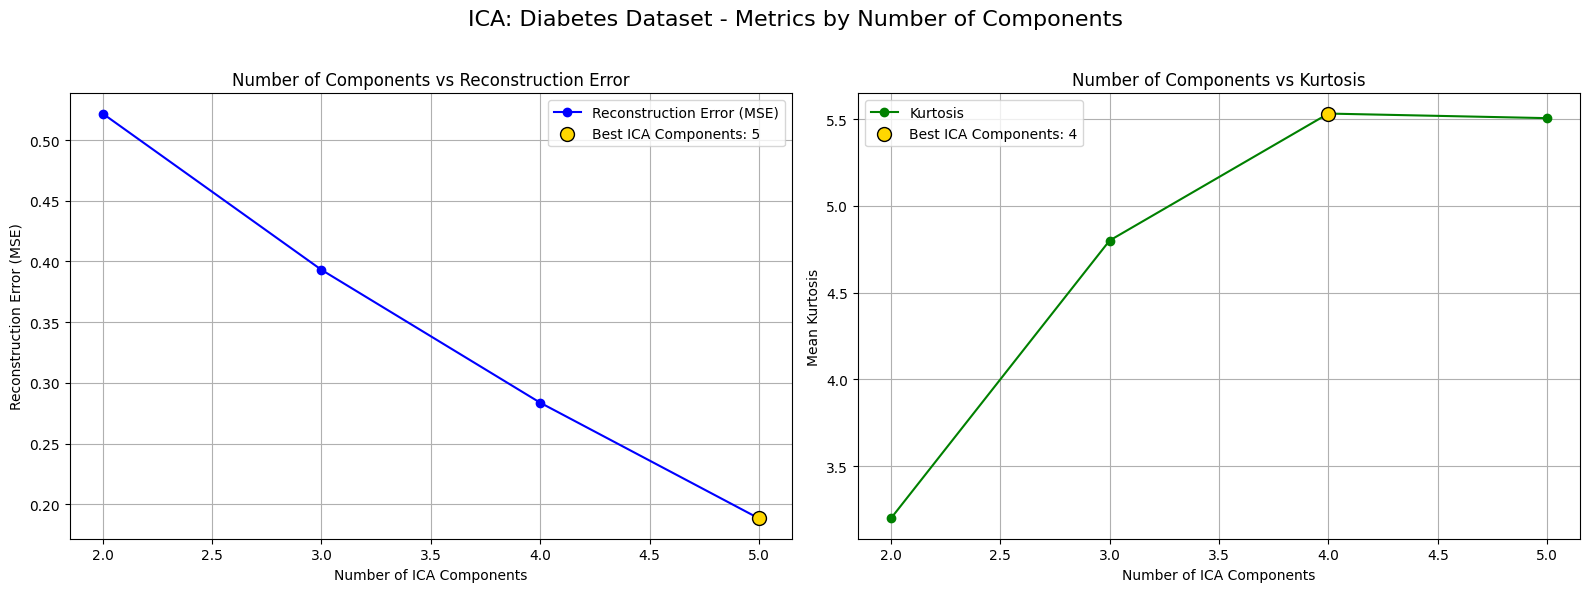

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset features
X = diabetes.features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of ICA components
ica_components_range = list(range(2, 6))

# To store reconstruction errors and kurtosis values
reconstruction_errors = []
kurtosis_values = []

# Loop over each component count
for n_components in ica_components_range:
    # Apply ICA transformation
    ica = FastICA(n_components=n_components, random_state=4)
    X_transformed = ica.fit_transform(X_scaled)
    X_reconstructed = ica.inverse_transform(X_transformed)

    # Calculate reconstruction error using mean squared error
    reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

    # Calculate kurtosis for the independent components
    component_kurtosis = np.mean(kurtosis(X_transformed, axis=0, fisher=False))
    kurtosis_values.append(component_kurtosis)

    print(f"ICA Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}, Kurtosis: {component_kurtosis:.4f}")

# Identify the best number of components
best_n_components_reconstruction = ica_components_range[np.argmin(reconstruction_errors)]
best_reconstruction_error = min(reconstruction_errors)
best_n_components_kurtosis = ica_components_range[np.argmax(kurtosis_values)]
best_kurtosis = max(kurtosis_values)

print(f"\nBest ICA component count (Reconstruction Error): {best_n_components_reconstruction} with Error: {best_reconstruction_error:.4f}")
print(f"Best ICA component count (Kurtosis): {best_n_components_kurtosis} with Kurtosis: {best_kurtosis:.4f}")

# Plot the metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("ICA: Diabetes Dataset - Metrics by Number of Components", fontsize=16)

# Plot Reconstruction Error
axes[0].plot(ica_components_range, reconstruction_errors, marker='o', linestyle='-', color='b', label="Reconstruction Error (MSE)")
axes[0].scatter(best_n_components_reconstruction, best_reconstruction_error, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best ICA Components: {best_n_components_reconstruction}")
axes[0].set_xlabel("Number of ICA Components")
axes[0].set_ylabel("Reconstruction Error (MSE)")
axes[0].set_title("Number of Components vs Reconstruction Error")
axes[0].grid(True)
axes[0].legend()

# Plot Kurtosis
axes[1].plot(ica_components_range, kurtosis_values, marker='o', linestyle='-', color='g', label="Kurtosis")
axes[1].scatter(best_n_components_kurtosis, best_kurtosis, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best ICA Components: {best_n_components_kurtosis}")
axes[1].set_xlabel("Number of ICA Components")
axes[1].set_ylabel("Mean Kurtosis")
axes[1].set_title("Number of Components vs Kurtosis")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Time taken for ICA with 2 components: 0.0025 seconds
Time taken for ICA with 3 components: 0.0046 seconds


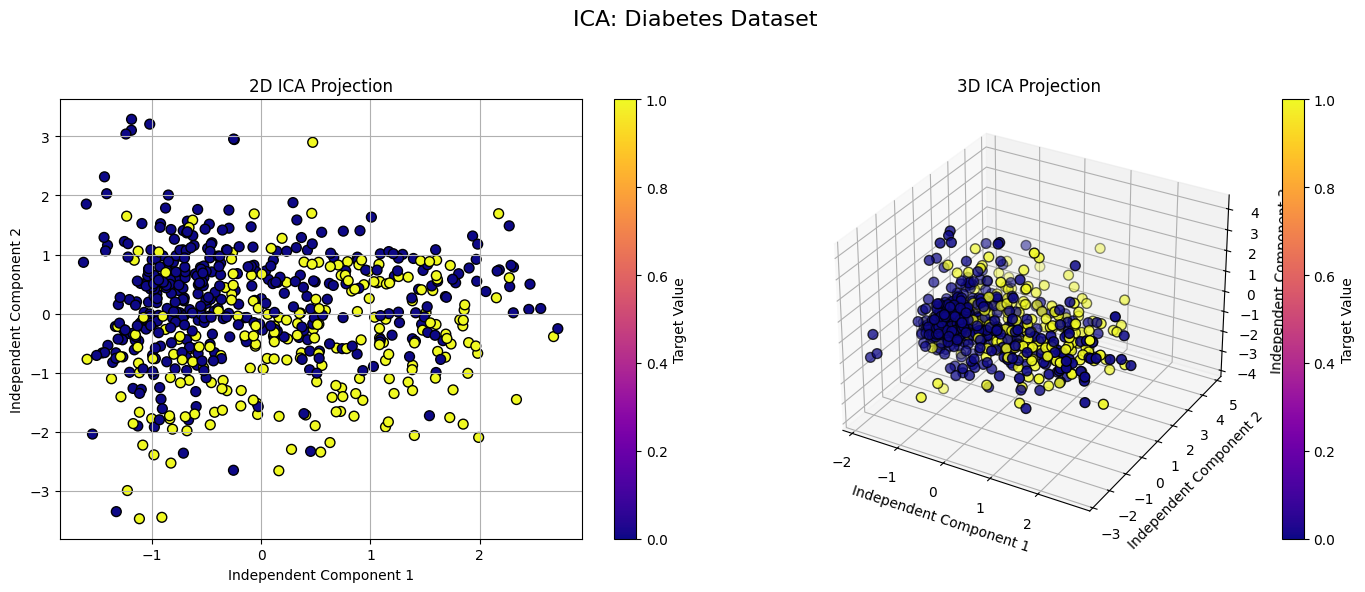

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ICA with 2 components
start_time_2d = time.time()
ica_2d = FastICA(n_components=2, random_state=4)
X_ica_2d = ica_2d.fit_transform(X_train_scaled)
end_time_2d = time.time()
time_taken_2d = end_time_2d - start_time_2d
print(f"Time taken for ICA with 2 components: {time_taken_2d:.4f} seconds")

# Apply ICA with 3 components
start_time_3d = time.time()
ica_3d = FastICA(n_components=3, random_state=4)
X_ica_3d = ica_3d.fit_transform(X_train_scaled)
end_time_3d = time.time()
time_taken_3d = end_time_3d - start_time_3d
print(f"Time taken for ICA with 3 components: {time_taken_3d:.4f} seconds")

# Plotting the 2D and 3D ICA projections with a main title
plt.figure(figsize=(14, 6))
plt.suptitle("ICA: Diabetes Dataset", fontsize=16)  # Figure title

# 2D Plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_ica_2d[:, 0], X_ica_2d[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=50)
plt.title("2D ICA Projection")
plt.xlabel("Independent Component 1")
plt.ylabel("Independent Component 2")
plt.colorbar(scatter, label="Target Value")
plt.grid(True)

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
sc = ax.scatter(X_ica_3d[:, 0], X_ica_3d[:, 1], X_ica_3d[:, 2], c=y_train, cmap='plasma', edgecolor='k', s=50)
ax.set_title("3D ICA Projection")
ax.set_xlabel("Independent Component 1")
ax.set_ylabel("Independent Component 2")
ax.set_zlabel("Independent Component 3")
plt.colorbar(sc, label="Target Value")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


##### **ICA: Concrete Strength Dataset**

ICA Components: 2, Reconstruction Error: 0.5380, Kurtosis: 2.5724
ICA Components: 3, Reconstruction Error: 0.3705, Kurtosis: 2.9946
ICA Components: 4, Reconstruction Error: 0.2437, Kurtosis: 3.9083
ICA Components: 5, Reconstruction Error: 0.1247, Kurtosis: 3.8112

Best ICA component count (Reconstruction Error): 5 with Error: 0.1247
Best ICA component count (Kurtosis): 4 with Kurtosis: 3.9083


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


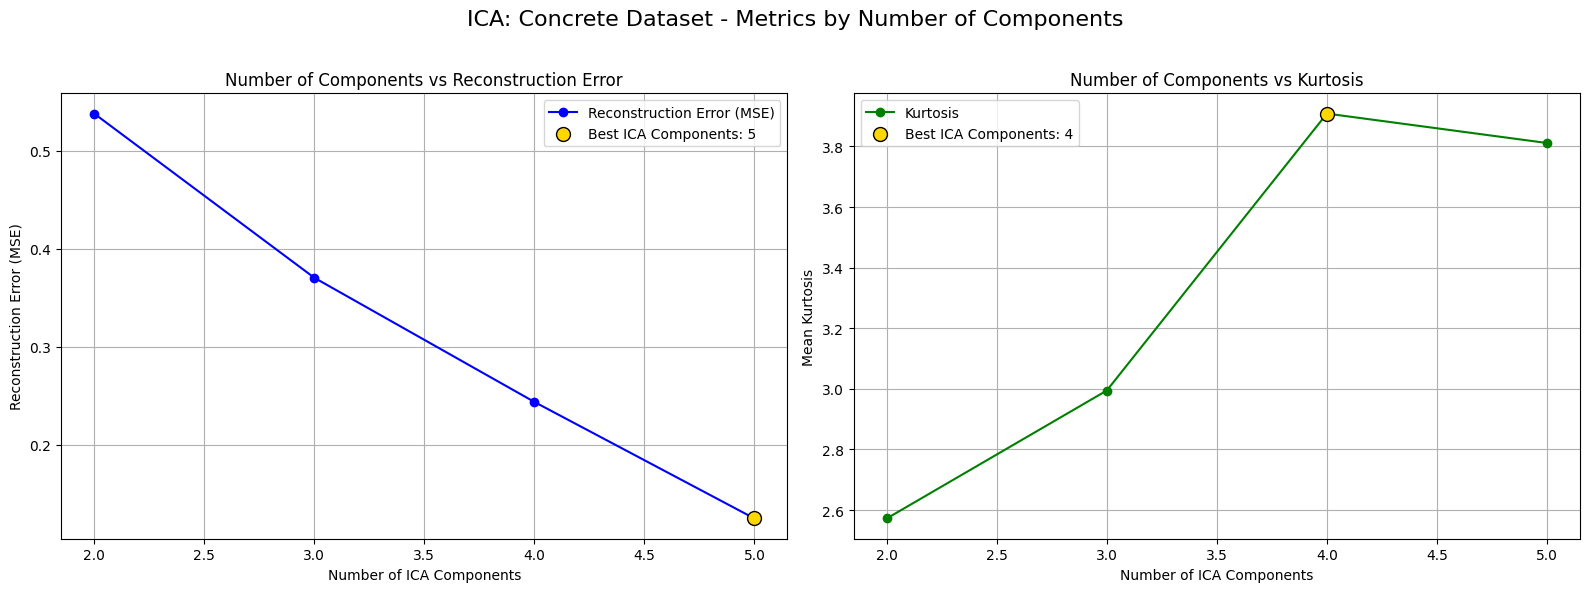

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler

# Load the concrete dataset features
X = concrete.features

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of ICA components
ica_components_range = list(range(2, 6))

# To store reconstruction errors and kurtosis values
reconstruction_errors = []
kurtosis_values = []

# Loop over each component count
for n_components in ica_components_range:
    # Apply ICA transformation
    ica = FastICA(n_components=n_components, random_state=4)
    X_transformed = ica.fit_transform(X_scaled)
    X_reconstructed = ica.inverse_transform(X_transformed)

    # Calculate reconstruction error using mean squared error
    reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(reconstruction_error)

    # Calculate kurtosis for the independent components
    component_kurtosis = np.mean(kurtosis(X_transformed, axis=0, fisher=False))
    kurtosis_values.append(component_kurtosis)

    print(f"ICA Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}, Kurtosis: {component_kurtosis:.4f}")

# Identify the best number of components
best_n_components_reconstruction = ica_components_range[np.argmin(reconstruction_errors)]
best_reconstruction_error = min(reconstruction_errors)
best_n_components_kurtosis = ica_components_range[np.argmax(kurtosis_values)]
best_kurtosis = max(kurtosis_values)

print(f"\nBest ICA component count (Reconstruction Error): {best_n_components_reconstruction} with Error: {best_reconstruction_error:.4f}")
print(f"Best ICA component count (Kurtosis): {best_n_components_kurtosis} with Kurtosis: {best_kurtosis:.4f}")

# Plot the metrics
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("ICA: Concrete Dataset - Metrics by Number of Components", fontsize=16)

# Plot Reconstruction Error
axes[0].plot(ica_components_range, reconstruction_errors, marker='o', linestyle='-', color='b', label="Reconstruction Error (MSE)")
axes[0].scatter(best_n_components_reconstruction, best_reconstruction_error, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best ICA Components: {best_n_components_reconstruction}")
axes[0].set_xlabel("Number of ICA Components")
axes[0].set_ylabel("Reconstruction Error (MSE)")
axes[0].set_title("Number of Components vs Reconstruction Error")
axes[0].grid(True)
axes[0].legend()

# Plot Kurtosis
axes[1].plot(ica_components_range, kurtosis_values, marker='o', linestyle='-', color='g', label="Kurtosis")
axes[1].scatter(best_n_components_kurtosis, best_kurtosis, color='gold', edgecolor='black', s=100, zorder=5,
                label=f"Best ICA Components: {best_n_components_kurtosis}")
axes[1].set_xlabel("Number of ICA Components")
axes[1].set_ylabel("Mean Kurtosis")
axes[1].set_title("Number of Components vs Kurtosis")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Time taken for ICA with 2 components: 0.0038 seconds
Time taken for ICA with 3 components: 0.0054 seconds


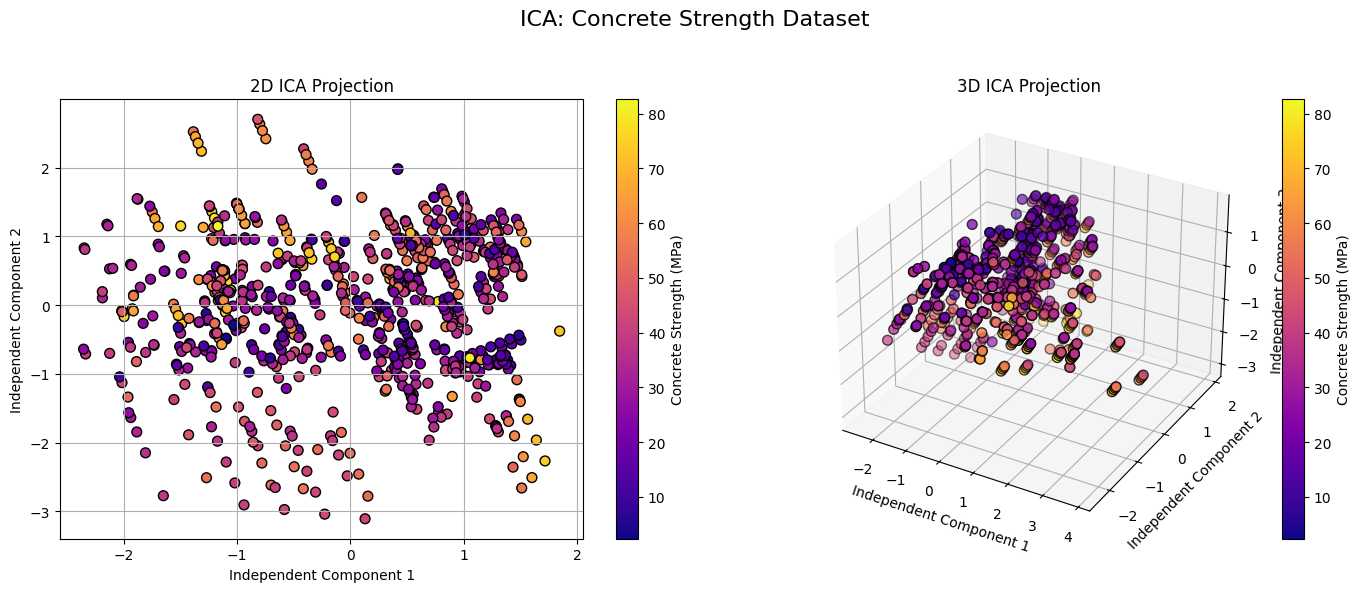

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time

# Load and split the concrete strength dataset
X = concrete.features  # Features from the concrete strength dataset
y = concrete.target  # Target values (strength)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Measure time for ICA with 2 components
start_time_2d = time.time()
ica_2d = FastICA(n_components=2, random_state=4)
X_ica_2d = ica_2d.fit_transform(X_train_scaled)
end_time_2d = time.time()
time_taken_2d = end_time_2d - start_time_2d
print(f"Time taken for ICA with 2 components: {time_taken_2d:.4f} seconds")

# Measure time for ICA with 3 components
start_time_3d = time.time()
ica_3d = FastICA(n_components=3, random_state=4)
X_ica_3d = ica_3d.fit_transform(X_train_scaled)
end_time_3d = time.time()
time_taken_3d = end_time_3d - start_time_3d
print(f"Time taken for ICA with 3 components: {time_taken_3d:.4f} seconds")

# Plotting the 2D and 3D ICA projections with a main title
plt.figure(figsize=(14, 6))
plt.suptitle("ICA: Concrete Strength Dataset", fontsize=16)  # Figure title

# 2D Plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_ica_2d[:, 0], X_ica_2d[:, 1], c=y_train, cmap='plasma', edgecolor='k', s=50)
plt.title("2D ICA Projection")
plt.xlabel("Independent Component 1")
plt.ylabel("Independent Component 2")
plt.colorbar(scatter, label="Concrete Strength (MPa)")
plt.grid(True)

# 3D Plot
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
sc = ax.scatter(X_ica_3d[:, 0], X_ica_3d[:, 1], X_ica_3d[:, 2], c=y_train, cmap='plasma', edgecolor='k', s=50)
ax.set_title("3D ICA Projection")
ax.set_xlabel("Independent Component 1")
ax.set_ylabel("Independent Component 2")
ax.set_zlabel("Independent Component 3")
plt.colorbar(sc, label="Concrete Strength (MPa)")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


#### Combined Plots

Diabetes - RP Components: 2, Reconstruction Error: 1.1364
Diabetes - RP Components: 3, Reconstruction Error: 0.9737
Diabetes - RP Components: 4, Reconstruction Error: 1.7323
Diabetes - RP Components: 5, Reconstruction Error: 1.7522

Best RP component count for Diabetes: 3 with Reconstruction Error: 0.9737
Concrete - RP Components: 2, Reconstruction Error: 1.3789
Concrete - RP Components: 3, Reconstruction Error: 0.9953
Concrete - RP Components: 4, Reconstruction Error: 1.8392
Concrete - RP Components: 5, Reconstruction Error: 1.8736

Best RP component count for Concrete: 3 with Reconstruction Error: 0.9953


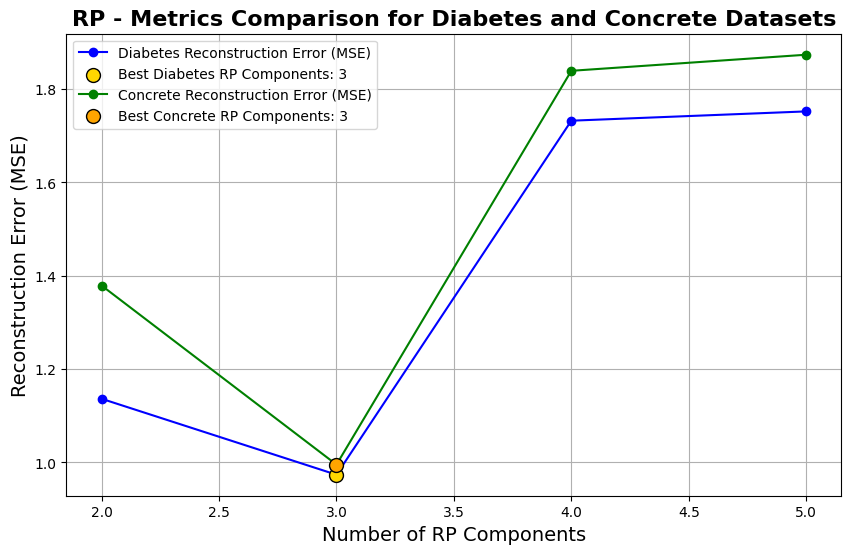

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define the range of RP components
rp_components_range = list(range(2, 6))

# Function to calculate reconstruction errors for a given dataset
def calculate_reconstruction_errors(X, dataset_name):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    reconstruction_errors = []

    # Loop over each component count
    for n_components in rp_components_range:
        # Apply RP transformation
        rp = GaussianRandomProjection(n_components=n_components, random_state=4)
        X_transformed = rp.fit_transform(X_scaled)

        # Approximate inverse transformation
        X_reconstructed = np.dot(X_transformed, rp.components_)

        # Calculate reconstruction error using mean squared error
        reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
        reconstruction_errors.append(reconstruction_error)
        print(f"{dataset_name} - RP Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}")

    # Find the best number of components
    best_n_components = rp_components_range[np.argmin(reconstruction_errors)]
    best_reconstruction_error = min(reconstruction_errors)

    print(f"\nBest RP component count for {dataset_name}: {best_n_components} with Reconstruction Error: {best_reconstruction_error:.4f}")

    return reconstruction_errors, best_n_components, best_reconstruction_error

# Calculate reconstruction errors for diabetes dataset
diabetes_errors, diabetes_best_components, diabetes_best_error = calculate_reconstruction_errors(diabetes.features, "Diabetes")

# Calculate reconstruction errors for concrete dataset
concrete_errors, concrete_best_components, concrete_best_error = calculate_reconstruction_errors(concrete.features, "Concrete")

# Plot both datasets on the same figure
plt.figure(figsize=(10, 6))

# Diabetes dataset plot
plt.plot(rp_components_range, diabetes_errors, marker='o', linestyle='-', color='blue', label="Diabetes Reconstruction Error (MSE)")
plt.scatter(diabetes_best_components, diabetes_best_error, color='gold', edgecolor='black', s=100, zorder=5, label=f"Best Diabetes RP Components: {diabetes_best_components}")

# Concrete dataset plot
plt.plot(rp_components_range, concrete_errors, marker='o', linestyle='-', color='green', label="Concrete Reconstruction Error (MSE)")
plt.scatter(concrete_best_components, concrete_best_error, color='orange', edgecolor='black', s=100, zorder=5, label=f"Best Concrete RP Components: {concrete_best_components}")

# Set labels, title, and legend
plt.xlabel("Number of RP Components", fontsize=14)
plt.ylabel("Reconstruction Error (MSE)", fontsize=14)
plt.title("RP - Metrics Comparison for Diabetes and Concrete Datasets", fontsize=16, fontweight='bold')
plt.grid(True)
plt.legend()
plt.show()


Diabetes - PCA Components: 2, Reconstruction Error: 0.5218, Explained Variance Ratio: 0.4782
Diabetes - PCA Components: 3, Reconstruction Error: 0.3931, Explained Variance Ratio: 0.6069
Diabetes - PCA Components: 4, Reconstruction Error: 0.2837, Explained Variance Ratio: 0.7163
Diabetes - PCA Components: 5, Reconstruction Error: 0.1884, Explained Variance Ratio: 0.8116

Best PCA component count for Diabetes (Reconstruction Error): 5 with Error: 0.1884
Best PCA component count for Diabetes (Explained Variance Ratio): 5 with Variance Ratio: 0.8116
Concrete - PCA Components: 2, Reconstruction Error: 0.5380, Explained Variance Ratio: 0.4620
Concrete - PCA Components: 3, Reconstruction Error: 0.3705, Explained Variance Ratio: 0.6295
Concrete - PCA Components: 4, Reconstruction Error: 0.2437, Explained Variance Ratio: 0.7563
Concrete - PCA Components: 5, Reconstruction Error: 0.1247, Explained Variance Ratio: 0.8753

Best PCA component count for Concrete (Reconstruction Error): 5 with Error:

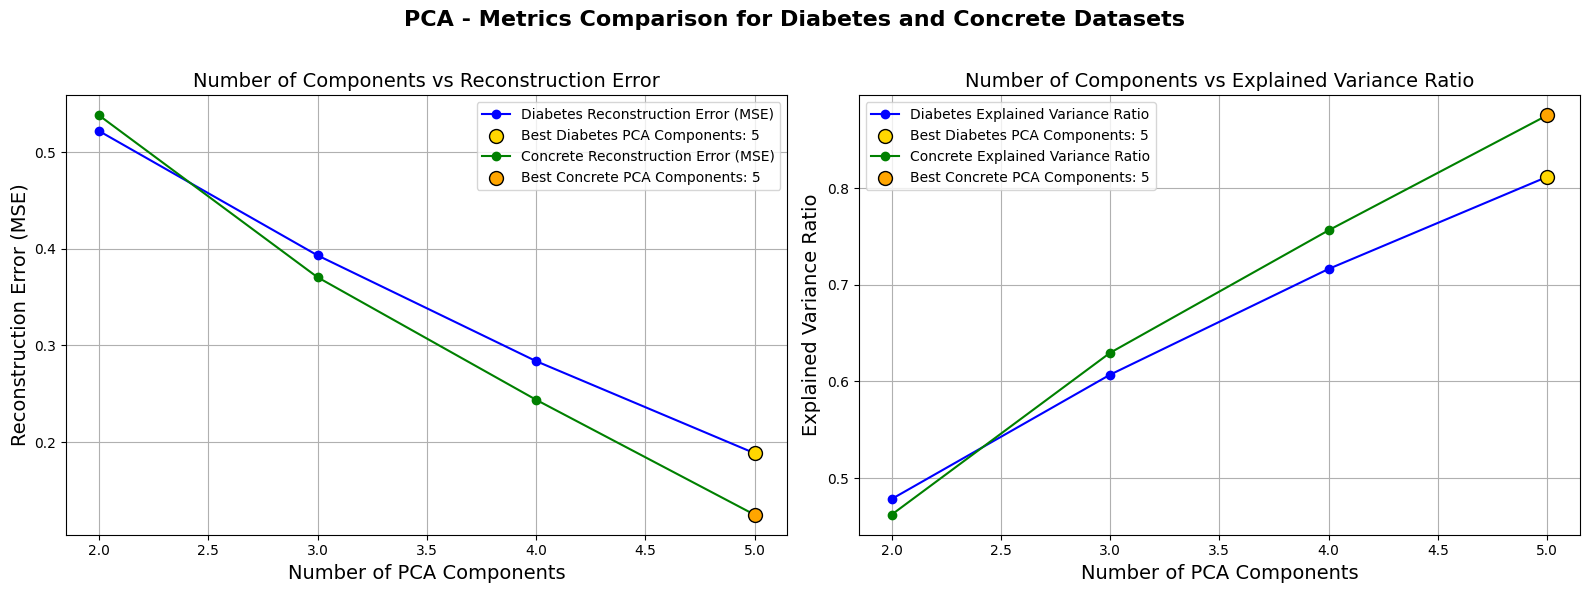

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define datasets and labels for convenience
datasets = {
    'Diabetes': diabetes.features,
    'Concrete': concrete.features
}

# Define the range of PCA components
pca_components_range = list(range(2, 6))

# Function to calculate metrics for PCA
def calculate_pca_metrics(X, dataset_name):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    reconstruction_errors = []
    explained_variance_ratios = []

    # Loop over each component count
    for n_components in pca_components_range:
        # Apply PCA transformation
        pca = PCA(n_components=n_components)
        X_transformed = pca.fit_transform(X_scaled)
        X_reconstructed = pca.inverse_transform(X_transformed)

        # Calculate reconstruction error
        reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
        reconstruction_errors.append(reconstruction_error)

        # Store cumulative explained variance ratio
        explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

        print(f"{dataset_name} - PCA Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}, Explained Variance Ratio: {explained_variance_ratios[-1]:.4f}")

    # Find the best number of components for each metric
    best_n_components_reconstruction = pca_components_range[np.argmin(reconstruction_errors)]
    best_reconstruction_error = min(reconstruction_errors)
    best_n_components_variance = pca_components_range[np.argmax(explained_variance_ratios)]
    best_explained_variance_ratio = max(explained_variance_ratios)

    print(f"\nBest PCA component count for {dataset_name} (Reconstruction Error): {best_n_components_reconstruction} with Error: {best_reconstruction_error:.4f}")
    print(f"Best PCA component count for {dataset_name} (Explained Variance Ratio): {best_n_components_variance} with Variance Ratio: {best_explained_variance_ratio:.4f}")

    return reconstruction_errors, explained_variance_ratios, best_n_components_reconstruction, best_reconstruction_error, best_n_components_variance, best_explained_variance_ratio

# Calculate metrics for Diabetes dataset
diabetes_errors, diabetes_variances, diabetes_best_recon, diabetes_best_recon_error, diabetes_best_var, diabetes_best_var_ratio = calculate_pca_metrics(datasets['Diabetes'], "Diabetes")

# Calculate metrics for Concrete dataset
concrete_errors, concrete_variances, concrete_best_recon, concrete_best_recon_error, concrete_best_var, concrete_best_var_ratio = calculate_pca_metrics(datasets['Concrete'], "Concrete")

# Plotting the combined results for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("PCA - Metrics Comparison for Diabetes and Concrete Datasets", fontsize=16, fontweight='bold')

# Plot Reconstruction Error (MSE) for both datasets
axes[0].plot(pca_components_range, diabetes_errors, marker='o', linestyle='-', color='blue', label="Diabetes Reconstruction Error (MSE)")
axes[0].scatter(diabetes_best_recon, diabetes_best_recon_error, color='gold', edgecolor='black', s=100, zorder=5, label=f"Best Diabetes PCA Components: {diabetes_best_recon}")
axes[0].plot(pca_components_range, concrete_errors, marker='o', linestyle='-', color='green', label="Concrete Reconstruction Error (MSE)")
axes[0].scatter(concrete_best_recon, concrete_best_recon_error, color='orange', edgecolor='black', s=100, zorder=5, label=f"Best Concrete PCA Components: {concrete_best_recon}")
axes[0].set_xlabel("Number of PCA Components", fontsize=14)
axes[0].set_ylabel("Reconstruction Error (MSE)", fontsize=14)
axes[0].set_title("Number of Components vs Reconstruction Error", fontsize=14)
axes[0].grid(True)
axes[0].legend()

# Plot Explained Variance Ratio for both datasets
axes[1].plot(pca_components_range, diabetes_variances, marker='o', linestyle='-', color='blue', label="Diabetes Explained Variance Ratio")
axes[1].scatter(diabetes_best_var, diabetes_best_var_ratio, color='gold', edgecolor='black', s=100, zorder=5, label=f"Best Diabetes PCA Components: {diabetes_best_var}")
axes[1].plot(pca_components_range, concrete_variances, marker='o', linestyle='-', color='green', label="Concrete Explained Variance Ratio")
axes[1].scatter(concrete_best_var, concrete_best_var_ratio, color='orange', edgecolor='black', s=100, zorder=5, label=f"Best Concrete PCA Components: {concrete_best_var}")
axes[1].set_xlabel("Number of PCA Components", fontsize=14)
axes[1].set_ylabel("Explained Variance Ratio", fontsize=14)
axes[1].set_title("Number of Components vs Explained Variance Ratio", fontsize=14)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Diabetes - ICA Components: 2, Reconstruction Error: 0.5218, Kurtosis: 3.1982
Diabetes - ICA Components: 3, Reconstruction Error: 0.3931, Kurtosis: 4.8001
Diabetes - ICA Components: 4, Reconstruction Error: 0.2837, Kurtosis: 5.5317
Diabetes - ICA Components: 5, Reconstruction Error: 0.1884, Kurtosis: 5.5053

Best ICA component count for Diabetes (Reconstruction Error): 5 with Error: 0.1884
Best ICA component count for Diabetes (Kurtosis): 4 with Kurtosis: 5.5317
Concrete - ICA Components: 2, Reconstruction Error: 0.5380, Kurtosis: 2.5724
Concrete - ICA Components: 3, Reconstruction Error: 0.3705, Kurtosis: 2.9946
Concrete - ICA Components: 4, Reconstruction Error: 0.2437, Kurtosis: 3.9083
Concrete - ICA Components: 5, Reconstruction Error: 0.1247, Kurtosis: 3.8112

Best ICA component count for Concrete (Reconstruction Error): 5 with Error: 0.1247
Best ICA component count for Concrete (Kurtosis): 4 with Kurtosis: 3.9083


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


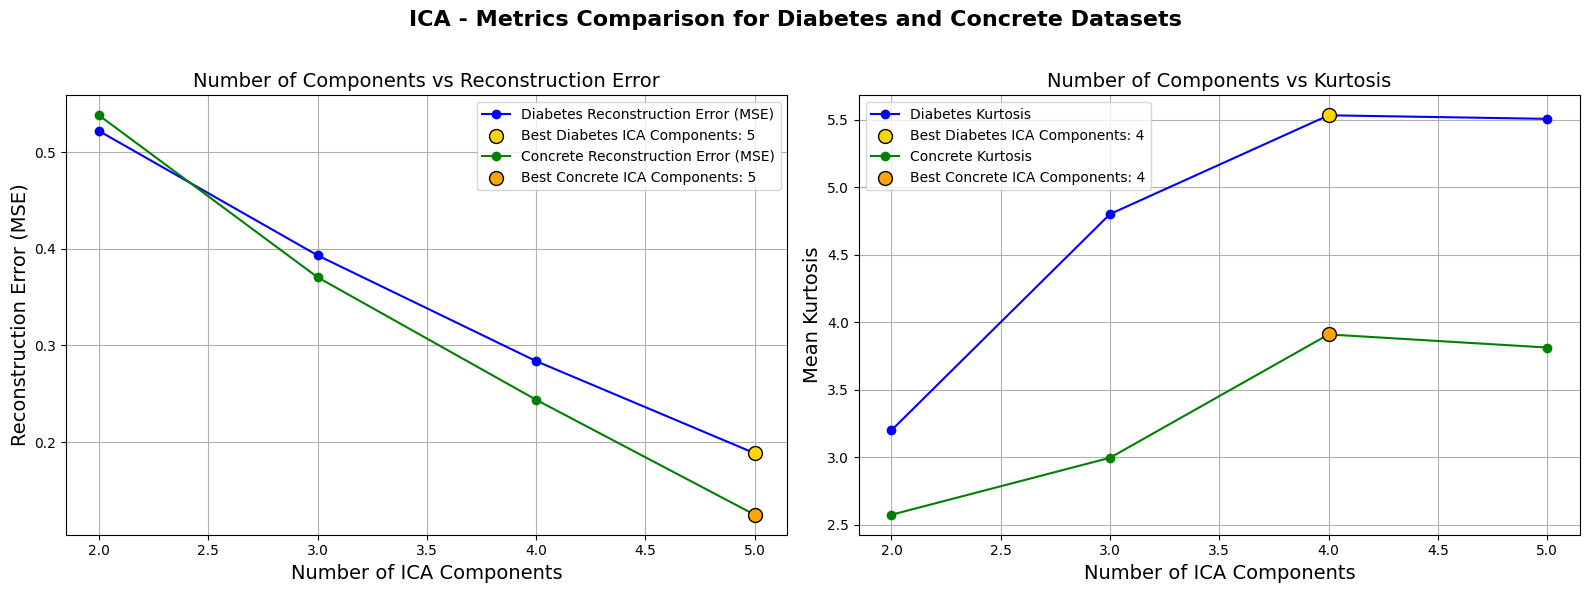

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis
from sklearn.preprocessing import StandardScaler

# Define datasets and labels for convenience
datasets = {
    'Diabetes': diabetes.features,
    'Concrete': concrete.features
}

# Define the range of ICA components
ica_components_range = list(range(2, 6))

# Function to calculate metrics for ICA
def calculate_ica_metrics(X, dataset_name):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    reconstruction_errors = []
    kurtosis_values = []

    # Loop over each component count
    for n_components in ica_components_range:
        # Apply ICA transformation
        ica = FastICA(n_components=n_components, random_state=4)
        X_transformed = ica.fit_transform(X_scaled)
        X_reconstructed = ica.inverse_transform(X_transformed)

        # Calculate reconstruction error using mean squared error
        reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
        reconstruction_errors.append(reconstruction_error)

        # Calculate kurtosis for the independent components
        component_kurtosis = np.mean(kurtosis(X_transformed, axis=0, fisher=False))
        kurtosis_values.append(component_kurtosis)

        print(f"{dataset_name} - ICA Components: {n_components}, Reconstruction Error: {reconstruction_error:.4f}, Kurtosis: {component_kurtosis:.4f}")

    # Find the best number of components for each metric
    best_n_components_reconstruction = ica_components_range[np.argmin(reconstruction_errors)]
    best_reconstruction_error = min(reconstruction_errors)
    best_n_components_kurtosis = ica_components_range[np.argmax(kurtosis_values)]
    best_kurtosis = max(kurtosis_values)

    print(f"\nBest ICA component count for {dataset_name} (Reconstruction Error): {best_n_components_reconstruction} with Error: {best_reconstruction_error:.4f}")
    print(f"Best ICA component count for {dataset_name} (Kurtosis): {best_n_components_kurtosis} with Kurtosis: {best_kurtosis:.4f}")

    return reconstruction_errors, kurtosis_values, best_n_components_reconstruction, best_reconstruction_error, best_n_components_kurtosis, best_kurtosis

# Calculate metrics for Diabetes dataset
diabetes_errors, diabetes_kurtosis, diabetes_best_recon, diabetes_best_recon_error, diabetes_best_kurt, diabetes_best_kurt_val = calculate_ica_metrics(datasets['Diabetes'], "Diabetes")

# Calculate metrics for Concrete dataset
concrete_errors, concrete_kurtosis, concrete_best_recon, concrete_best_recon_error, concrete_best_kurt, concrete_best_kurt_val = calculate_ica_metrics(datasets['Concrete'], "Concrete")

# Plotting the combined results for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("ICA - Metrics Comparison for Diabetes and Concrete Datasets", fontsize=16, fontweight='bold')

# Plot Reconstruction Error (MSE) for both datasets
axes[0].plot(ica_components_range, diabetes_errors, marker='o', linestyle='-', color='blue', label="Diabetes Reconstruction Error (MSE)")
axes[0].scatter(diabetes_best_recon, diabetes_best_recon_error, color='gold', edgecolor='black', s=100, zorder=5, label=f"Best Diabetes ICA Components: {diabetes_best_recon}")
axes[0].plot(ica_components_range, concrete_errors, marker='o', linestyle='-', color='green', label="Concrete Reconstruction Error (MSE)")
axes[0].scatter(concrete_best_recon, concrete_best_recon_error, color='orange', edgecolor='black', s=100, zorder=5, label=f"Best Concrete ICA Components: {concrete_best_recon}")
axes[0].set_xlabel("Number of ICA Components", fontsize=14)
axes[0].set_ylabel("Reconstruction Error (MSE)", fontsize=14)
axes[0].set_title("Number of Components vs Reconstruction Error", fontsize=14)
axes[0].grid(True)
axes[0].legend()

# Plot Kurtosis for both datasets
axes[1].plot(ica_components_range, diabetes_kurtosis, marker='o', linestyle='-', color='blue', label="Diabetes Kurtosis")
axes[1].scatter(diabetes_best_kurt, diabetes_best_kurt_val, color='gold', edgecolor='black', s=100, zorder=5, label=f"Best Diabetes ICA Components: {diabetes_best_kurt}")
axes[1].plot(ica_components_range, concrete_kurtosis, marker='o', linestyle='-', color='green', label="Concrete Kurtosis")
axes[1].scatter(concrete_best_kurt, concrete_best_kurt_val, color='orange', edgecolor='black', s=100, zorder=5, label=f"Best Concrete ICA Components: {concrete_best_kurt}")
axes[1].set_xlabel("Number of ICA Components", fontsize=14)
axes[1].set_ylabel("Mean Kurtosis", fontsize=14)
axes[1].set_title("Number of Components vs Kurtosis", fontsize=14)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Diabetes - Components: 2, RP Time: 0.0010s, PCA Time: 0.0013s, ICA Time: 0.0024s
Diabetes - Components: 3, RP Time: 0.0017s, PCA Time: 0.0008s, ICA Time: 0.0042s
Diabetes - Components: 4, RP Time: 0.0013s, PCA Time: 0.0015s, ICA Time: 0.0038s
Diabetes - Components: 5, RP Time: 0.0016s, PCA Time: 0.0008s, ICA Time: 0.0121s
Concrete - Components: 2, RP Time: 0.0008s, PCA Time: 0.0008s, ICA Time: 0.0038s
Concrete - Components: 3, RP Time: 0.0016s, PCA Time: 0.0009s, ICA Time: 0.0049s
Concrete - Components: 4, RP Time: 0.0017s, PCA Time: 0.0008s, ICA Time: 0.0088s
Concrete - Components: 5, RP Time: 0.0017s, PCA Time: 0.0010s, ICA Time: 0.1266s


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


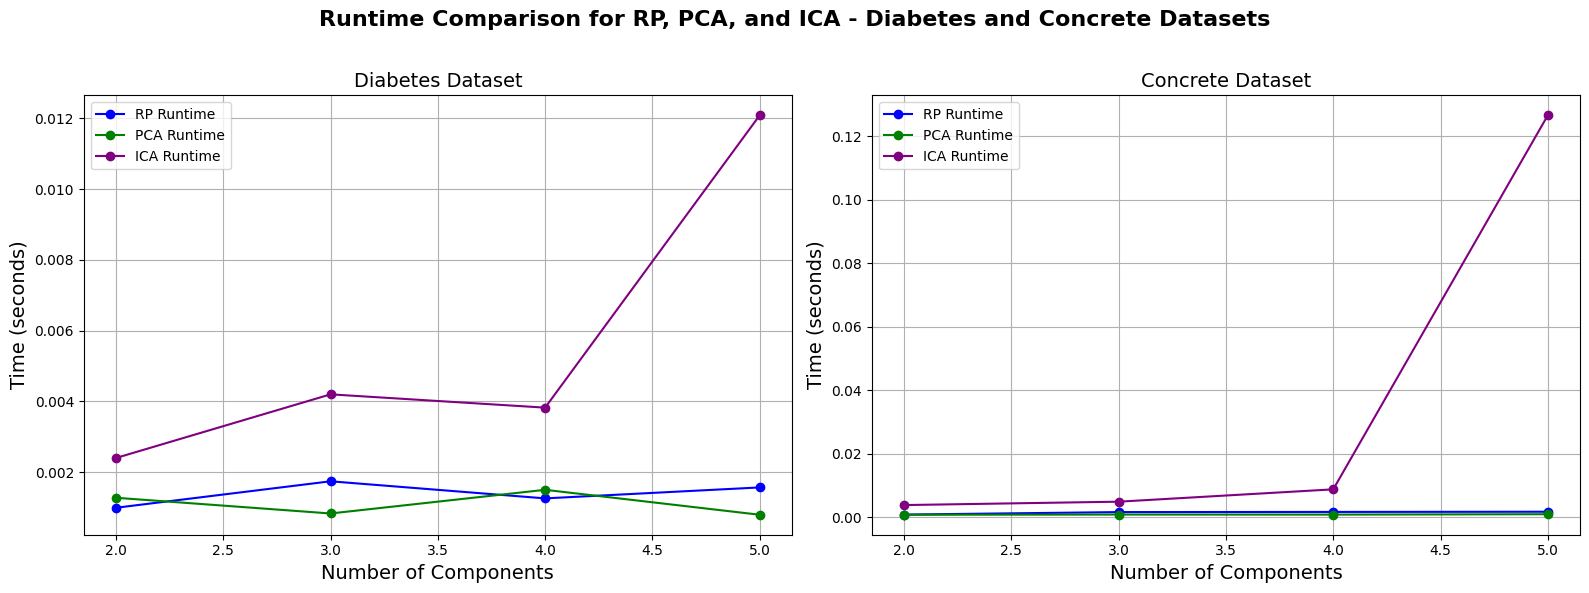

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

# Define datasets and labels for convenience
datasets = {
    'Diabetes': diabetes.features,
    'Concrete': concrete.features
}

# Define the range of components to test
components_range = list(range(2, 6))

# Function to calculate runtime for RP, PCA, and ICA for each dataset
def calculate_runtimes(X, dataset_name):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize lists to store runtimes
    rp_times = []
    pca_times = []
    ica_times = []

    # Loop over each component count
    for n_components in components_range:
        # RP Runtime
        start_time = time.time()
        rp = GaussianRandomProjection(n_components=n_components, random_state=4)
        rp.fit_transform(X_scaled)
        rp_times.append(time.time() - start_time)

        # PCA Runtime
        start_time = time.time()
        pca = PCA(n_components=n_components)
        pca.fit_transform(X_scaled)
        pca_times.append(time.time() - start_time)

        # ICA Runtime
        start_time = time.time()
        ica = FastICA(n_components=n_components, random_state=4)
        ica.fit_transform(X_scaled)
        ica_times.append(time.time() - start_time)

        print(f"{dataset_name} - Components: {n_components}, RP Time: {rp_times[-1]:.4f}s, PCA Time: {pca_times[-1]:.4f}s, ICA Time: {ica_times[-1]:.4f}s")

    return rp_times, pca_times, ica_times

# Calculate runtimes for both datasets
diabetes_rp_times, diabetes_pca_times, diabetes_ica_times = calculate_runtimes(datasets['Diabetes'], "Diabetes")
concrete_rp_times, concrete_pca_times, concrete_ica_times = calculate_runtimes(datasets['Concrete'], "Concrete")

# Plotting the combined runtime results for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Runtime Comparison for RP, PCA, and ICA - Diabetes and Concrete Datasets", fontsize=16, fontweight='bold')

# Plot runtime for Diabetes dataset
axes[0].plot(components_range, diabetes_rp_times, marker='o', linestyle='-', color='blue', label="RP Runtime")
axes[0].plot(components_range, diabetes_pca_times, marker='o', linestyle='-', color='green', label="PCA Runtime")
axes[0].plot(components_range, diabetes_ica_times, marker='o', linestyle='-', color='purple', label="ICA Runtime")
axes[0].set_xlabel("Number of Components", fontsize=14)
axes[0].set_ylabel("Time (seconds)", fontsize=14)
axes[0].set_title("Diabetes Dataset", fontsize=14)
axes[0].grid(True)
axes[0].legend()

# Plot runtime for Concrete dataset
axes[1].plot(components_range, concrete_rp_times, marker='o', linestyle='-', color='blue', label="RP Runtime")
axes[1].plot(components_range, concrete_pca_times, marker='o', linestyle='-', color='green', label="PCA Runtime")
axes[1].plot(components_range, concrete_ica_times, marker='o', linestyle='-', color='purple', label="ICA Runtime")
axes[1].set_xlabel("Number of Components", fontsize=14)
axes[1].set_ylabel("Time (seconds)", fontsize=14)
axes[1].set_title("Concrete Dataset", fontsize=14)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


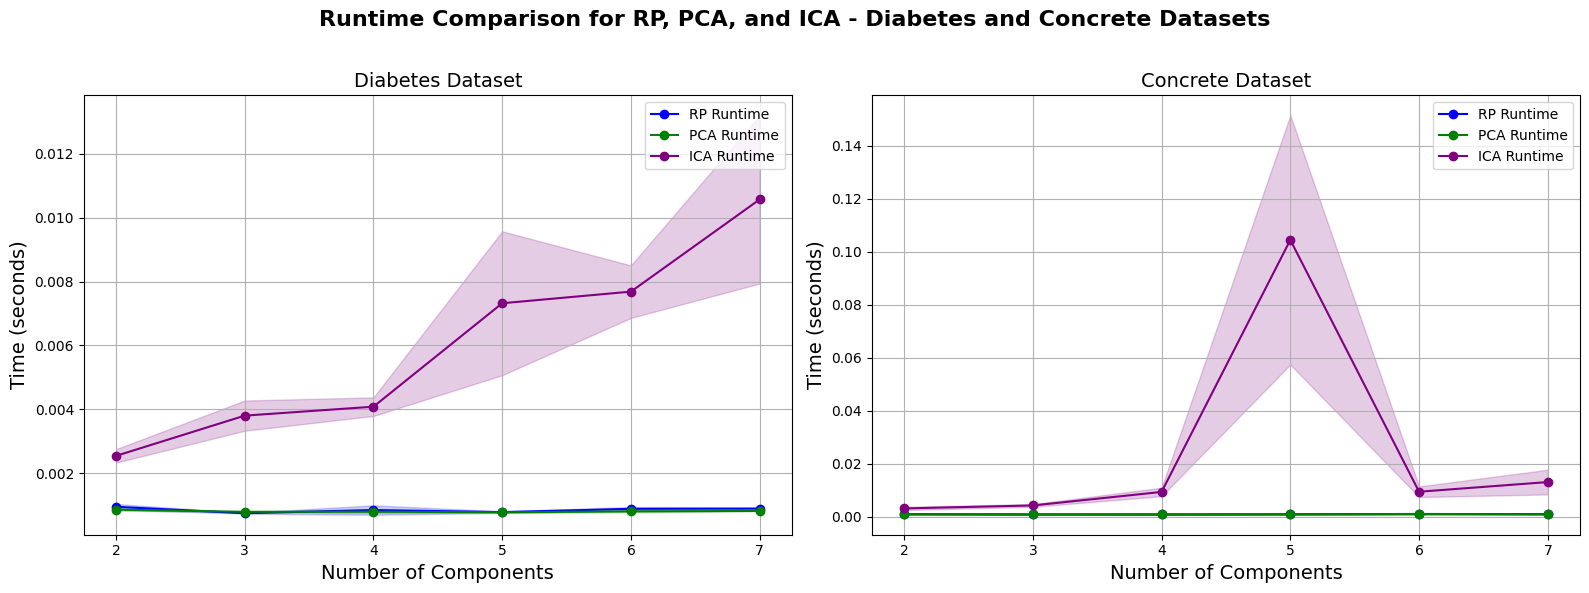

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

# Define datasets and labels for convenience
datasets = {
    'Diabetes': diabetes.features,
    'Concrete': concrete.features
}

# Define the range of components to test and seeds
components_range = list(range(2, 8))
seeds = [4, 42, 123, 256, 512]

# Function to calculate runtime for RP, PCA, and ICA across multiple seeds
def calculate_runtimes(X, dataset_name):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize arrays to store runtimes for each seed
    rp_times = np.zeros((len(seeds), len(components_range)))
    pca_times = np.zeros((len(seeds), len(components_range)))
    ica_times = np.zeros((len(seeds), len(components_range)))

    # Loop over seeds
    for seed_idx, seed in enumerate(seeds):
        # Loop over each component count
        for i, n_components in enumerate(components_range):
            # RP Runtime
            start_time = time.time()
            rp = GaussianRandomProjection(n_components=n_components, random_state=seed)
            rp.fit_transform(X_scaled)
            rp_times[seed_idx, i] = time.time() - start_time

            # PCA Runtime
            start_time = time.time()
            pca = PCA(n_components=n_components)
            pca.fit_transform(X_scaled)
            pca_times[seed_idx, i] = time.time() - start_time

            # ICA Runtime
            start_time = time.time()
            ica = FastICA(n_components=n_components, random_state=seed)
            ica.fit_transform(X_scaled)
            ica_times[seed_idx, i] = time.time() - start_time

    # Calculate mean and standard deviation across seeds
    rp_mean, rp_std = np.mean(rp_times, axis=0), np.std(rp_times, axis=0)
    pca_mean, pca_std = np.mean(pca_times, axis=0), np.std(pca_times, axis=0)
    ica_mean, ica_std = np.mean(ica_times, axis=0), np.std(ica_times, axis=0)

    return rp_mean, rp_std, pca_mean, pca_std, ica_mean, ica_std

# Calculate runtimes for both datasets
diabetes_rp_mean, diabetes_rp_std, diabetes_pca_mean, diabetes_pca_std, diabetes_ica_mean, diabetes_ica_std = calculate_runtimes(datasets['Diabetes'], "Diabetes")
concrete_rp_mean, concrete_rp_std, concrete_pca_mean, concrete_pca_std, concrete_ica_mean, concrete_ica_std = calculate_runtimes(datasets['Concrete'], "Concrete")

# Plotting the combined runtime results with variability for both datasets
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Runtime Comparison for RP, PCA, and ICA - Diabetes and Concrete Datasets", fontsize=16, fontweight='bold')

# Plot runtime for Diabetes dataset with ±1 std shading
axes[0].plot(components_range, diabetes_rp_mean, marker='o', linestyle='-', color='blue', label="RP Runtime")
axes[0].fill_between(components_range, diabetes_rp_mean - diabetes_rp_std, diabetes_rp_mean + diabetes_rp_std, color='blue', alpha=0.2)

axes[0].plot(components_range, diabetes_pca_mean, marker='o', linestyle='-', color='green', label="PCA Runtime")
axes[0].fill_between(components_range, diabetes_pca_mean - diabetes_pca_std, diabetes_pca_mean + diabetes_pca_std, color='green', alpha=0.2)

axes[0].plot(components_range, diabetes_ica_mean, marker='o', linestyle='-', color='purple', label="ICA Runtime")
axes[0].fill_between(components_range, diabetes_ica_mean - diabetes_ica_std, diabetes_ica_mean + diabetes_ica_std, color='purple', alpha=0.2)

axes[0].set_xlabel("Number of Components", fontsize=14)
axes[0].set_ylabel("Time (seconds)", fontsize=14)
axes[0].set_title("Diabetes Dataset", fontsize=14)
axes[0].grid(True)
axes[0].legend()

# Plot runtime for Concrete dataset with ±1 std shading
axes[1].plot(components_range, concrete_rp_mean, marker='o', linestyle='-', color='blue', label="RP Runtime")
axes[1].fill_between(components_range, concrete_rp_mean - concrete_rp_std, concrete_rp_mean + concrete_rp_std, color='blue', alpha=0.2)

axes[1].plot(components_range, concrete_pca_mean, marker='o', linestyle='-', color='green', label="PCA Runtime")
axes[1].fill_between(components_range, concrete_pca_mean - concrete_pca_std, concrete_pca_mean + concrete_pca_std, color='green', alpha=0.2)

axes[1].plot(components_range, concrete_ica_mean, marker='o', linestyle='-', color='purple', label="ICA Runtime")
axes[1].fill_between(components_range, concrete_ica_mean - concrete_ica_std, concrete_ica_mean + concrete_ica_std, color='purple', alpha=0.2)

axes[1].set_xlabel("Number of Components", fontsize=14)
axes[1].set_ylabel("Time (seconds)", fontsize=14)
axes[1].set_title("Concrete Dataset", fontsize=14)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### **3. Apply Clustering Algorithms on Set of Dimensionality Reduction Datasets**

#### Combination 1: EM applied to diabetes dataset with RP dim. red.

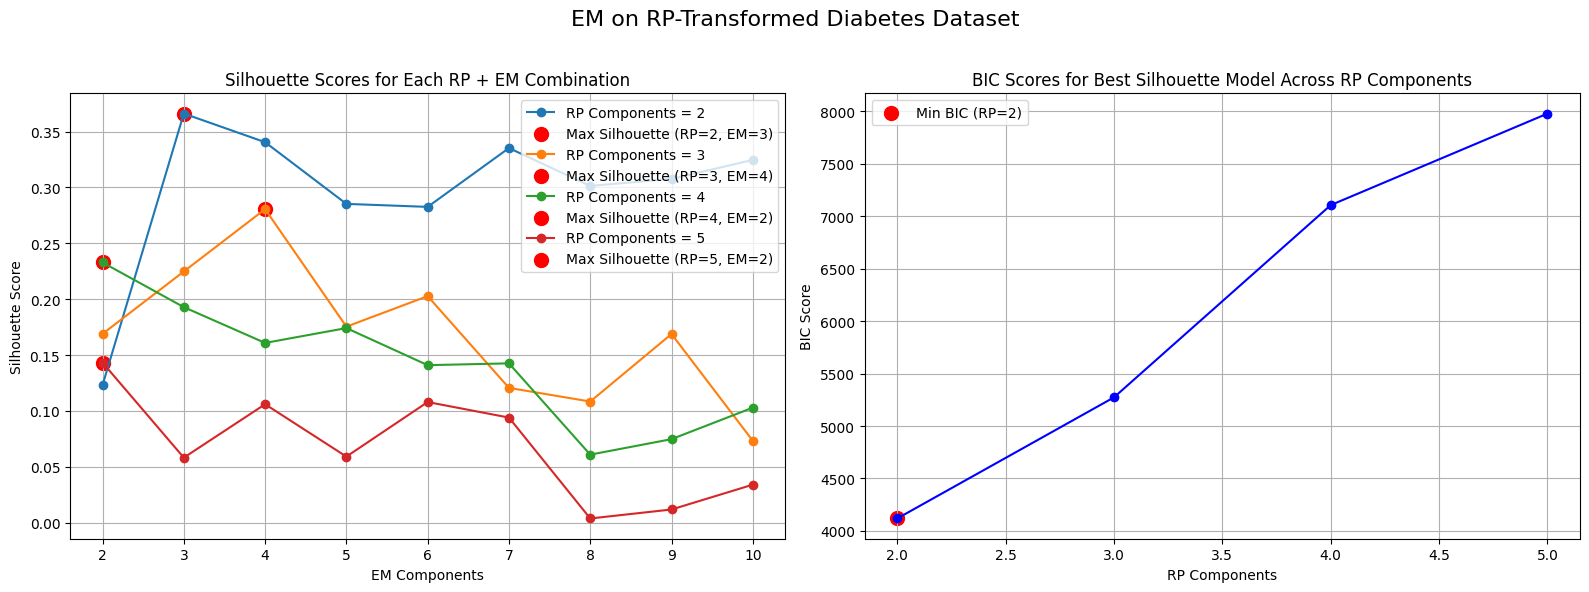


Best model parameters: RP Components = 2, EM Components = 3

Final model evaluation metrics on training data:
RP Components: 2, EM Components: 3
BIC Score: 4117.9521
AIC Score: 4042.8122
Silhouette Score: 0.3661
Log-Likelihood: -2004.4061


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of RP and EM components
rp_components_range = [2, 3, 4, 5]
em_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over RP components and apply RP with different EM component numbers
for rp_components in rp_components_range:
    best_silhouette_score = -1
    best_em_components = None
    best_gmm = None

    # Apply RP transformation
    rp = GaussianRandomProjection(n_components=rp_components, random_state=4)
    X_train_rp = rp.fit_transform(X_train_scaled)

    # Apply EM on the RP-transformed data and compute silhouette score
    silhouette_scores = []
    for em_components in em_components_range:
        gmm = GaussianMixture(n_components=em_components, random_state=4)
        gmm.fit(X_train_rp)

        # Predict clusters and calculate silhouette score
        y_train_pred = gmm.predict(X_train_rp)
        sil_score = silhouette_score(X_train_rp, y_train_pred) if em_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this RP setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_em_components = em_components
            best_gmm = gmm

    # Store the best model and scores for this RP setting
    best_models[rp_components] = {
        "best_gmm": best_gmm,
        "best_em_components": best_em_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_rp": X_train_rp
    }

# Step 3: Plot silhouette scores for each RP + EM combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("EM on RP-Transformed Diabetes Dataset", fontsize=16)

for rp_components in rp_components_range:
    silhouette_scores = best_models[rp_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(em_components_range, silhouette_scores, marker='o', label=f"RP Components = {rp_components}")
    axes[0].scatter(em_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (RP={rp_components}, EM={em_components_range[best_sil_idx]})")

axes[0].set_xlabel("EM Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each RP + EM Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across RP transformations based on BIC and plot results
bic_scores = []
for rp_components, model_details in best_models.items():
    gmm = model_details["best_gmm"]
    X_train_rp = model_details["X_train_rp"]
    bic = gmm.bic(X_train_rp)
    bic_scores.append(bic)

# Highlight minimum BIC
min_bic_idx = np.argmin(bic_scores)
axes[1].plot(rp_components_range, bic_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(rp_components_range[min_bic_idx], bic_scores[min_bic_idx], color='red', marker='o', s=100,
                label=f"Min BIC (RP={rp_components_range[min_bic_idx]})")

axes[1].set_xlabel("RP Components")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Scores for Best Silhouette Model Across RP Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on BIC
best_rp_components = rp_components_range[min_bic_idx]
best_em_components = best_models[best_rp_components]["best_em_components"]
best_gmm_final = best_models[best_rp_components]["best_gmm"]
X_train_rp_final = best_models[best_rp_components]["X_train_rp"]

print(f"\nBest model parameters: RP Components = {best_rp_components}, EM Components = {best_em_components}")

# Step 6: Retrain model using the best RP and EM components if necessary
# The best_gmm_final model is already fitted on X_train_rp_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
bic_final = best_gmm_final.bic(X_train_rp_final)
aic_final = best_gmm_final.aic(X_train_rp_final)
log_likelihood_final = best_gmm_final.score(X_train_rp_final) * X_train_rp_final.shape[0]  # Total log-likelihood

# Predict clusters and calculate silhouette score for consistency
y_train_pred_final = best_gmm_final.predict(X_train_rp_final)
sil_score_final = silhouette_score(X_train_rp_final, y_train_pred_final)

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"RP Components: {best_rp_components}, EM Components: {best_em_components}")
print(f"BIC Score: {bic_final:.4f}")
print(f"AIC Score: {aic_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Log-Likelihood: {log_likelihood_final:.4f}")


#### Combination 2: EM applied to diabetes dataset with PCA dim. red.

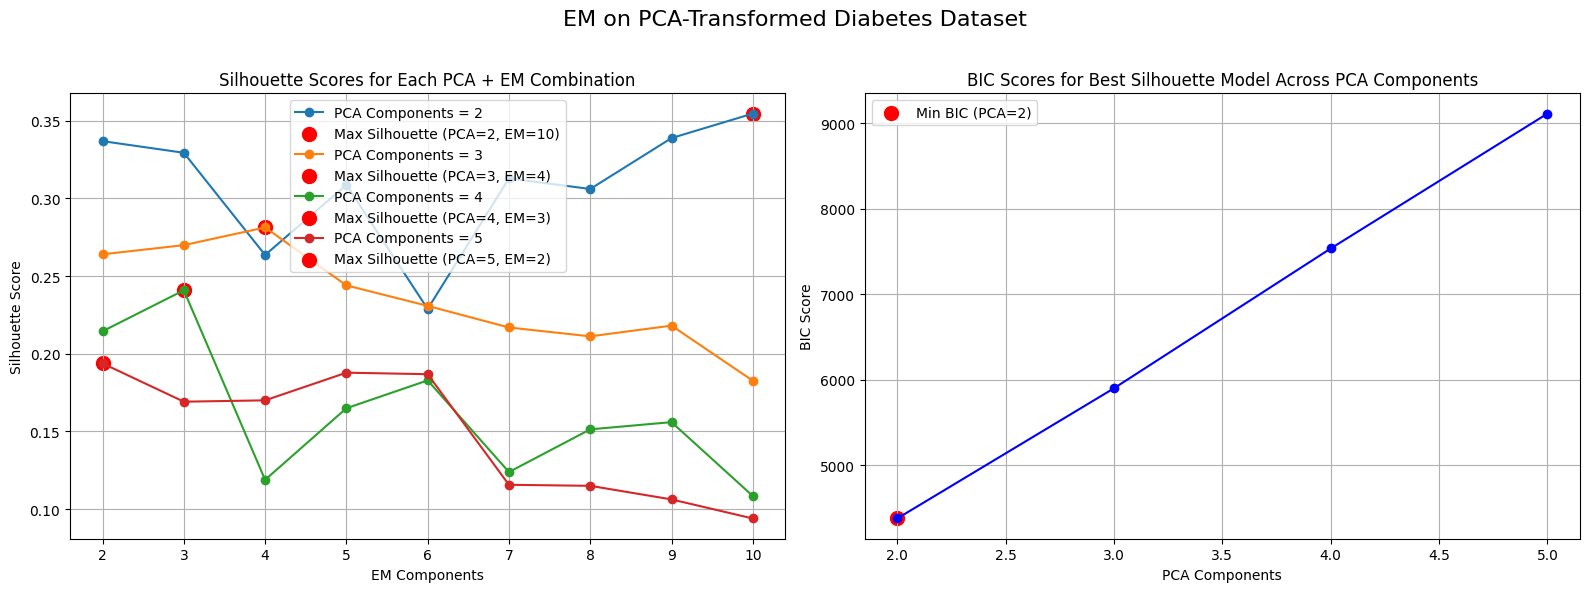


Best model parameters: PCA Components = 2, EM Components = 10

Final model evaluation metrics on training data:
PCA Components: 2, EM Components: 10
BIC Score: 4374.6732
AIC Score: 4113.8935
Silhouette Score: 0.3545
Log-Likelihood: -1997.9468


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of PCA and EM components
pca_components_range = [2, 3, 4, 5]
em_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over PCA components and apply PCA with different EM component numbers
for pca_components in pca_components_range:
    best_silhouette_score = -1
    best_em_components = None
    best_gmm = None

    # Apply PCA transformation
    pca = PCA(n_components=pca_components, random_state=4)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Apply EM on the PCA-transformed data and compute silhouette score
    silhouette_scores = []
    for em_components in em_components_range:
        gmm = GaussianMixture(n_components=em_components, random_state=4)
        gmm.fit(X_train_pca)

        # Predict clusters and calculate silhouette score
        y_train_pred = gmm.predict(X_train_pca)
        sil_score = silhouette_score(X_train_pca, y_train_pred) if em_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this PCA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_em_components = em_components
            best_gmm = gmm

    # Store the best model and scores for this PCA setting
    best_models[pca_components] = {
        "best_gmm": best_gmm,
        "best_em_components": best_em_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_pca": X_train_pca
    }

# Step 3: Plot silhouette scores for each PCA + EM combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("EM on PCA-Transformed Diabetes Dataset", fontsize=16)

for pca_components in pca_components_range:
    silhouette_scores = best_models[pca_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(em_components_range, silhouette_scores, marker='o', label=f"PCA Components = {pca_components}")
    axes[0].scatter(em_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (PCA={pca_components}, EM={em_components_range[best_sil_idx]})")

axes[0].set_xlabel("EM Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each PCA + EM Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across PCA transformations based on BIC and plot results
bic_scores = []
for pca_components, model_details in best_models.items():
    gmm = model_details["best_gmm"]
    X_train_pca = model_details["X_train_pca"]
    bic = gmm.bic(X_train_pca)
    bic_scores.append(bic)

# Highlight minimum BIC
min_bic_idx = np.argmin(bic_scores)
axes[1].plot(pca_components_range, bic_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(pca_components_range[min_bic_idx], bic_scores[min_bic_idx], color='red', marker='o', s=100,
                label=f"Min BIC (PCA={pca_components_range[min_bic_idx]})")

axes[1].set_xlabel("PCA Components")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Scores for Best Silhouette Model Across PCA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on BIC
best_pca_components = pca_components_range[min_bic_idx]
best_em_components = best_models[best_pca_components]["best_em_components"]
best_gmm_final = best_models[best_pca_components]["best_gmm"]
X_train_pca_final = best_models[best_pca_components]["X_train_pca"]

print(f"\nBest model parameters: PCA Components = {best_pca_components}, EM Components = {best_em_components}")

# Step 6: Retrain model using the best PCA and EM components if necessary
# The best_gmm_final model is already fitted on X_train_pca_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
bic_final = best_gmm_final.bic(X_train_pca_final)
aic_final = best_gmm_final.aic(X_train_pca_final)
log_likelihood_final = best_gmm_final.score(X_train_pca_final) * X_train_pca_final.shape[0]  # Total log-likelihood

# Predict clusters and calculate silhouette score for consistency
y_train_pred_final = best_gmm_final.predict(X_train_pca_final)
sil_score_final = silhouette_score(X_train_pca_final, y_train_pred_final)

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"PCA Components: {best_pca_components}, EM Components: {best_em_components}")
print(f"BIC Score: {bic_final:.4f}")
print(f"AIC Score: {aic_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Log-Likelihood: {log_likelihood_final:.4f}")


#### Combination 3: EM applied to diabetes dataset with ICA dim. red.

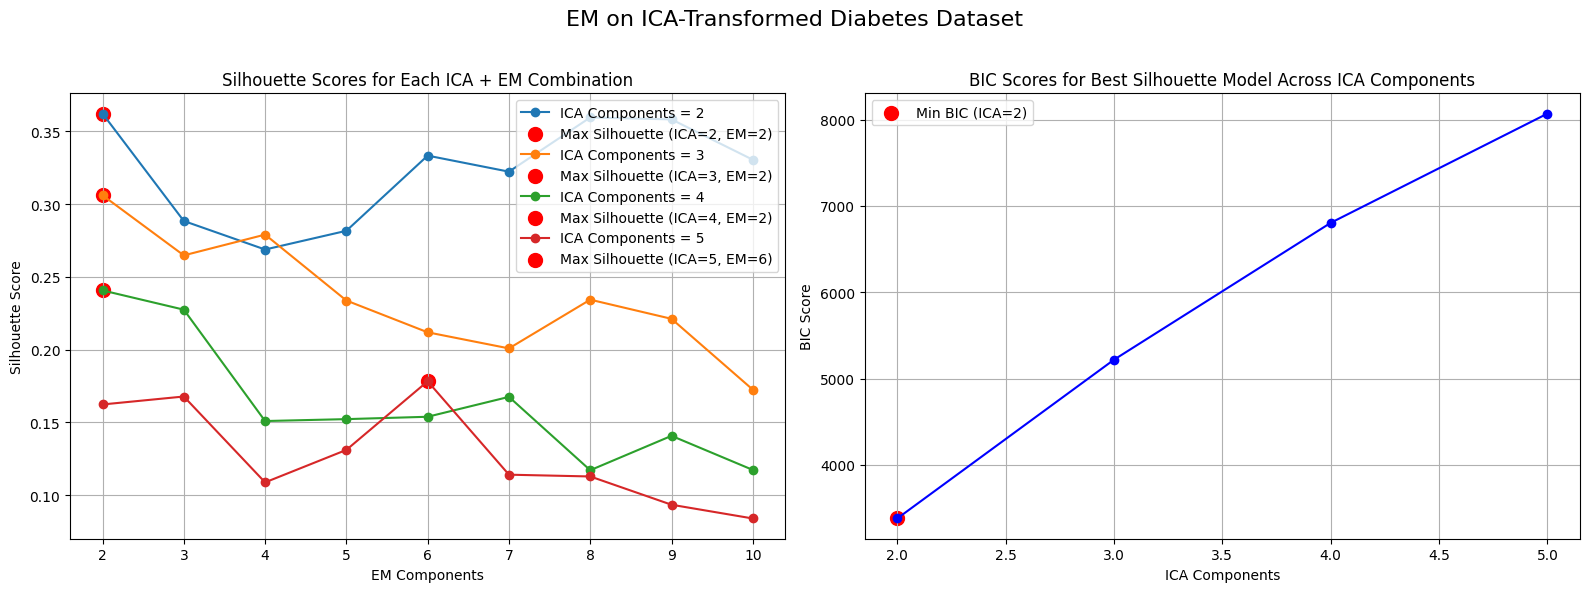


Best model parameters: ICA Components = 2, EM Components = 2

Final model evaluation metrics on training data:
ICA Components: 2, EM Components: 2
BIC Score: 3378.6322
AIC Score: 3330.0123
Silhouette Score: 0.3623
Log-Likelihood: -1654.0061


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of ICA and EM components
ica_components_range = [2, 3, 4, 5]
em_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over ICA components and apply ICA with different EM component numbers
for ica_components in ica_components_range:
    best_silhouette_score = -1
    best_em_components = None
    best_gmm = None

    # Apply ICA transformation
    ica = FastICA(n_components=ica_components, random_state=4)
    X_train_ica = ica.fit_transform(X_train_scaled)

    # Apply EM on the ICA-transformed data and compute silhouette score
    silhouette_scores = []
    for em_components in em_components_range:
        gmm = GaussianMixture(n_components=em_components, random_state=4)
        gmm.fit(X_train_ica)

        # Predict clusters and calculate silhouette score
        y_train_pred = gmm.predict(X_train_ica)
        sil_score = silhouette_score(X_train_ica, y_train_pred) if em_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this ICA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_em_components = em_components
            best_gmm = gmm

    # Store the best model and scores for this ICA setting
    best_models[ica_components] = {
        "best_gmm": best_gmm,
        "best_em_components": best_em_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_ica": X_train_ica
    }

# Step 3: Plot silhouette scores for each ICA + EM combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("EM on ICA-Transformed Diabetes Dataset", fontsize=16)

for ica_components in ica_components_range:
    silhouette_scores = best_models[ica_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(em_components_range, silhouette_scores, marker='o', label=f"ICA Components = {ica_components}")
    axes[0].scatter(em_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (ICA={ica_components}, EM={em_components_range[best_sil_idx]})")

axes[0].set_xlabel("EM Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each ICA + EM Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across ICA transformations based on BIC and plot results
bic_scores = []
for ica_components, model_details in best_models.items():
    gmm = model_details["best_gmm"]
    X_train_ica = model_details["X_train_ica"]
    bic = gmm.bic(X_train_ica)
    bic_scores.append(bic)

# Highlight minimum BIC
min_bic_idx = np.argmin(bic_scores)
axes[1].plot(ica_components_range, bic_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(ica_components_range[min_bic_idx], bic_scores[min_bic_idx], color='red', marker='o', s=100,
                label=f"Min BIC (ICA={ica_components_range[min_bic_idx]})")

axes[1].set_xlabel("ICA Components")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Scores for Best Silhouette Model Across ICA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on BIC
best_ica_components = ica_components_range[min_bic_idx]
best_em_components = best_models[best_ica_components]["best_em_components"]
best_gmm_final = best_models[best_ica_components]["best_gmm"]
X_train_ica_final = best_models[best_ica_components]["X_train_ica"]

print(f"\nBest model parameters: ICA Components = {best_ica_components}, EM Components = {best_em_components}")

# Step 6: Retrain model using the best ICA and EM components if necessary
# The best_gmm_final model is already fitted on X_train_ica_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
bic_final = best_gmm_final.bic(X_train_ica_final)
aic_final = best_gmm_final.aic(X_train_ica_final)
log_likelihood_final = best_gmm_final.score(X_train_ica_final) * X_train_ica_final.shape[0]  # Total log-likelihood

# Predict clusters and calculate silhouette score for consistency
y_train_pred_final = best_gmm_final.predict(X_train_ica_final)
sil_score_final = silhouette_score(X_train_ica_final, y_train_pred_final)

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"ICA Components: {best_ica_components}, EM Components: {best_em_components}")
print(f"BIC Score: {bic_final:.4f}")
print(f"AIC Score: {aic_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Log-Likelihood: {log_likelihood_final:.4f}")


#### Combination 4: K-Means applied to diabetes dataset with RP dim. red.

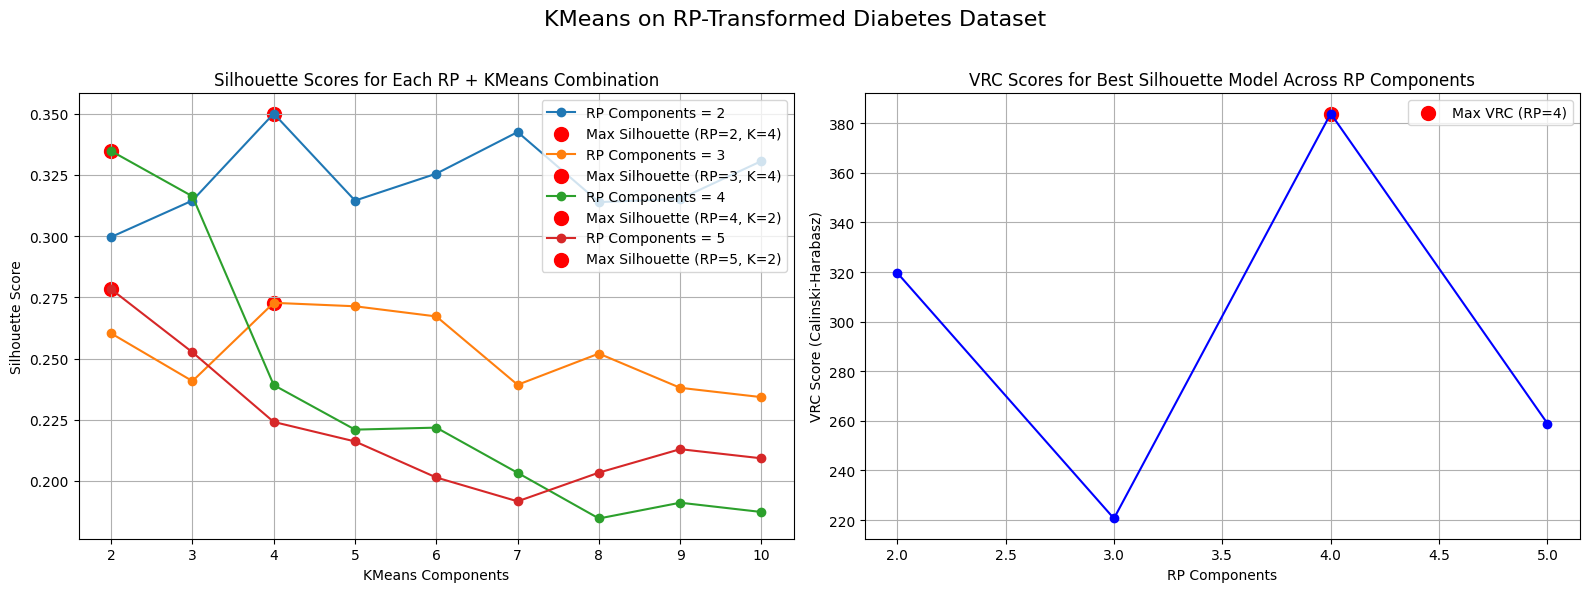


Best model parameters: RP Components = 4, KMeans Components = 2

Final model evaluation metrics on training data:
RP Components: 4, KMeans Components: 2
Inertia: 2486.4024
Silhouette Score: 0.3348
Davies-Bouldin Index: 1.0967
Variance Ratio Criterion (VRC): 383.8833


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of RP and KMeans components
rp_components_range = [2, 3, 4, 5]
kmeans_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over RP components and apply RP with different KMeans component numbers
for rp_components in rp_components_range:
    best_silhouette_score = -1
    best_kmeans_components = None
    best_kmeans_model = None

    # Apply RP transformation
    rp = GaussianRandomProjection(n_components=rp_components, random_state=4)
    X_train_rp = rp.fit_transform(X_train_scaled)

    # Apply KMeans on the RP-transformed data and compute silhouette score
    silhouette_scores = []
    for kmeans_components in kmeans_components_range:
        kmeans = KMeans(n_clusters=kmeans_components, random_state=4)
        kmeans.fit(X_train_rp)

        # Predict clusters and calculate silhouette score
        y_train_pred = kmeans.predict(X_train_rp)
        sil_score = silhouette_score(X_train_rp, y_train_pred) if kmeans_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this RP setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_kmeans_components = kmeans_components
            best_kmeans_model = kmeans

    # Store the best model and scores for this RP setting
    best_models[rp_components] = {
        "best_kmeans_model": best_kmeans_model,
        "best_kmeans_components": best_kmeans_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_rp": X_train_rp
    }

# Step 3: Plot silhouette scores for each RP + KMeans combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("KMeans on RP-Transformed Diabetes Dataset", fontsize=16)

for rp_components in rp_components_range:
    silhouette_scores = best_models[rp_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(kmeans_components_range, silhouette_scores, marker='o', label=f"RP Components = {rp_components}")
    axes[0].scatter(kmeans_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (RP={rp_components}, K={kmeans_components_range[best_sil_idx]})")

axes[0].set_xlabel("KMeans Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each RP + KMeans Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across RP transformations based on VRC and plot results
vrc_scores = []
for rp_components, model_details in best_models.items():
    kmeans = model_details["best_kmeans_model"]
    X_train_rp = model_details["X_train_rp"]
    vrc = calinski_harabasz_score(X_train_rp, kmeans.predict(X_train_rp))  # Use VRC (Calinski-Harabasz Index)
    vrc_scores.append(vrc)

# Highlight maximum VRC
max_vrc_idx = np.argmax(vrc_scores)
axes[1].plot(rp_components_range, vrc_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(rp_components_range[max_vrc_idx], vrc_scores[max_vrc_idx], color='red', marker='o', s=100,
                label=f"Max VRC (RP={rp_components_range[max_vrc_idx]})")

axes[1].set_xlabel("RP Components")
axes[1].set_ylabel("VRC Score (Calinski-Harabasz)")
axes[1].set_title("VRC Scores for Best Silhouette Model Across RP Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on VRC
best_rp_components = rp_components_range[max_vrc_idx]
best_kmeans_components = best_models[best_rp_components]["best_kmeans_components"]
best_kmeans_final = best_models[best_rp_components]["best_kmeans_model"]
X_train_rp_final = best_models[best_rp_components]["X_train_rp"]

print(f"\nBest model parameters: RP Components = {best_rp_components}, KMeans Components = {best_kmeans_components}")

# Step 6: Retrain model using the best RP and KMeans components if necessary
# The best_kmeans_final model is already fitted on X_train_rp_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
inertia_final = best_kmeans_final.inertia_
y_train_pred_final = best_kmeans_final.predict(X_train_rp_final)
sil_score_final = silhouette_score(X_train_rp_final, y_train_pred_final)
davies_bouldin_final = davies_bouldin_score(X_train_rp_final, y_train_pred_final)
vrc_final = calinski_harabasz_score(X_train_rp_final, y_train_pred_final)  # Final VRC score

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"RP Components: {best_rp_components}, KMeans Components: {best_kmeans_components}")
print(f"Inertia: {inertia_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_final:.4f}")
print(f"Variance Ratio Criterion (VRC): {vrc_final:.4f}")


#### Combination 5: K-Means applied to diabetes dataset with PCA dim. red.

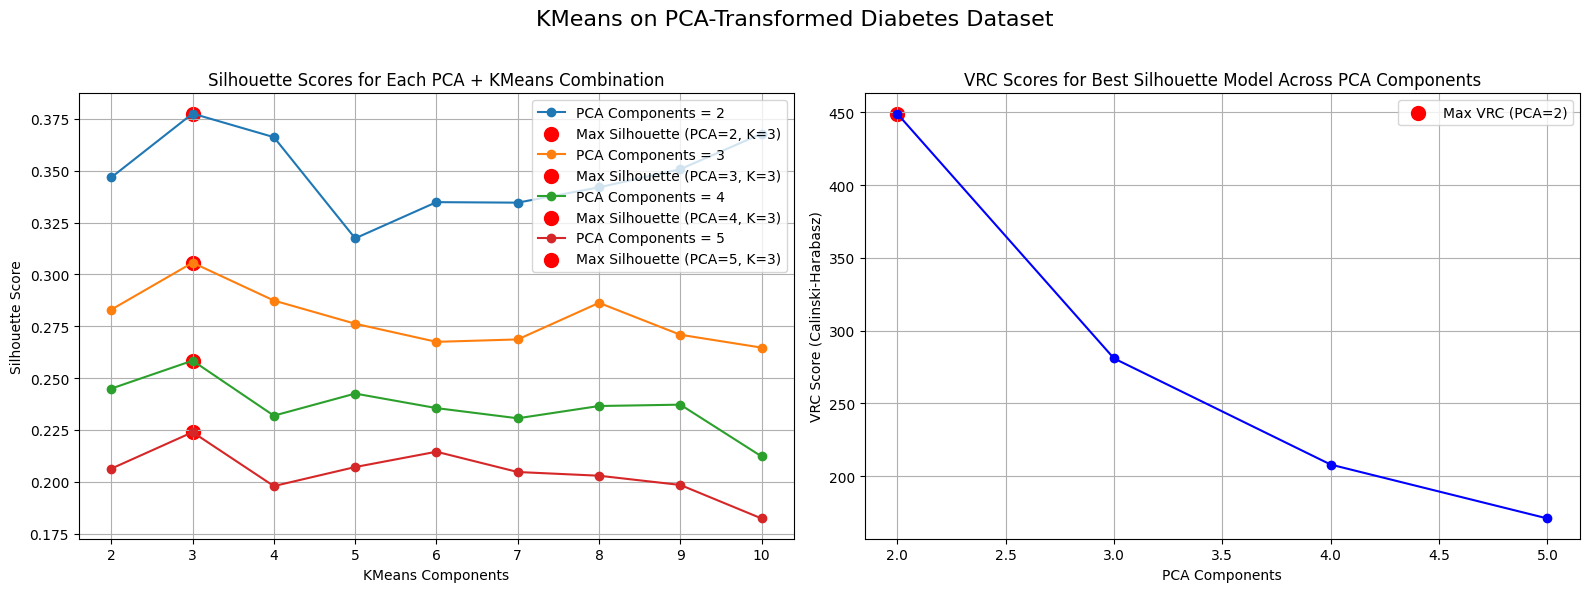


Best model parameters: PCA Components = 2, KMeans Components = 3

Final model evaluation metrics on training data:
PCA Components: 2, KMeans Components: 3
Inertia: 955.8108
Silhouette Score: 0.3776
Davies-Bouldin Index: 0.8658
Variance Ratio Criterion (VRC): 449.1250


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of PCA and KMeans components
pca_components_range = [2, 3, 4, 5]
kmeans_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over PCA components and apply PCA with different KMeans component numbers
for pca_components in pca_components_range:
    best_silhouette_score = -1
    best_kmeans_components = None
    best_kmeans_model = None

    # Apply PCA transformation
    pca = PCA(n_components=pca_components, random_state=4)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Apply KMeans on the PCA-transformed data and compute silhouette score
    silhouette_scores = []
    for kmeans_components in kmeans_components_range:
        kmeans = KMeans(n_clusters=kmeans_components, random_state=4)
        kmeans.fit(X_train_pca)

        # Predict clusters and calculate silhouette score
        y_train_pred = kmeans.predict(X_train_pca)
        sil_score = silhouette_score(X_train_pca, y_train_pred) if kmeans_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this PCA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_kmeans_components = kmeans_components
            best_kmeans_model = kmeans

    # Store the best model and scores for this PCA setting
    best_models[pca_components] = {
        "best_kmeans_model": best_kmeans_model,
        "best_kmeans_components": best_kmeans_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_pca": X_train_pca
    }

# Step 3: Plot silhouette scores for each PCA + KMeans combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("KMeans on PCA-Transformed Diabetes Dataset", fontsize=16)

for pca_components in pca_components_range:
    silhouette_scores = best_models[pca_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(kmeans_components_range, silhouette_scores, marker='o', label=f"PCA Components = {pca_components}")
    axes[0].scatter(kmeans_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (PCA={pca_components}, K={kmeans_components_range[best_sil_idx]})")

axes[0].set_xlabel("KMeans Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each PCA + KMeans Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across PCA transformations based on VRC and plot results
vrc_scores = []
for pca_components, model_details in best_models.items():
    kmeans = model_details["best_kmeans_model"]
    X_train_pca = model_details["X_train_pca"]
    vrc = calinski_harabasz_score(X_train_pca, kmeans.predict(X_train_pca))  # Use VRC (Calinski-Harabasz Index)
    vrc_scores.append(vrc)

# Highlight maximum VRC
max_vrc_idx = np.argmax(vrc_scores)
axes[1].plot(pca_components_range, vrc_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(pca_components_range[max_vrc_idx], vrc_scores[max_vrc_idx], color='red', marker='o', s=100,
                label=f"Max VRC (PCA={pca_components_range[max_vrc_idx]})")

axes[1].set_xlabel("PCA Components")
axes[1].set_ylabel("VRC Score (Calinski-Harabasz)")
axes[1].set_title("VRC Scores for Best Silhouette Model Across PCA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on VRC
best_pca_components = pca_components_range[max_vrc_idx]
best_kmeans_components = best_models[best_pca_components]["best_kmeans_components"]
best_kmeans_final = best_models[best_pca_components]["best_kmeans_model"]
X_train_pca_final = best_models[best_pca_components]["X_train_pca"]

print(f"\nBest model parameters: PCA Components = {best_pca_components}, KMeans Components = {best_kmeans_components}")

# Step 6: Retrain model using the best PCA and KMeans components if necessary
# The best_kmeans_final model is already fitted on X_train_pca_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
inertia_final = best_kmeans_final.inertia_
y_train_pred_final = best_kmeans_final.predict(X_train_pca_final)
sil_score_final = silhouette_score(X_train_pca_final, y_train_pred_final)
davies_bouldin_final = davies_bouldin_score(X_train_pca_final, y_train_pred_final)
vrc_final = calinski_harabasz_score(X_train_pca_final, y_train_pred_final)  # Final VRC score

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"PCA Components: {best_pca_components}, KMeans Components: {best_kmeans_components}")
print(f"Inertia: {inertia_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_final:.4f}")
print(f"Variance Ratio Criterion (VRC): {vrc_final:.4f}")


#### Combination 6: K-Means applied to diabetes dataset with ICA dim. red.

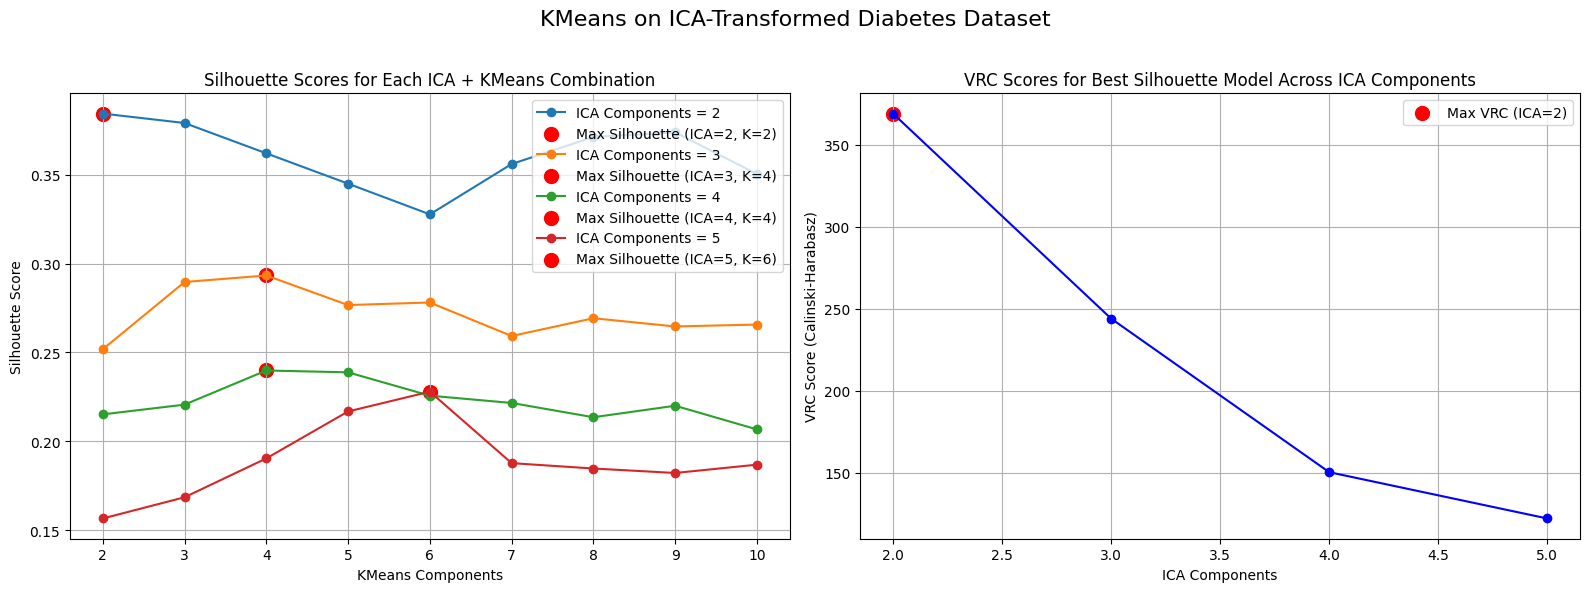


Best model parameters: ICA Components = 2, KMeans Components = 2

Final model evaluation metrics on training data:
ICA Components: 2, KMeans Components: 2
Inertia: 766.1238
Silhouette Score: 0.3844
Davies-Bouldin Index: 1.0668
Variance Ratio Criterion (VRC): 368.9590


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Load and split the diabetes dataset
X = diabetes.features  # Features from the diabetes dataset
y = diabetes.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of ICA and KMeans components
ica_components_range = [2, 3, 4, 5]
kmeans_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over ICA components and apply ICA with different KMeans component numbers
for ica_components in ica_components_range:
    best_silhouette_score = -1
    best_kmeans_components = None
    best_kmeans_model = None

    # Apply ICA transformation
    ica = FastICA(n_components=ica_components, random_state=4)
    X_train_ica = ica.fit_transform(X_train_scaled)

    # Apply KMeans on the ICA-transformed data and compute silhouette score
    silhouette_scores = []
    for kmeans_components in kmeans_components_range:
        kmeans = KMeans(n_clusters=kmeans_components, random_state=4)
        kmeans.fit(X_train_ica)

        # Predict clusters and calculate silhouette score
        y_train_pred = kmeans.predict(X_train_ica)
        sil_score = silhouette_score(X_train_ica, y_train_pred) if kmeans_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this ICA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_kmeans_components = kmeans_components
            best_kmeans_model = kmeans

    # Store the best model and scores for this ICA setting
    best_models[ica_components] = {
        "best_kmeans_model": best_kmeans_model,
        "best_kmeans_components": best_kmeans_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_ica": X_train_ica
    }

# Step 3: Plot silhouette scores for each ICA + KMeans combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("KMeans on ICA-Transformed Diabetes Dataset", fontsize=16)

for ica_components in ica_components_range:
    silhouette_scores = best_models[ica_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(kmeans_components_range, silhouette_scores, marker='o', label=f"ICA Components = {ica_components}")
    axes[0].scatter(kmeans_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (ICA={ica_components}, K={kmeans_components_range[best_sil_idx]})")

axes[0].set_xlabel("KMeans Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each ICA + KMeans Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across ICA transformations based on VRC and plot results
vrc_scores = []
for ica_components, model_details in best_models.items():
    kmeans = model_details["best_kmeans_model"]
    X_train_ica = model_details["X_train_ica"]
    vrc = calinski_harabasz_score(X_train_ica, kmeans.predict(X_train_ica))  # Use VRC (Calinski-Harabasz Index)
    vrc_scores.append(vrc)

# Highlight maximum VRC
max_vrc_idx = np.argmax(vrc_scores)
axes[1].plot(ica_components_range, vrc_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(ica_components_range[max_vrc_idx], vrc_scores[max_vrc_idx], color='red', marker='o', s=100,
                label=f"Max VRC (ICA={ica_components_range[max_vrc_idx]})")

axes[1].set_xlabel("ICA Components")
axes[1].set_ylabel("VRC Score (Calinski-Harabasz)")
axes[1].set_title("VRC Scores for Best Silhouette Model Across ICA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on VRC
best_ica_components = ica_components_range[max_vrc_idx]
best_kmeans_components = best_models[best_ica_components]["best_kmeans_components"]
best_kmeans_final = best_models[best_ica_components]["best_kmeans_model"]
X_train_ica_final = best_models[best_ica_components]["X_train_ica"]

print(f"\nBest model parameters: ICA Components = {best_ica_components}, KMeans Components = {best_kmeans_components}")

# Step 6: Retrain model using the best ICA and KMeans components if necessary
# The best_kmeans_final model is already fitted on X_train_ica_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
inertia_final = best_kmeans_final.inertia_
y_train_pred_final = best_kmeans_final.predict(X_train_ica_final)
sil_score_final = silhouette_score(X_train_ica_final, y_train_pred_final)
davies_bouldin_final = davies_bouldin_score(X_train_ica_final, y_train_pred_final)
vrc_final = calinski_harabasz_score(X_train_ica_final, y_train_pred_final)  # Final VRC score

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"ICA Components: {best_ica_components}, KMeans Components: {best_kmeans_components}")
print(f"Inertia: {inertia_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_final:.4f}")
print(f"Variance Ratio Criterion (VRC): {vrc_final:.4f}")


#### Combination 7: EM applied to concrete dataset with RP dim. red.

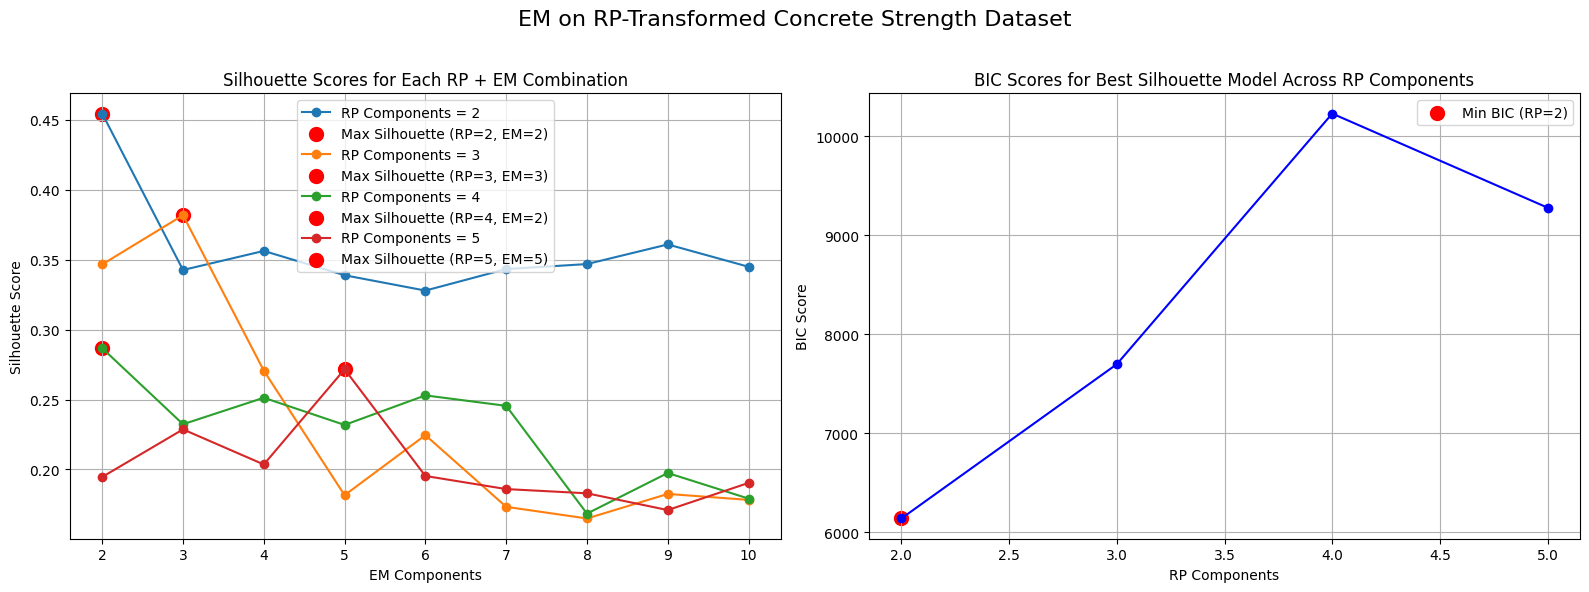


Best model parameters: RP Components = 2, EM Components = 2

Final model evaluation metrics on training data:
RP Components: 2, EM Components: 2
BIC Score: 6136.9250
AIC Score: 6085.0691
Silhouette Score: 0.4545
Log-Likelihood: -3031.5346


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load and split the concrete strength dataset
X = concrete.features  # Features from the concrete strength dataset
y = concrete.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of RP and EM components
rp_components_range = [2, 3, 4, 5]
em_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over RP components and apply RP with different EM component numbers
for rp_components in rp_components_range:
    best_silhouette_score = -1
    best_em_components = None
    best_gmm = None

    # Apply RP transformation
    rp = GaussianRandomProjection(n_components=rp_components, random_state=4)
    X_train_rp = rp.fit_transform(X_train_scaled)

    # Apply EM on the RP-transformed data and compute silhouette score
    silhouette_scores = []
    for em_components in em_components_range:
        gmm = GaussianMixture(n_components=em_components, random_state=4)
        gmm.fit(X_train_rp)

        # Predict clusters and calculate silhouette score
        y_train_pred = gmm.predict(X_train_rp)
        sil_score = silhouette_score(X_train_rp, y_train_pred) if em_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this RP setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_em_components = em_components
            best_gmm = gmm

    # Store the best model and scores for this RP setting
    best_models[rp_components] = {
        "best_gmm": best_gmm,
        "best_em_components": best_em_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_rp": X_train_rp
    }

# Step 3: Plot silhouette scores for each RP + EM combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("EM on RP-Transformed Concrete Strength Dataset", fontsize=16)

for rp_components in rp_components_range:
    silhouette_scores = best_models[rp_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(em_components_range, silhouette_scores, marker='o', label=f"RP Components = {rp_components}")
    axes[0].scatter(em_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (RP={rp_components}, EM={em_components_range[best_sil_idx]})")

axes[0].set_xlabel("EM Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each RP + EM Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across RP transformations based on BIC and plot results
bic_scores = []
for rp_components, model_details in best_models.items():
    gmm = model_details["best_gmm"]
    X_train_rp = model_details["X_train_rp"]
    bic = gmm.bic(X_train_rp)
    bic_scores.append(bic)

# Highlight minimum BIC
min_bic_idx = np.argmin(bic_scores)
axes[1].plot(rp_components_range, bic_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(rp_components_range[min_bic_idx], bic_scores[min_bic_idx], color='red', marker='o', s=100,
                label=f"Min BIC (RP={rp_components_range[min_bic_idx]})")

axes[1].set_xlabel("RP Components")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Scores for Best Silhouette Model Across RP Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on BIC
best_rp_components = rp_components_range[min_bic_idx]
best_em_components = best_models[best_rp_components]["best_em_components"]
best_gmm_final = best_models[best_rp_components]["best_gmm"]
X_train_rp_final = best_models[best_rp_components]["X_train_rp"]

print(f"\nBest model parameters: RP Components = {best_rp_components}, EM Components = {best_em_components}")

# Step 6: Retrain model using the best RP and EM components if necessary
# The best_gmm_final model is already fitted on X_train_rp_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
bic_final = best_gmm_final.bic(X_train_rp_final)
aic_final = best_gmm_final.aic(X_train_rp_final)
log_likelihood_final = best_gmm_final.score(X_train_rp_final) * X_train_rp_final.shape[0]  # Total log-likelihood

# Predict clusters and calculate silhouette score for consistency
y_train_pred_final = best_gmm_final.predict(X_train_rp_final)
sil_score_final = silhouette_score(X_train_rp_final, y_train_pred_final)

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"RP Components: {best_rp_components}, EM Components: {best_em_components}")
print(f"BIC Score: {bic_final:.4f}")
print(f"AIC Score: {aic_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Log-Likelihood: {log_likelihood_final:.4f}")


#### Combination 8: EM applied to concrete dataset with PCA dim. red.

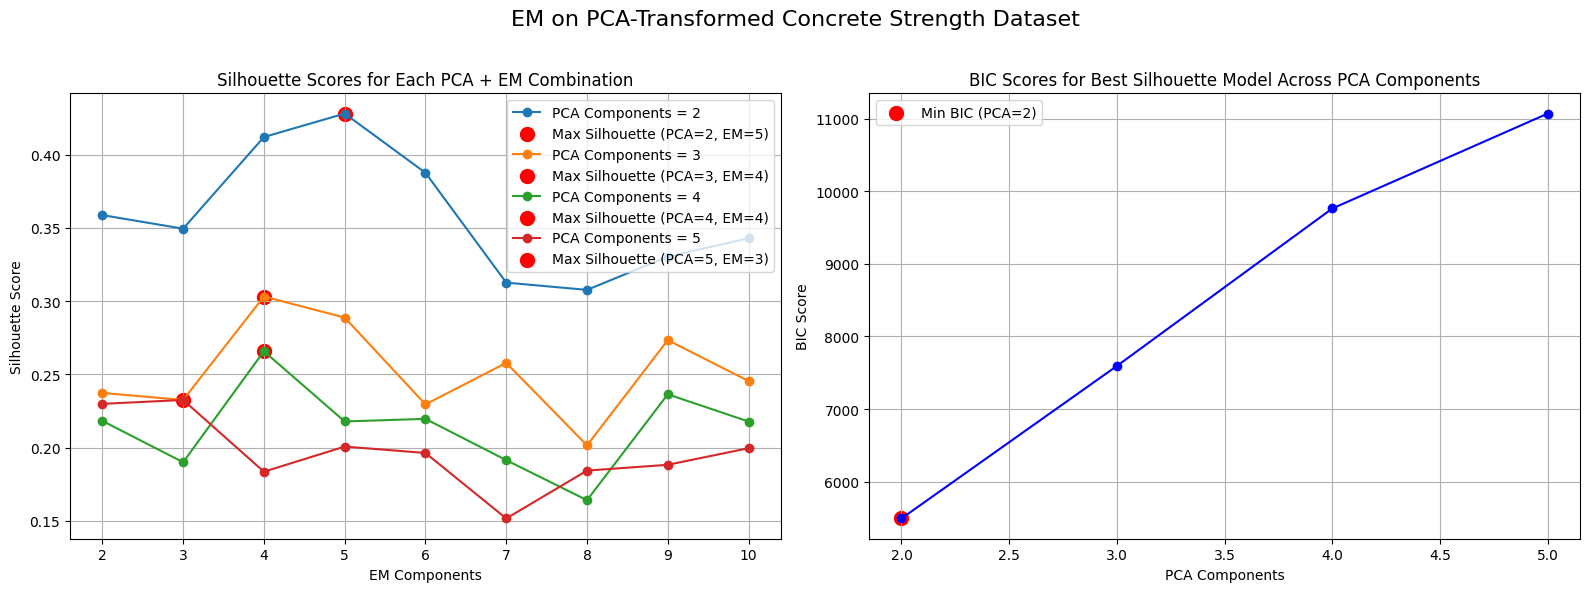


Best model parameters: PCA Components = 2, EM Components = 5

Final model evaluation metrics on training data:
PCA Components: 2, EM Components: 5
BIC Score: 5494.6455
AIC Score: 5357.9346
Silhouette Score: 0.4281
Log-Likelihood: -2649.9673


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load and split the concrete strength dataset
X = concrete.features  # Features from the concrete strength dataset
y = concrete.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of PCA and EM components
pca_components_range = [2, 3, 4, 5]
em_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over PCA components and apply PCA with different EM component numbers
for pca_components in pca_components_range:
    best_silhouette_score = -1
    best_em_components = None
    best_gmm = None

    # Apply PCA transformation
    pca = PCA(n_components=pca_components, random_state=4)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Apply EM on the PCA-transformed data and compute silhouette score
    silhouette_scores = []
    for em_components in em_components_range:
        gmm = GaussianMixture(n_components=em_components, random_state=4)
        gmm.fit(X_train_pca)

        # Predict clusters and calculate silhouette score
        y_train_pred = gmm.predict(X_train_pca)
        sil_score = silhouette_score(X_train_pca, y_train_pred) if em_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this PCA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_em_components = em_components
            best_gmm = gmm

    # Store the best model and scores for this PCA setting
    best_models[pca_components] = {
        "best_gmm": best_gmm,
        "best_em_components": best_em_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_pca": X_train_pca
    }

# Step 3: Plot silhouette scores for each PCA + EM combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("EM on PCA-Transformed Concrete Strength Dataset", fontsize=16)

for pca_components in pca_components_range:
    silhouette_scores = best_models[pca_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(em_components_range, silhouette_scores, marker='o', label=f"PCA Components = {pca_components}")
    axes[0].scatter(em_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (PCA={pca_components}, EM={em_components_range[best_sil_idx]})")

axes[0].set_xlabel("EM Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each PCA + EM Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across PCA transformations based on BIC and plot results
bic_scores = []
for pca_components, model_details in best_models.items():
    gmm = model_details["best_gmm"]
    X_train_pca = model_details["X_train_pca"]
    bic = gmm.bic(X_train_pca)
    bic_scores.append(bic)

# Highlight minimum BIC
min_bic_idx = np.argmin(bic_scores)
axes[1].plot(pca_components_range, bic_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(pca_components_range[min_bic_idx], bic_scores[min_bic_idx], color='red', marker='o', s=100,
                label=f"Min BIC (PCA={pca_components_range[min_bic_idx]})")

axes[1].set_xlabel("PCA Components")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Scores for Best Silhouette Model Across PCA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on BIC
best_pca_components = pca_components_range[min_bic_idx]
best_em_components = best_models[best_pca_components]["best_em_components"]
best_gmm_final = best_models[best_pca_components]["best_gmm"]
X_train_pca_final = best_models[best_pca_components]["X_train_pca"]

print(f"\nBest model parameters: PCA Components = {best_pca_components}, EM Components = {best_em_components}")

# Step 6: Retrain model using the best PCA and EM components if necessary
# The best_gmm_final model is already fitted on X_train_pca_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
bic_final = best_gmm_final.bic(X_train_pca_final)
aic_final = best_gmm_final.aic(X_train_pca_final)
log_likelihood_final = best_gmm_final.score(X_train_pca_final) * X_train_pca_final.shape[0]  # Total log-likelihood

# Predict clusters and calculate silhouette score for consistency
y_train_pred_final = best_gmm_final.predict(X_train_pca_final)
sil_score_final = silhouette_score(X_train_pca_final, y_train_pred_final)

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"PCA Components: {best_pca_components}, EM Components: {best_em_components}")
print(f"BIC Score: {bic_final:.4f}")
print(f"AIC Score: {aic_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Log-Likelihood: {log_likelihood_final:.4f}")


#### Combination 9: EM applied to concrete dataset with ICA dim. red.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


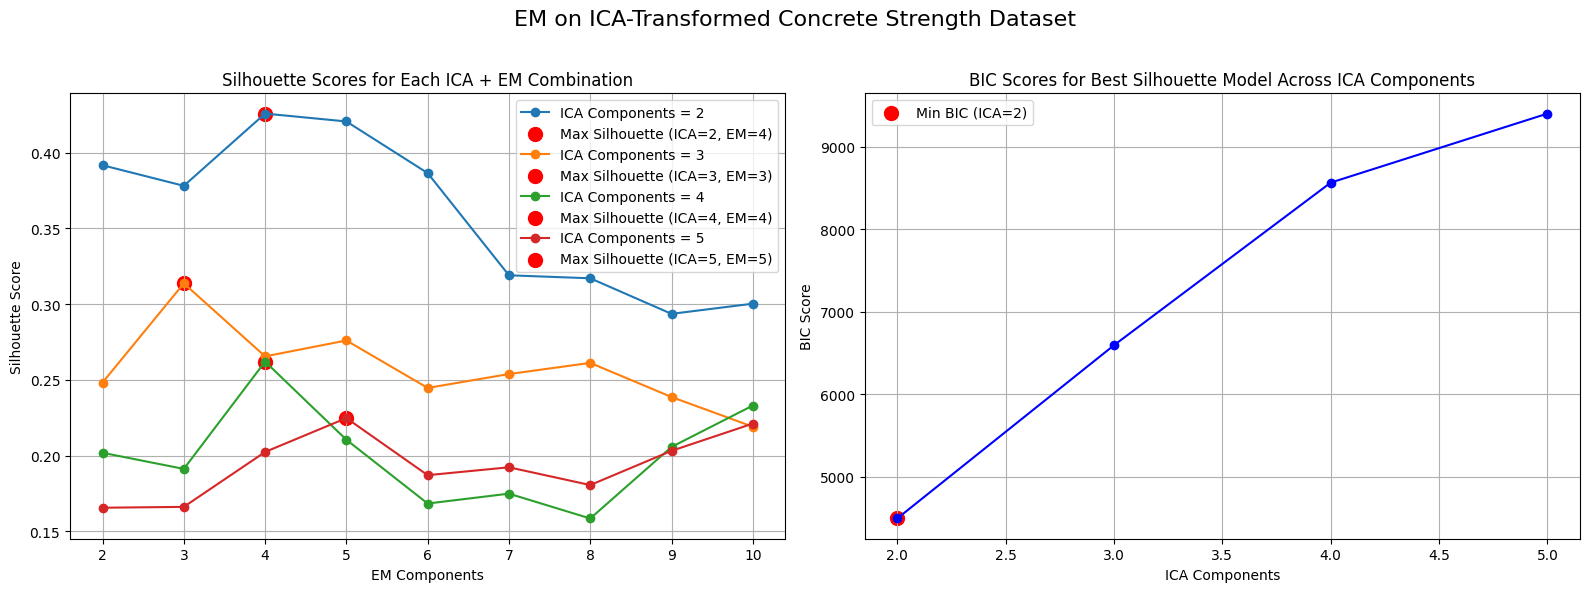


Best model parameters: ICA Components = 2, EM Components = 4

Final model evaluation metrics on training data:
ICA Components: 2, EM Components: 4
BIC Score: 4494.1930
AIC Score: 4385.7670
Silhouette Score: 0.4258
Log-Likelihood: -2169.8835


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Load and split the concrete strength dataset
X = concrete.features  # Features from the concrete strength dataset
y = concrete.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of ICA and EM components
ica_components_range = [2, 3, 4, 5]
em_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over ICA components and apply ICA with different EM component numbers
for ica_components in ica_components_range:
    best_silhouette_score = -1
    best_em_components = None
    best_gmm = None

    # Apply ICA transformation
    ica = FastICA(n_components=ica_components, random_state=4)
    X_train_ica = ica.fit_transform(X_train_scaled)

    # Apply EM on the ICA-transformed data and compute silhouette score
    silhouette_scores = []
    for em_components in em_components_range:
        gmm = GaussianMixture(n_components=em_components, random_state=4)
        gmm.fit(X_train_ica)

        # Predict clusters and calculate silhouette score
        y_train_pred = gmm.predict(X_train_ica)
        sil_score = silhouette_score(X_train_ica, y_train_pred) if em_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this ICA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_em_components = em_components
            best_gmm = gmm

    # Store the best model and scores for this ICA setting
    best_models[ica_components] = {
        "best_gmm": best_gmm,
        "best_em_components": best_em_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_ica": X_train_ica
    }

# Step 3: Plot silhouette scores for each ICA + EM combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("EM on ICA-Transformed Concrete Strength Dataset", fontsize=16)

for ica_components in ica_components_range:
    silhouette_scores = best_models[ica_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(em_components_range, silhouette_scores, marker='o', label=f"ICA Components = {ica_components}")
    axes[0].scatter(em_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (ICA={ica_components}, EM={em_components_range[best_sil_idx]})")

axes[0].set_xlabel("EM Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each ICA + EM Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across ICA transformations based on BIC and plot results
bic_scores = []
for ica_components, model_details in best_models.items():
    gmm = model_details["best_gmm"]
    X_train_ica = model_details["X_train_ica"]
    bic = gmm.bic(X_train_ica)
    bic_scores.append(bic)

# Highlight minimum BIC
min_bic_idx = np.argmin(bic_scores)
axes[1].plot(ica_components_range, bic_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(ica_components_range[min_bic_idx], bic_scores[min_bic_idx], color='red', marker='o', s=100,
                label=f"Min BIC (ICA={ica_components_range[min_bic_idx]})")

axes[1].set_xlabel("ICA Components")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Scores for Best Silhouette Model Across ICA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on BIC
best_ica_components = ica_components_range[min_bic_idx]
best_em_components = best_models[best_ica_components]["best_em_components"]
best_gmm_final = best_models[best_ica_components]["best_gmm"]
X_train_ica_final = best_models[best_ica_components]["X_train_ica"]

print(f"\nBest model parameters: ICA Components = {best_ica_components}, EM Components = {best_em_components}")

# Step 6: Retrain model using the best ICA and EM components if necessary
# The best_gmm_final model is already fitted on X_train_ica_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
bic_final = best_gmm_final.bic(X_train_ica_final)
aic_final = best_gmm_final.aic(X_train_ica_final)
log_likelihood_final = best_gmm_final.score(X_train_ica_final) * X_train_ica_final.shape[0]  # Total log-likelihood

# Predict clusters and calculate silhouette score for consistency
y_train_pred_final = best_gmm_final.predict(X_train_ica_final)
sil_score_final = silhouette_score(X_train_ica_final, y_train_pred_final)

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"ICA Components: {best_ica_components}, EM Components: {best_em_components}")
print(f"BIC Score: {bic_final:.4f}")
print(f"AIC Score: {aic_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Log-Likelihood: {log_likelihood_final:.4f}")


#### Combination 10: K-Means applied to concrete dataset with RP dim. red.

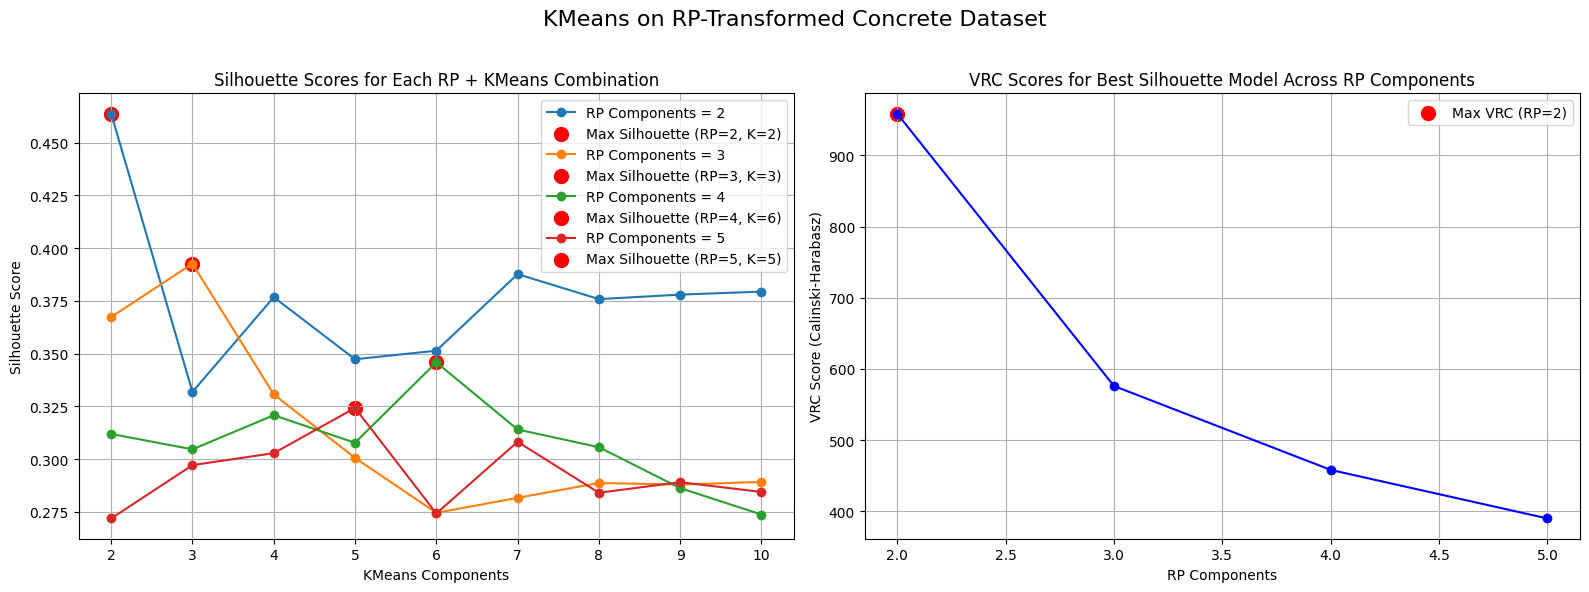


Best model parameters: RP Components = 2, KMeans Components = 2

Final model evaluation metrics on training data:
RP Components: 2, KMeans Components: 2
Inertia: 2270.7987
Silhouette Score: 0.4637
Davies-Bouldin Index: 0.8084
Variance Ratio Criterion (VRC): 958.7060


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Load and split the concrete dataset
X = concrete.features  # Features from the concrete dataset
y = concrete.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of RP and KMeans components
rp_components_range = [2, 3, 4, 5]
kmeans_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over RP components and apply RP with different KMeans component numbers
for rp_components in rp_components_range:
    best_silhouette_score = -1
    best_kmeans_components = None
    best_kmeans_model = None

    # Apply RP transformation
    rp = GaussianRandomProjection(n_components=rp_components, random_state=4)
    X_train_rp = rp.fit_transform(X_train_scaled)

    # Apply KMeans on the RP-transformed data and compute silhouette score
    silhouette_scores = []
    for kmeans_components in kmeans_components_range:
        kmeans = KMeans(n_clusters=kmeans_components, random_state=4)
        kmeans.fit(X_train_rp)

        # Predict clusters and calculate silhouette score
        y_train_pred = kmeans.predict(X_train_rp)
        sil_score = silhouette_score(X_train_rp, y_train_pred) if kmeans_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this RP setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_kmeans_components = kmeans_components
            best_kmeans_model = kmeans

    # Store the best model and scores for this RP setting
    best_models[rp_components] = {
        "best_kmeans_model": best_kmeans_model,
        "best_kmeans_components": best_kmeans_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_rp": X_train_rp
    }

# Step 3: Plot silhouette scores for each RP + KMeans combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("KMeans on RP-Transformed Concrete Dataset", fontsize=16)

for rp_components in rp_components_range:
    silhouette_scores = best_models[rp_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(kmeans_components_range, silhouette_scores, marker='o', label=f"RP Components = {rp_components}")
    axes[0].scatter(kmeans_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (RP={rp_components}, K={kmeans_components_range[best_sil_idx]})")

axes[0].set_xlabel("KMeans Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each RP + KMeans Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across RP transformations based on VRC and plot results
vrc_scores = []
for rp_components, model_details in best_models.items():
    kmeans = model_details["best_kmeans_model"]
    X_train_rp = model_details["X_train_rp"]
    vrc = calinski_harabasz_score(X_train_rp, kmeans.predict(X_train_rp))  # Use VRC (Calinski-Harabasz Index)
    vrc_scores.append(vrc)

# Highlight maximum VRC
max_vrc_idx = np.argmax(vrc_scores)
axes[1].plot(rp_components_range, vrc_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(rp_components_range[max_vrc_idx], vrc_scores[max_vrc_idx], color='red', marker='o', s=100,
                label=f"Max VRC (RP={rp_components_range[max_vrc_idx]})")

axes[1].set_xlabel("RP Components")
axes[1].set_ylabel("VRC Score (Calinski-Harabasz)")
axes[1].set_title("VRC Scores for Best Silhouette Model Across RP Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on VRC
best_rp_components = rp_components_range[max_vrc_idx]
best_kmeans_components = best_models[best_rp_components]["best_kmeans_components"]
best_kmeans_final = best_models[best_rp_components]["best_kmeans_model"]
X_train_rp_final = best_models[best_rp_components]["X_train_rp"]

print(f"\nBest model parameters: RP Components = {best_rp_components}, KMeans Components = {best_kmeans_components}")

# Step 6: Retrain model using the best RP and KMeans components if necessary
# The best_kmeans_final model is already fitted on X_train_rp_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
inertia_final = best_kmeans_final.inertia_
y_train_pred_final = best_kmeans_final.predict(X_train_rp_final)
sil_score_final = silhouette_score(X_train_rp_final, y_train_pred_final)
davies_bouldin_final = davies_bouldin_score(X_train_rp_final, y_train_pred_final)
vrc_final = calinski_harabasz_score(X_train_rp_final, y_train_pred_final)  # Final VRC score

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"RP Components: {best_rp_components}, KMeans Components: {best_kmeans_components}")
print(f"Inertia: {inertia_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_final:.4f}")
print(f"Variance Ratio Criterion (VRC): {vrc_final:.4f}")


#### Combination 11: K-Means applied to concrete dataset with PCA dim. red.

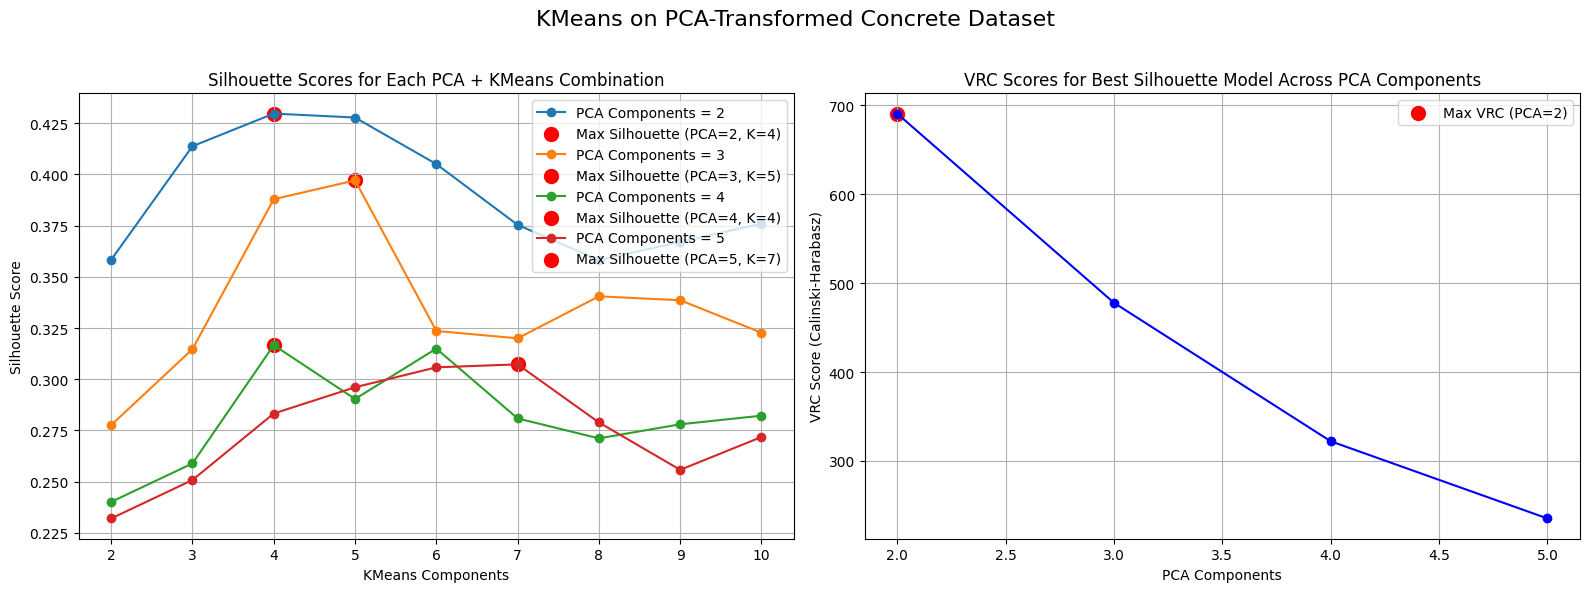


Best model parameters: PCA Components = 2, KMeans Components = 4

Final model evaluation metrics on training data:
PCA Components: 2, KMeans Components: 4
Inertia: 873.5726
Silhouette Score: 0.4297
Davies-Bouldin Index: 0.8100
Variance Ratio Criterion (VRC): 690.6338


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Load the concrete dataset
X = concrete.features  # Features from the concrete dataset
y = concrete.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of PCA and KMeans components
pca_components_range = [2, 3, 4, 5]
kmeans_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over PCA components and apply PCA with different KMeans component numbers
for pca_components in pca_components_range:
    best_silhouette_score = -1
    best_kmeans_components = None
    best_kmeans_model = None

    # Apply PCA transformation
    pca = PCA(n_components=pca_components, random_state=4)
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Apply KMeans on the PCA-transformed data and compute silhouette score
    silhouette_scores = []
    for kmeans_components in kmeans_components_range:
        kmeans = KMeans(n_clusters=kmeans_components, random_state=4)
        kmeans.fit(X_train_pca)

        # Predict clusters and calculate silhouette score
        y_train_pred = kmeans.predict(X_train_pca)
        sil_score = silhouette_score(X_train_pca, y_train_pred) if kmeans_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this PCA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_kmeans_components = kmeans_components
            best_kmeans_model = kmeans

    # Store the best model and scores for this PCA setting
    best_models[pca_components] = {
        "best_kmeans_model": best_kmeans_model,
        "best_kmeans_components": best_kmeans_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_pca": X_train_pca
    }

# Step 3: Plot silhouette scores for each PCA + KMeans combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("KMeans on PCA-Transformed Concrete Dataset", fontsize=16)

for pca_components in pca_components_range:
    silhouette_scores = best_models[pca_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(kmeans_components_range, silhouette_scores, marker='o', label=f"PCA Components = {pca_components}")
    axes[0].scatter(kmeans_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (PCA={pca_components}, K={kmeans_components_range[best_sil_idx]})")

axes[0].set_xlabel("KMeans Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each PCA + KMeans Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across PCA transformations based on VRC and plot results
vrc_scores = []
for pca_components, model_details in best_models.items():
    kmeans = model_details["best_kmeans_model"]
    X_train_pca = model_details["X_train_pca"]
    vrc = calinski_harabasz_score(X_train_pca, kmeans.predict(X_train_pca))  # Use VRC (Calinski-Harabasz Index)
    vrc_scores.append(vrc)

# Highlight maximum VRC
max_vrc_idx = np.argmax(vrc_scores)
axes[1].plot(pca_components_range, vrc_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(pca_components_range[max_vrc_idx], vrc_scores[max_vrc_idx], color='red', marker='o', s=100,
                label=f"Max VRC (PCA={pca_components_range[max_vrc_idx]})")

axes[1].set_xlabel("PCA Components")
axes[1].set_ylabel("VRC Score (Calinski-Harabasz)")
axes[1].set_title("VRC Scores for Best Silhouette Model Across PCA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on VRC
best_pca_components = pca_components_range[max_vrc_idx]
best_kmeans_components = best_models[best_pca_components]["best_kmeans_components"]
best_kmeans_final = best_models[best_pca_components]["best_kmeans_model"]
X_train_pca_final = best_models[best_pca_components]["X_train_pca"]

print(f"\nBest model parameters: PCA Components = {best_pca_components}, KMeans Components = {best_kmeans_components}")

# Step 6: Retrain model using the best PCA and KMeans components if necessary
# The best_kmeans_final model is already fitted on X_train_pca_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
inertia_final = best_kmeans_final.inertia_
y_train_pred_final = best_kmeans_final.predict(X_train_pca_final)
sil_score_final = silhouette_score(X_train_pca_final, y_train_pred_final)
davies_bouldin_final = davies_bouldin_score(X_train_pca_final, y_train_pred_final)
vrc_final = calinski_harabasz_score(X_train_pca_final, y_train_pred_final)  # Final VRC score

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"PCA Components: {best_pca_components}, KMeans Components: {best_kmeans_components}")
print(f"Inertia: {inertia_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_final:.4f}")
print(f"Variance Ratio Criterion (VRC): {vrc_final:.4f}")


#### Combination 12: K-Means applied to concrete dataset with ICA dim. red.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


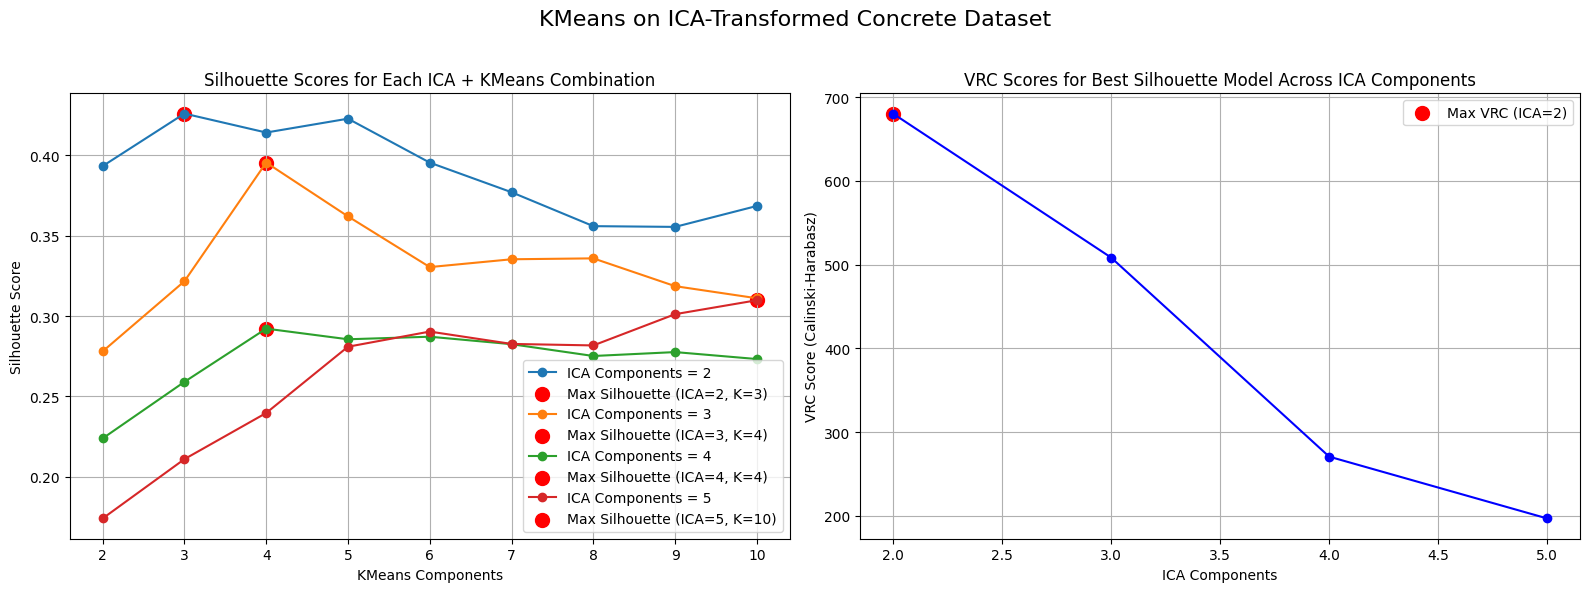


Best model parameters: ICA Components = 2, KMeans Components = 3

Final model evaluation metrics on training data:
ICA Components: 2, KMeans Components: 3
Inertia: 620.3525
Silhouette Score: 0.4259
Davies-Bouldin Index: 0.7949
Variance Ratio Criterion (VRC): 680.2100


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split

# Load and split the concrete dataset
X = concrete.features  # Features from the concrete dataset
y = concrete.target  # Target values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of ICA and KMeans components
ica_components_range = [2, 3, 4, 5]
kmeans_components_range = list(range(2, 11))

# To store best models and scores
best_models = {}

# Step 1 & 2: Loop over ICA components and apply ICA with different KMeans component numbers
for ica_components in ica_components_range:
    best_silhouette_score = -1
    best_kmeans_components = None
    best_kmeans_model = None

    # Apply ICA transformation
    ica = FastICA(n_components=ica_components, random_state=4)
    X_train_ica = ica.fit_transform(X_train_scaled)

    # Apply KMeans on the ICA-transformed data and compute silhouette score
    silhouette_scores = []
    for kmeans_components in kmeans_components_range:
        kmeans = KMeans(n_clusters=kmeans_components, random_state=4)
        kmeans.fit(X_train_ica)

        # Predict clusters and calculate silhouette score
        y_train_pred = kmeans.predict(X_train_ica)
        sil_score = silhouette_score(X_train_ica, y_train_pred) if kmeans_components > 1 else np.nan
        silhouette_scores.append(sil_score)

        # Track the best model based on silhouette score for this ICA setting
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_kmeans_components = kmeans_components
            best_kmeans_model = kmeans

    # Store the best model and scores for this ICA setting
    best_models[ica_components] = {
        "best_kmeans_model": best_kmeans_model,
        "best_kmeans_components": best_kmeans_components,
        "best_silhouette": best_silhouette_score,
        "silhouette_scores": silhouette_scores,
        "X_train_ica": X_train_ica
    }

# Step 3: Plot silhouette scores for each ICA + KMeans combination
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("KMeans on ICA-Transformed Concrete Dataset", fontsize=16)

for ica_components in ica_components_range:
    silhouette_scores = best_models[ica_components]["silhouette_scores"]
    best_sil_idx = np.nanargmax(silhouette_scores)
    axes[0].plot(kmeans_components_range, silhouette_scores, marker='o', label=f"ICA Components = {ica_components}")
    axes[0].scatter(kmeans_components_range[best_sil_idx], silhouette_scores[best_sil_idx], color='red', marker='o', s=100,
                    label=f"Max Silhouette (ICA={ica_components}, K={kmeans_components_range[best_sil_idx]})")

axes[0].set_xlabel("KMeans Components")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Scores for Each ICA + KMeans Combination")
axes[0].grid(True)
axes[0].legend()

# Step 4 & 5: Choose the best model across ICA transformations based on VRC and plot results
vrc_scores = []
for ica_components, model_details in best_models.items():
    kmeans = model_details["best_kmeans_model"]
    X_train_ica = model_details["X_train_ica"]
    vrc = calinski_harabasz_score(X_train_ica, kmeans.predict(X_train_ica))  # Use VRC (Calinski-Harabasz Index)
    vrc_scores.append(vrc)

# Highlight maximum VRC
max_vrc_idx = np.argmax(vrc_scores)
axes[1].plot(ica_components_range, vrc_scores, marker='o', linestyle='-', color='b')
axes[1].scatter(ica_components_range[max_vrc_idx], vrc_scores[max_vrc_idx], color='red', marker='o', s=100,
                label=f"Max VRC (ICA={ica_components_range[max_vrc_idx]})")

axes[1].set_xlabel("ICA Components")
axes[1].set_ylabel("VRC Score (Calinski-Harabasz)")
axes[1].set_title("VRC Scores for Best Silhouette Model Across ICA Components")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Find the best model based on VRC
best_ica_components = ica_components_range[max_vrc_idx]
best_kmeans_components = best_models[best_ica_components]["best_kmeans_components"]
best_kmeans_final = best_models[best_ica_components]["best_kmeans_model"]
X_train_ica_final = best_models[best_ica_components]["X_train_ica"]

print(f"\nBest model parameters: ICA Components = {best_ica_components}, KMeans Components = {best_kmeans_components}")

# Step 6: Retrain model using the best ICA and KMeans components if necessary
# The best_kmeans_final model is already fitted on X_train_ica_final, but we double-check metrics.

# Step 7: Calculate and report metrics for the final selected model
inertia_final = best_kmeans_final.inertia_
y_train_pred_final = best_kmeans_final.predict(X_train_ica_final)
sil_score_final = silhouette_score(X_train_ica_final, y_train_pred_final)
davies_bouldin_final = davies_bouldin_score(X_train_ica_final, y_train_pred_final)
vrc_final = calinski_harabasz_score(X_train_ica_final, y_train_pred_final)  # Final VRC score

# Output the metrics for the final model
print("\nFinal model evaluation metrics on training data:")
print(f"ICA Components: {best_ica_components}, KMeans Components: {best_kmeans_components}")
print(f"Inertia: {inertia_final:.4f}")
print(f"Silhouette Score: {sil_score_final:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_final:.4f}")
print(f"Variance Ratio Criterion (VRC): {vrc_final:.4f}")


### **4. Apply NN on Set of Dimensionality Reduced Dataset**

#### NN applied to diabetes dataset with RP dim. red.

In [ ]:
import numpy as np
import time
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply Randomized Projection (RP) with 3 components
rp = GaussianRandomProjection(n_components=3, random_state=4)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)

# Initialize MLPClassifier
MLP = MLPClassifier(activation='tanh', hidden_layer_sizes=(8, 8), solver='adam', learning_rate = 'adaptive', alpha=0.0001, max_iter=600, random_state=4)

# Perform cross-validation on the training data
cv_scores = cross_val_score(MLP, X_train_rp, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Perform cross-validated predictions on X_train to assess generalization
y_train_pred = cross_val_predict(MLP, X_train_rp, y_train, cv=5)

# Evaluate the model using cross-validated predictions on the training set
print("\nCross-validated training set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Classification report: ")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))
print("Accuracy score between y_train and y_train_pred: ")
print(accuracy_score(y_train, y_train_pred))

# Train the model on the entire training data
start_time = time.time()
MLP.fit(X_train_rp, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")
print("Number of iterations:")
print(MLP.n_iter_)

# Extract and print the weights and biases of the model
if hasattr(MLP, 'coefs_'):
    print("Model Weights:")
    for i, layer_weights in enumerate(MLP.coefs_):
        print(f"Layer {i+1} weights shape: {layer_weights.shape}")
        print(layer_weights)

    print("Model Biases:")
    for i, layer_biases in enumerate(MLP.intercepts_):
        print(f"Layer {i+1} biases shape: {layer_biases.shape}")
        print(layer_biases)
else:
    print("The model has not been trained yet or did not converge properly.")

# Evaluate the model by predicting values on the test dataset
query_start_time = time.time()
y_test_pred = MLP.predict(X_test_rp)
query_time = time.time() - query_start_time
print(f"Query time (prediction time): {query_time:.4f} seconds")

print("Test set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report: ")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))
print("Accuracy score between y_test and y_test_pred: ")
print(accuracy_score(y_test, y_test_pred))


Cross-validation scores: [0.73170732 0.68292683 0.66666667 0.71544715 0.69672131]
Average cross-validation score: 0.6986938557910168

Cross-validated training set evaluation:
Confusion matrix: 
[[350  48]
 [137  79]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       398
           1       0.62      0.37      0.46       216

    accuracy                           0.70       614
   macro avg       0.67      0.62      0.63       614
weighted avg       0.68      0.70      0.67       614

Accuracy score between y_train and y_train_pred: 
0.6986970684039088
Training time: 0.3643 seconds
Number of iterations:
151
Model Weights:
Layer 1 weights shape: (3, 8)
[[ 0.59390679  0.18481152  0.60470379  0.30904118  0.31288599 -0.26433487
   0.71514868 -0.9860589 ]
 [-0.34840274 -0.01963274  0.59638519 -0.41704362  0.63056269  0.76983259
  -0.45052818  0.11113559]
 [-0.98325965 -0.15117529 -0.45968138  0.65327564 -0.0103482

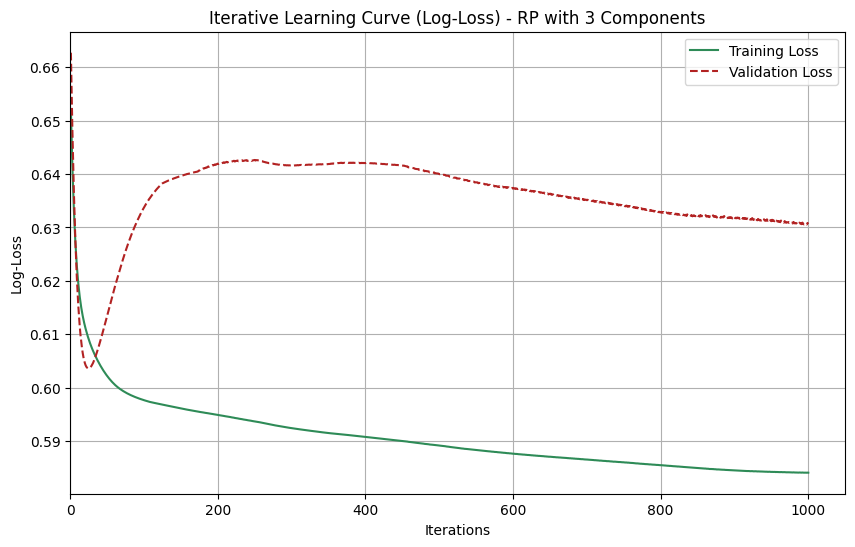

In [ ]:
### -- Iterative learning curve: iteration vs loss --

import numpy as np
import time
import warnings
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply Randomized Projection (RP) with 3 components
rp = GaussianRandomProjection(n_components=3, random_state=4)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)

# Initialize MLPClassifier with warm_start for iterative learning curve
mlp_logloss = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(8, 8),
    solver='adam',
    learning_rate='adaptive',
    alpha=0.0001,
    max_iter=1,  # One iteration at a time
    warm_start=True,  # Continue training from the last state
    random_state=4
)

# Lists to store log loss (cross-entropy loss) values for each iteration
train_loss = []  # For training set
val_loss = []    # For validation set

# Number of iterations
n_iterations = 1000

# Iteratively train the model and record log-loss
for i in range(n_iterations):
    mlp_logloss.fit(X_train_rp, y_train)  # Train for one iteration

    # Predict probabilities for each class for training and validation sets
    y_train_prob = mlp_logloss.predict_proba(X_train_rp)
    y_val_prob = mlp_logloss.predict_proba(X_test_rp)

    # Compute log loss (cross-entropy loss) for training and validation sets
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))

# Plotting the Iterative Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss) - RP with 3 Components')
plt.legend()
plt.grid(True)
plt.show()


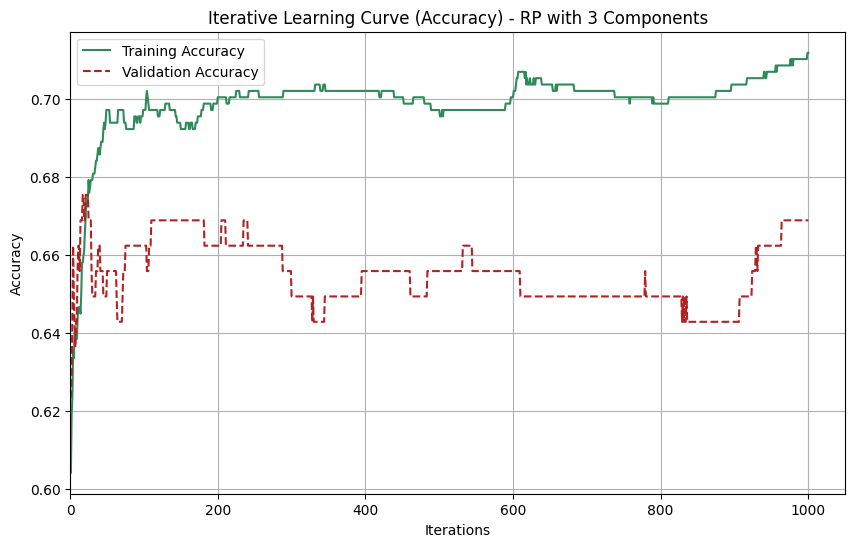

In [ ]:
### -- Iterative learning curve: iteration vs accuracy --

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# -- Iterative learning curve: iteration vs accuracy --

# Initialize MLPClassifier with the chosen parameters and set up for iterative training
mlp_accuracy = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(8, 8),
    solver='adam',
    learning_rate='adaptive',
    alpha=0.0001,
    max_iter=1,  # Perform one iteration at a time
    warm_start=True,  # Allows the model to continue training from the previous state
    random_state=4  # Replace with your sklearn_random_state if defined
)

# Lists to store accuracy values for each iteration
train_accuracy = []  # For training set
val_accuracy = []    # For validation set

# Number of iterations
n_iterations = 1000

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Training loop for incremental learning
for i in range(n_iterations):
    mlp_accuracy.fit(X_train_rp, y_train)  # Train the model on the reduced training data

    # Predict on train and validation sets (reduced data)
    y_train_pred = mlp_accuracy.predict(X_train_rp)
    y_val_pred = mlp_accuracy.predict(X_test_rp)

    # Compute accuracy for train and validation sets
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    val_accuracy.append(accuracy_score(y_test, y_val_pred))

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 6))
# Plotting training and validation accuracy
plt.plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle="--")
# Set axis limits: Ensure x-axis starts from zero
plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0)  # Uncomment if needed to start y-axis at 0
# Labels and title
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy) - RP with 3 Components')
# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
### -- Grid Search --

import numpy as np
import pandas as pd
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have diabetes.features and diabetes.target loaded into `X` and `y`
X = diabetes.features  # Replace `diabetes.features` with the concrete dataset if needed
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply RP transformation with 3 components
rp = GaussianRandomProjection(n_components=3, random_state=4)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(3,), (3, 3), (3, 3, 3), (5,), (5, 5), (5, 5, 5), (8,), (8, 8), (8, 8, 8), (10,), (10, 10), (10, 10, 10), (12,), (12, 12), (12, 12, 12)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    MLPClassifier(max_iter=5000, random_state=4),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available processors
)

# Perform the grid search on the RP-transformed training data
grid_search.fit(X_train_rp, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the training set with the best model
y_train_pred = best_model.predict(X_train_rp)

# Evaluate the model
print("\nTraining Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))

# Train the final model on the entire training dataset
best_model.fit(X_train_rp, y_train)

# Evaluate the model by predicting values on the test dataset
y_test_pred = best_model.predict(X_test_rp)
print("\nTest Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

# Access the results of the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to store all parameter combinations and their corresponding scores
results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the mean test score in descending order (best combinations first)
ranked_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Keep relevant columns: rank, mean test score, and parameter combination
ranked_results_df = ranked_results_df[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate']]

# Show the top results for quick inspection
print("\nTop 10 Parameter Combinations by Cross-Validation Score:")
print(ranked_results_df.head(10))


Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 8), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation accuracy: 0.6986938557910168

Training Set Evaluation:
Confusion matrix:
[[352  46]
 [140  76]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       398
           1       0.62      0.35      0.45       216

    accuracy                           0.70       614
   macro avg       0.67      0.62      0.62       614
weighted avg       0.68      0.70      0.67       614


Test Set Evaluation:
Confusion matrix:
[[87 15]
 [35 17]]

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78       102
           1       0.53      0.33      0.40        52

    accuracy                           0.68       154
   macro avg       0.62      0.59      0.59       154
weighted avg       0.65      0.68   

In [ ]:
print("Based on grid search:")
print("Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8,8), 'learning_rate': 'adaptive', 'solver': 'adam'}")

Based on grid search:
Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8,8), 'learning_rate': 'adaptive', 'solver': 'adam'}


#### NN applied to diabetes dataset with PCA dim. red.

In [ ]:
import numpy as np
import time
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply PCA with 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize MLPClassifier
MLP = MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10), solver='sgd', learning_rate='constant', alpha=0.0001, max_iter=600, random_state=4)

# Perform cross-validation on the training data
cv_scores = cross_val_score(MLP, X_train_pca, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Perform cross-validated predictions on X_train to assess generalization
y_train_pred = cross_val_predict(MLP, X_train_pca, y_train, cv=5)

# Evaluate the model using cross-validated predictions on the training set
print("\nCross-validated training set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Classification report: ")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))
print("Accuracy score between y_train and y_train_pred: ")
print(accuracy_score(y_train, y_train_pred))

# Train the model on the entire training data
start_time = time.time()
MLP.fit(X_train_pca, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")
print("Number of iterations:")
print(MLP.n_iter_)

# Extract and print the weights and biases of the model
if hasattr(MLP, 'coefs_'):
    print("Model Weights:")
    for i, layer_weights in enumerate(MLP.coefs_):
        print(f"Layer {i+1} weights shape: {layer_weights.shape}")
        print(layer_weights)

    print("Model Biases:")
    for i, layer_biases in enumerate(MLP.intercepts_):
        print(f"Layer {i+1} biases shape: {layer_biases.shape}")
        print(layer_biases)
else:
    print("The model has not been trained yet or did not converge properly.")

# Evaluate the model by predicting values on the test dataset
query_start_time = time.time()
y_test_pred = MLP.predict(X_test_pca)
query_time = time.time() - query_start_time
print(f"Query time (prediction time): {query_time:.4f} seconds")

print("Test set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report: ")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))
print("Accuracy score between y_test and y_test_pred: ")
print(accuracy_score(y_test, y_test_pred))


Cross-validation scores: [0.74796748 0.7804878  0.79674797 0.71544715 0.75409836]
Average cross-validation score: 0.7589497534319605

Cross-validated training set evaluation:
Confusion matrix: 
[[341  57]
 [ 91 125]]
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       398
           1       0.69      0.58      0.63       216

    accuracy                           0.76       614
   macro avg       0.74      0.72      0.72       614
weighted avg       0.75      0.76      0.75       614

Accuracy score between y_train and y_train_pred: 
0.758957654723127
Training time: 0.5000 seconds
Number of iterations:
210
Model Weights:
Layer 1 weights shape: (5, 10)
[[ 0.60921494  0.06764789  0.58012503  0.27715714  0.16451846 -0.41681899
   0.68774624 -0.60117212 -0.39021398 -0.13474641]
 [ 0.40419503 -0.38154886  0.41550231  0.65428196 -0.4609915  -0.01857357
  -0.37079014 -0.1156795  -0.60567491  0.55106218]
 [-0.0789439

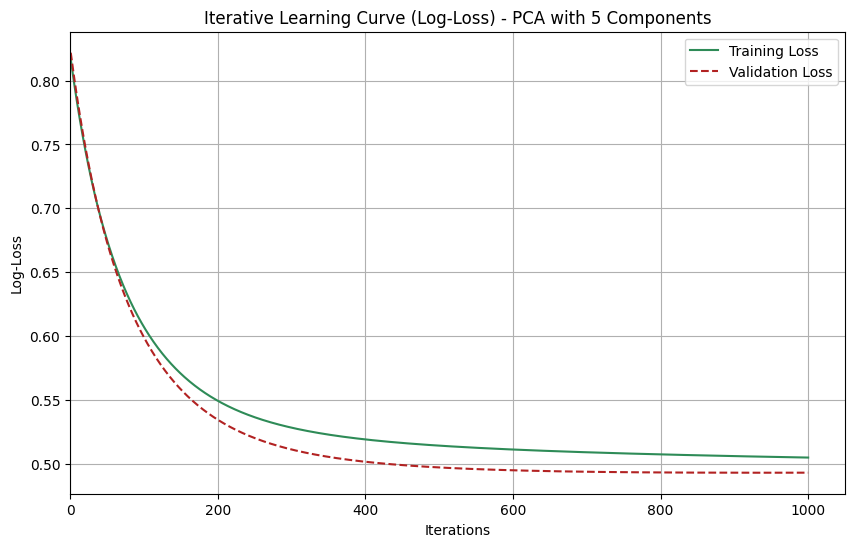

In [ ]:
### -- Iterative learning curve: iteration vs loss --

import numpy as np
import time
import warnings
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply PCA with 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize MLPClassifier with warm_start for iterative learning curve
mlp_logloss = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10, 10),
    solver='sgd',
    learning_rate='constant',
    alpha=0.0001,
    max_iter=1,  # One iteration at a time
    warm_start=True,  # Continue training from the last state
    random_state=4
)

# Lists to store log loss (cross-entropy loss) values for each iteration
train_loss = []  # For training set
val_loss = []    # For validation set

# Number of iterations
n_iterations = 1000

# Iteratively train the model and record log-loss
for i in range(n_iterations):
    mlp_logloss.fit(X_train_pca, y_train)  # Train for one iteration

    # Predict probabilities for each class for training and validation sets
    y_train_prob = mlp_logloss.predict_proba(X_train_pca)
    y_val_prob = mlp_logloss.predict_proba(X_test_pca)

    # Compute log loss (cross-entropy loss) for training and validation sets
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))

# Plotting the Iterative Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss) - PCA with 5 Components')
plt.legend()
plt.grid(True)
plt.show()


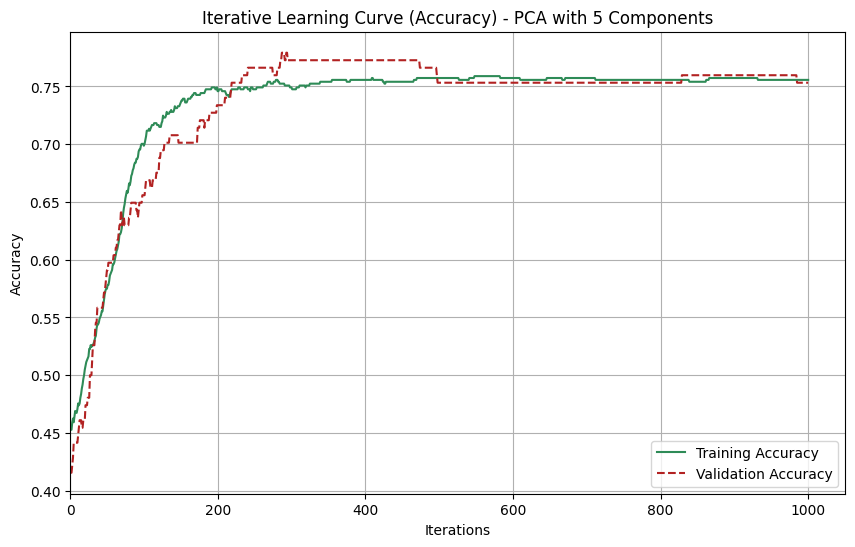

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

# Assuming you have your dataset loaded and split into features and target (diabetes example)
# Apply LabelEncoder to encode categorical labels if necessary
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize MLPClassifier with the chosen parameters and set up for iterative training
mlp_accuracy = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10, 10),
    solver='sgd',
    learning_rate='constant',
    alpha=0.0001,
    max_iter=1,  # Perform one iteration at a time
    warm_start=True,  # Allows the model to continue training from the previous state
    random_state=4
)

# Lists to store accuracy values for each iteration
train_accuracy = []  # For training set
val_accuracy = []    # For validation set

# Number of iterations
n_iterations = 1000

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Training loop for incremental learning
for i in range(n_iterations):
    mlp_accuracy.fit(X_train_pca, y_train)  # Train the model on the PCA-reduced training data

    # Predict on train and validation sets (PCA-reduced data)
    y_train_pred = mlp_accuracy.predict(X_train_pca)
    y_val_pred = mlp_accuracy.predict(X_test_pca)

    # Compute accuracy for train and validation sets
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    val_accuracy.append(accuracy_score(y_test, y_val_pred))

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 6))
# Plotting training and validation accuracy
plt.plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle="--")
# Set axis limits: Ensure x-axis starts from zero
plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0)  # Uncomment if needed to start y-axis at 0
# Labels and title
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy) - PCA with 5 Components')
# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you have diabetes.features and diabetes.target loaded into `X` and `y`
X = diabetes.features  # Replace `diabetes.features` with the concrete dataset if needed
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA transformation with 5 components
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(3,), (3, 3), (3, 3, 3), (5,), (5, 5), (5, 5, 5), (8,), (8, 8), (8, 8, 8), (10,), (10, 10), (10, 10, 10), (12,), (12, 12), (12, 12, 12)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    MLPClassifier(max_iter=5000, random_state=4),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available processors
)

# Perform the grid search on the PCA-transformed training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the training set with the best model
y_train_pred = best_model.predict(X_train_pca)

# Evaluate the model
print("\nTraining Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))

# Train the final model on the entire training dataset
best_model.fit(X_train_pca, y_train)

# Evaluate the model by predicting values on the test dataset
y_test_pred = best_model.predict(X_test_pca)
print("\nTest Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

# Access the results of the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to store all parameter combinations and their corresponding scores
results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the mean test score in descending order (best combinations first)
ranked_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Keep relevant columns: rank, mean test score, and parameter combination
ranked_results_df = ranked_results_df[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate']]

# Show the top results for quick inspection
print("\nTop 10 Parameter Combinations by Cross-Validation Score:")
print(ranked_results_df.head(10))


Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Best cross-validation accuracy: 0.7589497534319605

Training Set Evaluation:
Confusion matrix:
[[343  55]
 [ 92 124]]

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       398
           1       0.69      0.57      0.63       216

    accuracy                           0.76       614
   macro avg       0.74      0.72      0.73       614
weighted avg       0.75      0.76      0.75       614


Test Set Evaluation:
Confusion matrix:
[[84 18]
 [19 33]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       102
           1       0.65      0.63      0.64        52

    accuracy                           0.76       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.76  

In [ ]:
print("Based on grid search:")
print("Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,10), 'learning_rate': 'constant', 'solver': 'sgd'}")

Based on grid search:
Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,10), 'learning_rate': 'constant', 'solver': 'sgd'}


#### NN applied to diabetes dataset with ICA dim. red.

In [ ]:
import numpy as np
import time
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply Randomized Projection (RP) with 3 components
rp = GaussianRandomProjection(n_components=3, random_state=4)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)

# Initialize MLPClassifier
MLP = MLPClassifier(activation='relu', hidden_layer_sizes=(10,10,10), solver='sgd', learning_rate = 'adaptive', alpha=0.01, max_iter=600, random_state=4)

# Perform cross-validation on the training data
cv_scores = cross_val_score(MLP, X_train_rp, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Perform cross-validated predictions on X_train to assess generalization
y_train_pred = cross_val_predict(MLP, X_train_rp, y_train, cv=5)

# Evaluate the model using cross-validated predictions on the training set
print("\nCross-validated training set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Classification report: ")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))
print("Accuracy score between y_train and y_train_pred: ")
print(accuracy_score(y_train, y_train_pred))

# Train the model on the entire training data
start_time = time.time()
MLP.fit(X_train_rp, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")
print("Number of iterations:")
print(MLP.n_iter_)

# Extract and print the weights and biases of the model
if hasattr(MLP, 'coefs_'):
    print("Model Weights:")
    for i, layer_weights in enumerate(MLP.coefs_):
        print(f"Layer {i+1} weights shape: {layer_weights.shape}")
        print(layer_weights)

    print("Model Biases:")
    for i, layer_biases in enumerate(MLP.intercepts_):
        print(f"Layer {i+1} biases shape: {layer_biases.shape}")
        print(layer_biases)
else:
    print("The model has not been trained yet or did not converge properly.")

# Evaluate the model by predicting values on the test dataset
query_start_time = time.time()
y_test_pred = MLP.predict(X_test_rp)
query_time = time.time() - query_start_time
print(f"Query time (prediction time): {query_time:.4f} seconds")

print("Test set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report: ")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))
print("Accuracy score between y_test and y_test_pred: ")
print(accuracy_score(y_test, y_test_pred))


Cross-validation scores: [0.72357724 0.69105691 0.62601626 0.67479675 0.68852459]
Average cross-validation score: 0.6807943489270958

Cross-validated training set evaluation:
Confusion matrix: 
[[368  30]
 [166  50]]
Classification report: 
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       398
           1       0.62      0.23      0.34       216

    accuracy                           0.68       614
   macro avg       0.66      0.58      0.56       614
weighted avg       0.67      0.68      0.63       614

Accuracy score between y_train and y_train_pred: 
0.6807817589576547
Training time: 0.5477 seconds
Number of iterations:
273
Model Weights:
Layer 1 weights shape: (3, 10)
[[ 0.65680018  0.08237415  0.66409243  0.22811377  0.26662378 -0.45774934
   0.61516903 -0.61688695 -0.32028551 -0.02179521]
 [ 0.37757602 -0.35890408  0.53946039  0.65763896 -0.45932544  0.13365231
  -0.7015962  -0.11189526 -0.70215866  0.61240563]
 [-0.084254

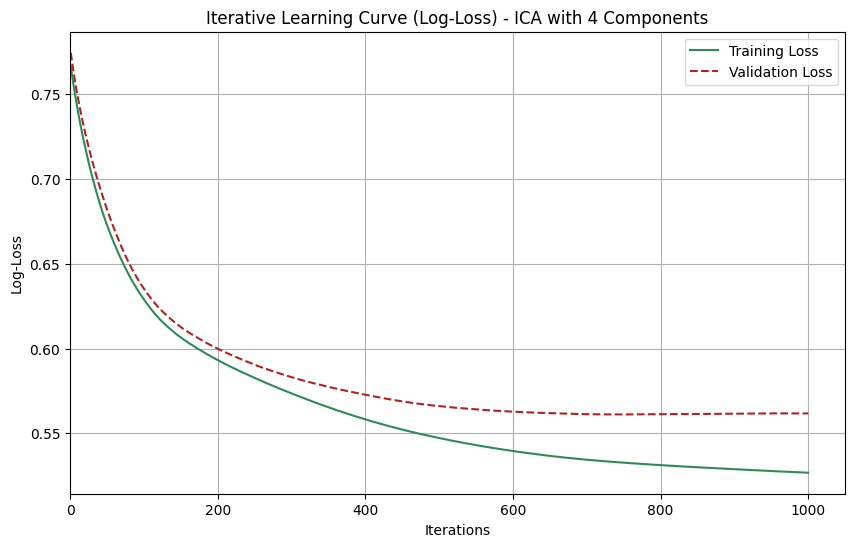

In [ ]:
import numpy as np
import time
import warnings
from sklearn import preprocessing
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply ICA with 4 components
ica = FastICA(n_components=4, random_state=4)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Initialize MLPClassifier with warm_start for iterative learning curve
mlp_logloss = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(10,10,10),
    solver='sgd',
    learning_rate='adaptive',
    alpha=0.01,
    max_iter=1,  # One iteration at a time
    warm_start=True,  # Continue training from the last state
    random_state=4
)

# Lists to store log loss (cross-entropy loss) values for each iteration
train_loss = []  # For training set
val_loss = []    # For validation set

# Number of iterations
n_iterations = 1000

# Iteratively train the model and record log-loss
for i in range(n_iterations):
    mlp_logloss.fit(X_train_ica, y_train)  # Train for one iteration

    # Predict probabilities for each class for training and validation sets
    y_train_prob = mlp_logloss.predict_proba(X_train_ica)
    y_val_prob = mlp_logloss.predict_proba(X_test_ica)

    # Compute log loss (cross-entropy loss) for training and validation sets
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))

# Plotting the Iterative Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss) - ICA with 4 Components')
plt.legend()
plt.grid(True)
plt.show()


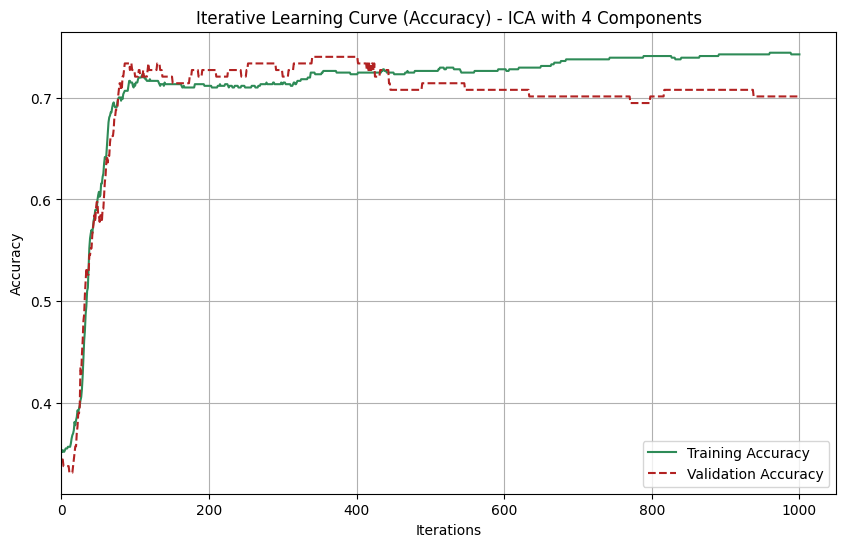

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming the diabetes dataset features and target are loaded in `diabetes.features` and `diabetes.target`
# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply ICA with 4 components
ica = FastICA(n_components=4, random_state=4)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Initialize MLPClassifier with the chosen parameters for iterative training
mlp_accuracy = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(10,10,10),
    solver='sgd',
    learning_rate='adaptive',
    alpha=0.01,
    max_iter=1,  # Perform one iteration at a time
    warm_start=True,  # Allows the model to continue training from the previous state
    random_state=4
)

# Lists to store accuracy values for each iteration
train_accuracy = []  # For training set
val_accuracy = []    # For validation set

# Number of iterations
n_iterations = 1000

# Training loop for incremental learning
for i in range(n_iterations):
    mlp_accuracy.fit(X_train_ica, y_train)  # Train the model on the ICA-reduced training data

    # Predict on train and validation sets (ICA-reduced data)
    y_train_pred = mlp_accuracy.predict(X_train_ica)
    y_val_pred = mlp_accuracy.predict(X_test_ica)

    # Compute accuracy for train and validation sets
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    val_accuracy.append(accuracy_score(y_test, y_val_pred))

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 6))
# Plotting training and validation accuracy
plt.plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle="--")
# Set axis limits: Ensure x-axis starts from zero
plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0)  # Uncomment if needed to start y-axis at 0
# Labels and title
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy) - ICA with 4 Components')
# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load diabetes dataset features and target
X = diabetes.features  # Replace `diabetes.features` with the concrete dataset if needed
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ICA transformation with 4 components
ica = FastICA(n_components=4, random_state=4)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(3,), (3, 3), (3, 3, 3), (5,), (5, 5), (5, 5, 5), (8,), (8, 8), (8, 8, 8), (10,), (10, 10), (10, 10, 10), (12,), (12, 12), (12, 12, 12)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    MLPClassifier(max_iter=5000, random_state=4),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # Use all available processors
)

# Perform the grid search on the ICA-transformed training data
grid_search.fit(X_train_ica, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the training set with the best model
y_train_pred = best_model.predict(X_train_ica)

# Evaluate the model on the training set
print("\nTraining Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))

# Train the final model on the entire training dataset
best_model.fit(X_train_ica, y_train)

# Evaluate the model by predicting values on the test dataset
y_test_pred = best_model.predict(X_test_ica)
print("\nTest Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

# Access the results of the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to store all parameter combinations and their corresponding scores
results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the mean test score in descending order (best combinations first)
ranked_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Keep relevant columns: rank, mean test score, and parameter combination
ranked_results_df = ranked_results_df[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate']]

# Show the top results for quick inspection
print("\nTop 10 Parameter Combinations by Cross-Validation Score:")
print(ranked_results_df.head(10))


Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
Best cross-validation accuracy: 0.7377582300413168

Training Set Evaluation:
Confusion matrix:
[[349  49]
 [109 107]]

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       398
           1       0.69      0.50      0.58       216

    accuracy                           0.74       614
   macro avg       0.72      0.69      0.70       614
weighted avg       0.74      0.74      0.73       614


Test Set Evaluation:
Confusion matrix:
[[84 18]
 [25 27]]

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       102
           1       0.60      0.52      0.56        52

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72

In [ ]:
print("Based on grid search:")
print("Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,10,10), 'learning_rate': 'adaptive', 'solver': 'sgd'}")

Based on grid search:
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,10,10), 'learning_rate': 'adaptive', 'solver': 'sgd'}


#### Combined Iterative Learning Curves (Dimensionality Reduction Algorithms)

In [ ]:
# import numpy as np
# import time
# import warnings
# from sklearn import preprocessing
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import log_loss
# import matplotlib.pyplot as plt
# from sklearn.exceptions import ConvergenceWarning

# # Suppress the ConvergenceWarning
# warnings.filterwarnings("ignore", category=ConvergenceWarning)

# # Apply LabelEncoder to encode categorical labels
# Label = preprocessing.LabelEncoder()
# diabetes_outcome = Label.fit_transform(diabetes.target)

# # Split dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# # Scale features
# scaler_diab = StandardScaler()
# X_train_scaled = scaler_diab.fit_transform(X_train)
# X_test_scaled = scaler_diab.transform(X_test)

# # Baseline Model
# mlp_baseline = MLPClassifier(
#     activation='logistic',
#     hidden_layer_sizes=(8, 8),
#     solver='adam',
#     alpha=0.0001,
#     max_iter=1,  # One iteration at a time
#     warm_start=True,
#     random_state=4
# )

# # Apply PCA with 5 components for Dimension-Reduced Model
# pca = PCA(n_components=5)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# # PCA Model
# mlp_pca = MLPClassifier(
#     activation='tanh',
#     hidden_layer_sizes=(10, 10),
#     solver='sgd',
#     learning_rate='constant',
#     alpha=0.0001,
#     max_iter=1,  # One iteration at a time
#     warm_start=True,
#     random_state=4
# )

# # Lists to store log-loss values for each model
# baseline_train_loss, baseline_val_loss = [], []
# pca_train_loss, pca_val_loss = [], []

# # Number of iterations
# n_iterations = 1000

# # Training loop for both models
# for i in range(n_iterations):
#     # Baseline Model
#     mlp_baseline.fit(X_train_scaled, y_train)  # Train for one iteration
#     y_train_prob_baseline = mlp_baseline.predict_proba(X_train_scaled)
#     y_val_prob_baseline = mlp_baseline.predict_proba(X_test_scaled)
#     baseline_train_loss.append(log_loss(y_train, y_train_prob_baseline))
#     baseline_val_loss.append(log_loss(y_test, y_val_prob_baseline))

#     # PCA Model
#     mlp_pca.fit(X_train_pca, y_train)  # Train for one iteration
#     y_train_prob_pca = mlp_pca.predict_proba(X_train_pca)
#     y_val_prob_pca = mlp_pca.predict_proba(X_test_pca)
#     pca_train_loss.append(log_loss(y_train, y_train_prob_pca))
#     pca_val_loss.append(log_loss(y_test, y_val_prob_pca))

# # Plotting the combined Iterative Learning Curves
# plt.figure(figsize=(12, 8))

# # Plot Baseline Model curves
# plt.plot(range(1, n_iterations + 1), baseline_train_loss, label='Baseline Training Loss', color='seagreen')
# plt.plot(range(1, n_iterations + 1), baseline_val_loss, label='Baseline Validation Loss', color='firebrick', linestyle='--')

# # Plot PCA Model curves
# plt.plot(range(1, n_iterations + 1), pca_train_loss, label='PCA Training Loss', color='blue')
# plt.plot(range(1, n_iterations + 1), pca_val_loss, label='PCA Validation Loss', color='sienna', linestyle='--')

# # Labels, Title, and Legend
# plt.xlabel('Iterations')
# plt.ylabel('Log-Loss')
# plt.title('Iterative Learning Curves - Baseline vs PCA Model (5 Components)')
# plt.legend()
# plt.grid(True)
# plt.show()


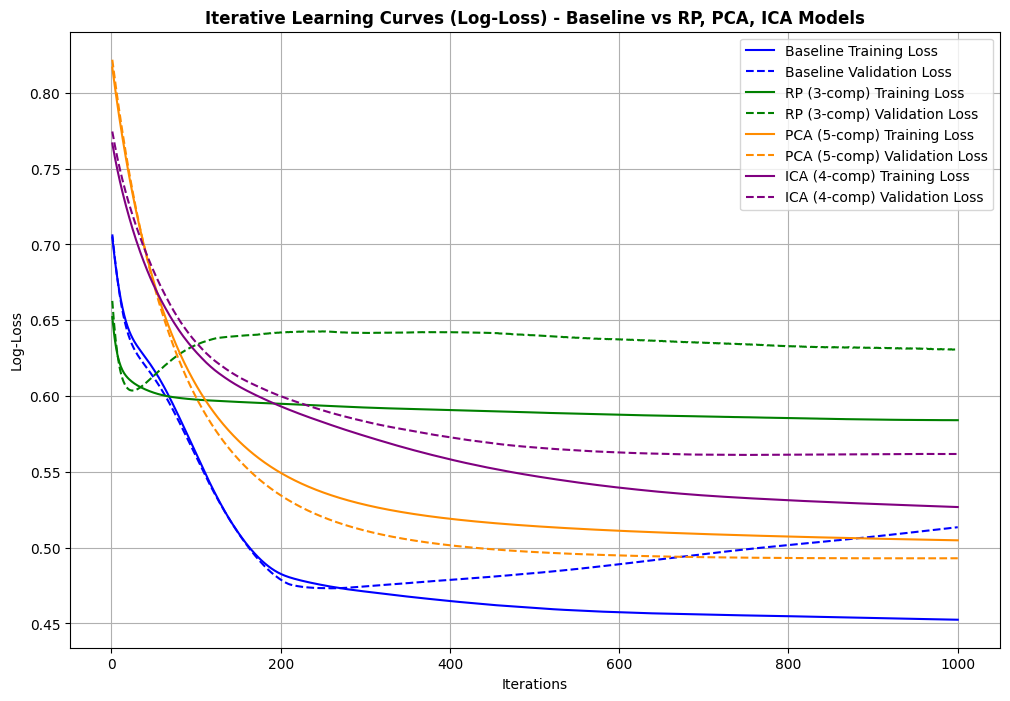

In [ ]:
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Function to train MLP and store log-loss for each iteration
def train_mlp_with_log_loss(X_train, X_test, y_train, y_test, model_params, n_iterations=1000):
    mlp = MLPClassifier(**model_params, max_iter=1, warm_start=True, random_state=4)
    train_loss, val_loss = [], []

    for _ in range(n_iterations):
        mlp.fit(X_train, y_train)
        y_train_prob = mlp.predict_proba(X_train)
        y_val_prob = mlp.predict_proba(X_test)
        train_loss.append(log_loss(y_train, y_train_prob))
        val_loss.append(log_loss(y_test, y_val_prob))

    return train_loss, val_loss

# Baseline Model parameters
baseline_params = {
    'activation': 'logistic',
    'hidden_layer_sizes': (8, 8),
    'solver': 'adam',
    'alpha': 0.0001
}

# RP Model parameters
rp_params = {
    'activation': 'tanh',
    'hidden_layer_sizes': (8, 8),
    'solver': 'adam',
    'learning_rate': 'adaptive',
    'alpha': 0.0001
}

# PCA Model parameters
pca_params = {
    'activation': 'tanh',
    'hidden_layer_sizes': (10, 10),
    'solver': 'sgd',
    'learning_rate': 'constant',
    'alpha': 0.0001
}

# ICA Model parameters
ica_params = {
    'activation': 'relu',
    'hidden_layer_sizes': (10, 10, 10),
    'solver': 'sgd',
    'learning_rate': 'adaptive',
    'alpha': 0.01
}

# Train and collect log-loss for Baseline Model
baseline_train_loss, baseline_val_loss = train_mlp_with_log_loss(X_train_scaled, X_test_scaled, y_train, y_test, baseline_params)

# Apply Randomized Projection (RP) with 3 components and train RP Model
rp = GaussianRandomProjection(n_components=3, random_state=4)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)
rp_train_loss, rp_val_loss = train_mlp_with_log_loss(X_train_rp, X_test_rp, y_train, y_test, rp_params)

# Apply PCA with 5 components and train PCA Model
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca_train_loss, pca_val_loss = train_mlp_with_log_loss(X_train_pca, X_test_pca, y_train, y_test, pca_params)

# Apply ICA with 4 components and train ICA Model
ica = FastICA(n_components=4, random_state=4)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)
ica_train_loss, ica_val_loss = train_mlp_with_log_loss(X_train_ica, X_test_ica, y_train, y_test, ica_params)

# Plotting combined Iterative Learning Curves
plt.figure(figsize=(12, 8))

# Plot Baseline Model curves
plt.plot(range(1, 1001), baseline_train_loss, label='Baseline Training Loss', color='blue')
plt.plot(range(1, 1001), baseline_val_loss, label='Baseline Validation Loss', color='blue', linestyle='--')

# Plot RP Model curves
plt.plot(range(1, 1001), rp_train_loss, label='RP (3-comp) Training Loss', color='green')
plt.plot(range(1, 1001), rp_val_loss, label='RP (3-comp) Validation Loss', color='green', linestyle='--')

# Plot PCA Model curves
plt.plot(range(1, 1001), pca_train_loss, label='PCA (5-comp) Training Loss', color='darkorange')
plt.plot(range(1, 1001), pca_val_loss, label='PCA (5-comp) Validation Loss', color='darkorange', linestyle='--')

# Plot ICA Model curves
plt.plot(range(1, 1001), ica_train_loss, label='ICA (4-comp) Training Loss', color='purple')
plt.plot(range(1, 1001), ica_val_loss, label='ICA (4-comp) Validation Loss', color='purple', linestyle='--')

# Labels, Title, and Legend
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curves (Log-Loss) - Baseline vs RP, PCA, ICA Models',fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


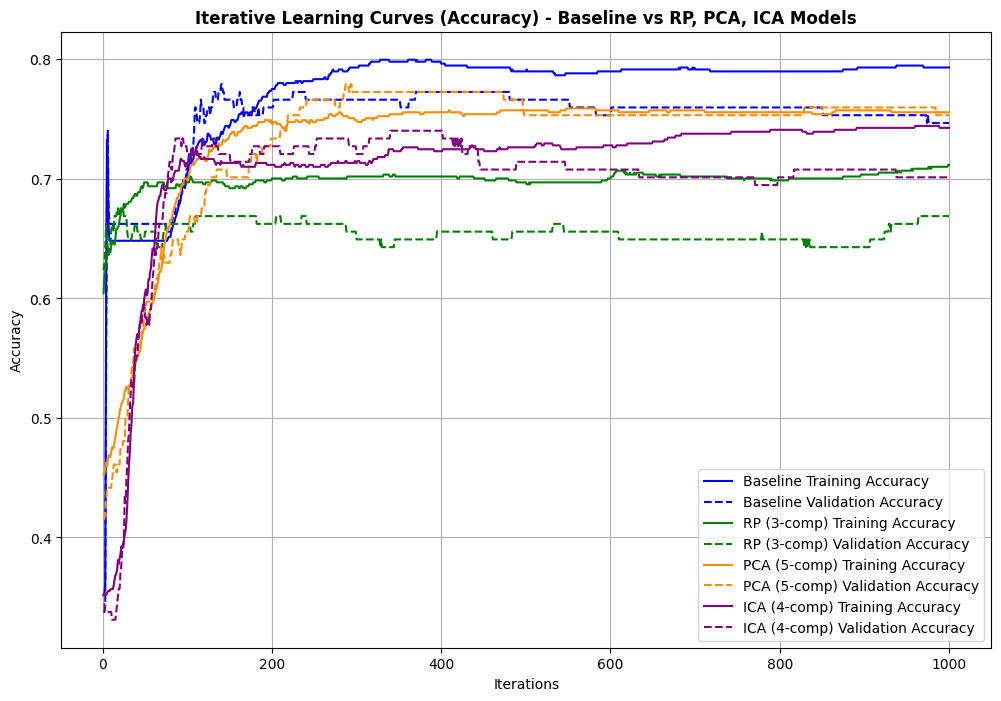

In [ ]:
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Apply LabelEncoder to encode categorical labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Function to train MLP and store accuracy for each iteration
def train_mlp_with_accuracy(X_train, X_test, y_train, y_test, model_params, n_iterations=1000):
    mlp = MLPClassifier(**model_params, max_iter=1, warm_start=True, random_state=4)
    train_accuracy, val_accuracy = [], []

    for _ in range(n_iterations):
        mlp.fit(X_train, y_train)
        y_train_pred = mlp.predict(X_train)
        y_val_pred = mlp.predict(X_test)
        train_accuracy.append(accuracy_score(y_train, y_train_pred))
        val_accuracy.append(accuracy_score(y_test, y_val_pred))

    return train_accuracy, val_accuracy

# Baseline Model parameters
baseline_params = {
    'activation': 'logistic',
    'hidden_layer_sizes': (8, 8),
    'solver': 'adam',
    'alpha': 0.0001
}

# RP Model parameters
rp_params = {
    'activation': 'tanh',
    'hidden_layer_sizes': (8, 8),
    'solver': 'adam',
    'learning_rate': 'adaptive',
    'alpha': 0.0001
}

# PCA Model parameters
pca_params = {
    'activation': 'tanh',
    'hidden_layer_sizes': (10, 10),
    'solver': 'sgd',
    'learning_rate': 'constant',
    'alpha': 0.0001
}

# ICA Model parameters
ica_params = {
    'activation': 'relu',
    'hidden_layer_sizes': (10, 10, 10),
    'solver': 'sgd',
    'learning_rate': 'adaptive',
    'alpha': 0.01
}

# Train and collect accuracy for Baseline Model
baseline_train_acc, baseline_val_acc = train_mlp_with_accuracy(X_train_scaled, X_test_scaled, y_train, y_test, baseline_params)

# Apply Randomized Projection (RP) with 3 components and train RP Model
rp = GaussianRandomProjection(n_components=3, random_state=4)
X_train_rp = rp.fit_transform(X_train_scaled)
X_test_rp = rp.transform(X_test_scaled)
rp_train_acc, rp_val_acc = train_mlp_with_accuracy(X_train_rp, X_test_rp, y_train, y_test, rp_params)

# Apply PCA with 5 components and train PCA Model
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
pca_train_acc, pca_val_acc = train_mlp_with_accuracy(X_train_pca, X_test_pca, y_train, y_test, pca_params)

# Apply ICA with 4 components and train ICA Model
ica = FastICA(n_components=4, random_state=4)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)
ica_train_acc, ica_val_acc = train_mlp_with_accuracy(X_train_ica, X_test_ica, y_train, y_test, ica_params)

# Plotting combined Iterative Learning Curves for Accuracy
plt.figure(figsize=(12, 8))

# Plot Baseline Model curves
plt.plot(range(1, 1001), baseline_train_acc, label='Baseline Training Accuracy', color='blue')
plt.plot(range(1, 1001), baseline_val_acc, label='Baseline Validation Accuracy', color='blue', linestyle='--')

# Plot RP Model curves
plt.plot(range(1, 1001), rp_train_acc, label='RP (3-comp) Training Accuracy', color='green')
plt.plot(range(1, 1001), rp_val_acc, label='RP (3-comp) Validation Accuracy', color='green', linestyle='--')

# Plot PCA Model curves
plt.plot(range(1, 1001), pca_train_acc, label='PCA (5-comp) Training Accuracy', color='darkorange')
plt.plot(range(1, 1001), pca_val_acc, label='PCA (5-comp) Validation Accuracy', color='darkorange', linestyle='--')

# Plot ICA Model curves
plt.plot(range(1, 1001), ica_train_acc, label='ICA (4-comp) Training Accuracy', color='purple')
plt.plot(range(1, 1001), ica_val_acc, label='ICA (4-comp) Validation Accuracy', color='purple', linestyle='--')

# Labels, Title, and Legend
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curves (Accuracy) - Baseline vs RP, PCA, ICA Models',fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()


### **5. Apply NN on Clustered Dataset**

#### NN applied to diabetes dataset with EM Clusters

In [ ]:
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import time
import numpy as np

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply EM clustering with 2 components and use clustering responsibilities as the new feature space
gmm = GaussianMixture(n_components=2, random_state=4)
gmm.fit(X_train_scaled)

# Transform the original feature space into the clustering responsibility space
X_train_gmm = gmm.predict_proba(X_train_scaled)  # Probabilities for each cluster
X_test_gmm = gmm.predict_proba(X_test_scaled)    # Probabilities for each cluster

# Initialize MLPClassifier
MLP = MLPClassifier(activation='relu', hidden_layer_sizes=(12, 12), solver='adam', alpha=0.01, learning_rate = 'adaptive', max_iter=600, random_state=4)

# Cross-validation on the training data
cv_scores = cross_val_score(MLP, X_train_gmm, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Cross-validated predictions
y_train_pred = cross_val_predict(MLP, X_train_gmm, y_train, cv=5)
print("\nCross-validated training set evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))
print("Accuracy score between y_train and y_train_pred:")
print(accuracy_score(y_train, y_train_pred))

# Train on the entire training data
start_time = time.time()
MLP.fit(X_train_gmm, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")
print("Number of iterations:")
print(MLP.n_iter_)

# Print model weights and biases if trained successfully
if hasattr(MLP, 'coefs_'):
    print("Model Weights:")
    for i, layer_weights in enumerate(MLP.coefs_):
        print(f"Layer {i+1} weights shape: {layer_weights.shape}")
    print("Model Biases:")
    for i, layer_biases in enumerate(MLP.intercepts_):
        print(f"Layer {i+1} biases shape: {layer_biases.shape}")
else:
    print("The model has not been trained yet or did not converge properly.")

# Predict on test data
query_start_time = time.time()
y_test_pred = MLP.predict(X_test_gmm)
query_time = time.time() - query_start_time
print(f"Query time (prediction time): {query_time:.4f} seconds")

print("Test set evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))
print("Accuracy score between y_test and y_test_pred:")
print(accuracy_score(y_test, y_test_pred))


Cross-validation scores: [0.65853659 0.65853659 0.69105691 0.69918699 0.63114754]
Average cross-validation score: 0.6676929228308677

Cross-validated training set evaluation:
Confusion matrix:
[[257 141]
 [ 63 153]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       398
           1       0.52      0.71      0.60       216

    accuracy                           0.67       614
   macro avg       0.66      0.68      0.66       614
weighted avg       0.70      0.67      0.68       614

Accuracy score between y_train and y_train_pred:
0.6677524429967426
Training time: 0.1070 seconds
Number of iterations:
55
Model Weights:
Layer 1 weights shape: (2, 12)
Layer 2 weights shape: (12, 12)
Layer 3 weights shape: (12, 1)
Model Biases:
Layer 1 biases shape: (12,)
Layer 2 biases shape: (12,)
Layer 3 biases shape: (1,)
Query time (prediction time): 0.0046 seconds
Test set evaluation:
Confusion matrix:
[[58 44]
 [19 33]]
Cl

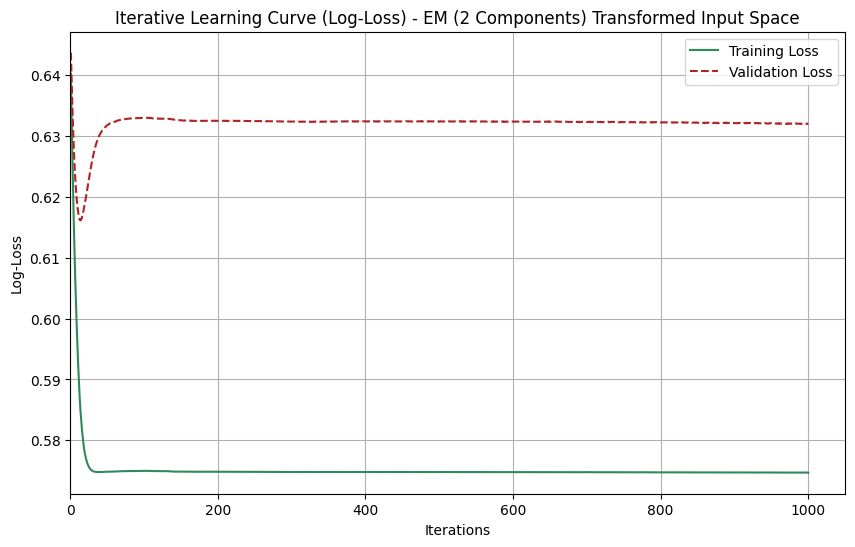

In [ ]:
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply EM clustering with 2 components and transform original features into cluster responsibilities (probabilities)
gmm = GaussianMixture(n_components=2, random_state=4)
gmm.fit(X_train_scaled)
X_train_gmm = gmm.predict_proba(X_train_scaled)
X_test_gmm = gmm.predict_proba(X_test_scaled)

# Initialize the MLPClassifier with parameters for iterative training
mlp_logloss = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,  # One iteration at a time
    warm_start=True,  # Allows the model to continue training from the previous state
    random_state=4
)

# Lists to store log loss (cross-entropy loss) values for each iteration
train_loss = []  # For training set
val_loss = []    # For validation set

# Number of iterations
n_iterations = 1000

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Iterative training and loss recording
for i in range(n_iterations):
    mlp_logloss.fit(X_train_gmm, y_train)  # Train for one iteration on the new input space

    # Predict probabilities for each class on training and validation sets
    y_train_prob = mlp_logloss.predict_proba(X_train_gmm)
    y_val_prob = mlp_logloss.predict_proba(X_test_gmm)

    # Compute log loss for training and validation sets
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))

# Plotting the Iterative Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss) - EM (2 Components) Transformed Input Space')
plt.legend()
plt.grid(True)
plt.show()


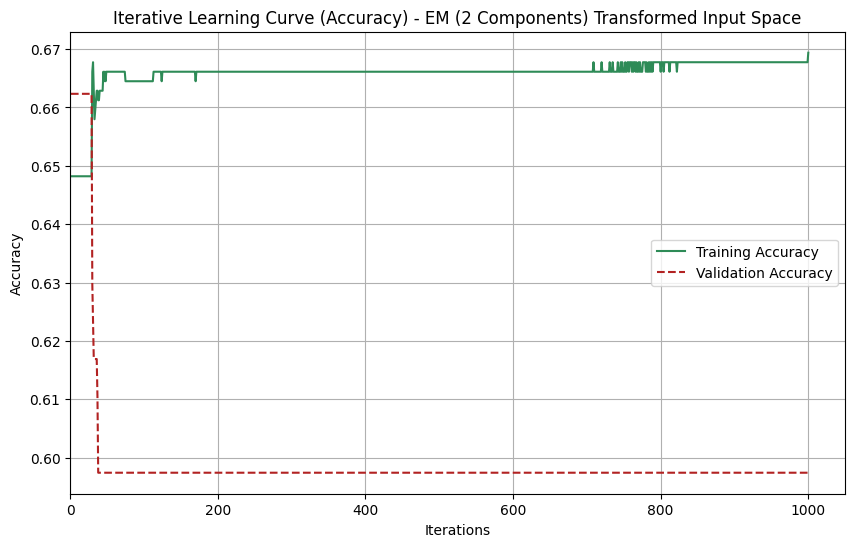

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn import preprocessing

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Encode the labels for the target
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply EM clustering with 2 components and get the cluster probabilities as the new input features
gmm = GaussianMixture(n_components=2, random_state=4)
gmm.fit(X_train_scaled)
X_train_gmm = gmm.predict_proba(X_train_scaled)  # Use probabilities as input for the neural network
X_test_gmm = gmm.predict_proba(X_test_scaled)

# Initialize MLPClassifier for iterative accuracy tracking
mlp_accuracy = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate = 'adaptive',
    max_iter=1,  # Train one iteration at a time
    warm_start=True,  # Continue training from the previous state
    random_state=4
)

# Lists to store accuracy values for each iteration
train_accuracy = []  # For training set
val_accuracy = []    # For validation set

# Number of iterations
n_iterations = 1000

# Training loop for incremental learning
for i in range(n_iterations):
    mlp_accuracy.fit(X_train_gmm, y_train)  # Train the model on the EM clustering output

    # Predict on train and validation sets (EM clustering output as input)
    y_train_pred = mlp_accuracy.predict(X_train_gmm)
    y_val_pred = mlp_accuracy.predict(X_test_gmm)

    # Compute accuracy for train and validation sets
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    val_accuracy.append(accuracy_score(y_test, y_val_pred))

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy) - EM (2 Components) Transformed Input Space')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply EM clustering with 2 components and get probabilities as the new input features
gmm = GaussianMixture(n_components=2, random_state=4)
gmm.fit(X_train_scaled)
X_train_gmm = gmm.predict_proba(X_train_scaled)  # Use probabilities as input for the neural network
X_test_gmm = gmm.predict_proba(X_test_scaled)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(3,), (3,3), (3,3,3), (5,), (5,5), (5,5,5), (8,), (8,8), (8,8,8), (10,), (10,10), (10,10,10), (12,), (12,12), (12,12,12)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=4), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the EM clustering output data
grid_search.fit(X_train_gmm, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the training set with the best model
y_train_pred = best_model.predict(X_train_gmm)

# Evaluate the model on training set
print("\nTraining Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))

# Train the final model on the entire training dataset
best_model.fit(X_train_gmm, y_train)

# Evaluate the model by predicting values on the test dataset
y_test_pred = best_model.predict(X_test_gmm)
print("\nTest Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

# Access the results of the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to store all parameter combinations and their corresponding scores
results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the mean test score in descending order (best combinations first)
ranked_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Keep relevant columns: rank, mean test score, and parameter combination
ranked_results_df = ranked_results_df[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate']]

# Show the top results for quick inspection
print("\nTop 10 Parameter Combinations by Cross-Validation Score:")
print(ranked_results_df.head(10))


Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation accuracy: 0.6676929228308677

Training Set Evaluation:
Confusion matrix:
[[256 142]
 [ 62 154]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       398
           1       0.52      0.71      0.60       216

    accuracy                           0.67       614
   macro avg       0.66      0.68      0.66       614
weighted avg       0.70      0.67      0.68       614


Test Set Evaluation:
Confusion matrix:
[[58 44]
 [19 33]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       102
           1       0.43      0.63      0.51        52

    accuracy                           0.59       154
   macro avg       0.59      0.60      0.58       154
weighted avg       0.64      0.59 

In [ ]:
print("Based on grid search:")
print("Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (12,12), 'learning_rate': 'adaptive', 'solver': 'adam'}")

Based on grid search:
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (12,12), 'learning_rate': 'adaptive', 'solver': 'adam'}


#### NN applied to diabetes dataset with K-Means Clusters

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import time
import numpy as np

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply K-Means clustering with 3 components and use clustering distances as the new feature space
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X_train_scaled)

# Transform the original feature space into the clustering distance space
X_train_kmeans = kmeans.transform(X_train_scaled)  # Distances to each cluster center
X_test_kmeans = kmeans.transform(X_test_scaled)    # Distances to each cluster center

# Initialize MLPClassifier
MLP = MLPClassifier(activation='relu', hidden_layer_sizes=(12, 12,12), solver='adam', alpha=0.01, learning_rate='adaptive', max_iter=600, random_state=4)

# Cross-validation on the training data
cv_scores = cross_val_score(MLP, X_train_kmeans, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

# Cross-validated predictions
y_train_pred = cross_val_predict(MLP, X_train_kmeans, y_train, cv=5)
print("\nCross-validated training set evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Classification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))
print("Accuracy score between y_train and y_train_pred:")
print(accuracy_score(y_train, y_train_pred))

# Train on the entire training data
start_time = time.time()
MLP.fit(X_train_kmeans, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")
print("Number of iterations:")
print(MLP.n_iter_)

# Print model weights and biases if trained successfully
if hasattr(MLP, 'coefs_'):
    print("Model Weights:")
    for i, layer_weights in enumerate(MLP.coefs_):
        print(f"Layer {i+1} weights shape: {layer_weights.shape}")
    print("Model Biases:")
    for i, layer_biases in enumerate(MLP.intercepts_):
        print(f"Layer {i+1} biases shape: {layer_biases.shape}")
else:
    print("The model has not been trained yet or did not converge properly.")

# Predict on test data
query_start_time = time.time()
y_test_pred = MLP.predict(X_test_kmeans)
query_time = time.time() - query_start_time
print(f"Query time (prediction time): {query_time:.4f} seconds")

print("Test set evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))
print("Accuracy score between y_test and y_test_pred:")
print(accuracy_score(y_test, y_test_pred))


Cross-validation scores: [0.69918699 0.72357724 0.72357724 0.67479675 0.69672131]
Average cross-validation score: 0.7035719045715048

Cross-validated training set evaluation:
Confusion matrix:
[[319  79]
 [103 113]]
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       398
           1       0.59      0.52      0.55       216

    accuracy                           0.70       614
   macro avg       0.67      0.66      0.67       614
weighted avg       0.70      0.70      0.70       614

Accuracy score between y_train and y_train_pred:
0.7035830618892508
Training time: 0.4925 seconds
Number of iterations:
211
Model Weights:
Layer 1 weights shape: (3, 12)
Layer 2 weights shape: (12, 12)
Layer 3 weights shape: (12, 12)
Layer 4 weights shape: (12, 1)
Model Biases:
Layer 1 biases shape: (12,)
Layer 2 biases shape: (12,)
Layer 3 biases shape: (12,)
Layer 4 biases shape: (1,)
Query time (prediction time): 0.0009 seconds

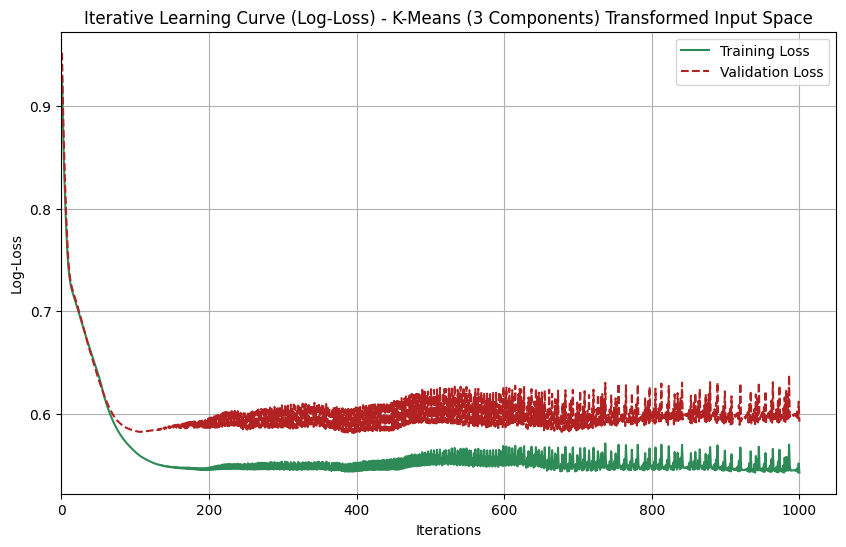

In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Apply K-Means clustering with 3 components and transform original features into cluster distances
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X_train_scaled)
X_train_kmeans = kmeans.transform(X_train_scaled)
X_test_kmeans = kmeans.transform(X_test_scaled)

# Initialize the MLPClassifier with parameters for iterative training
mlp_logloss = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,  # One iteration at a time
    warm_start=True,  # Allows the model to continue training from the previous state
    random_state=4
)

# Lists to store log loss (cross-entropy loss) values for each iteration
train_loss = []  # For training set
val_loss = []    # For validation set

# Number of iterations
n_iterations = 1000

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Iterative training and loss recording
for i in range(n_iterations):
    mlp_logloss.fit(X_train_kmeans, y_train)  # Train for one iteration on the new input space

    # Predict probabilities for each class on training and validation sets
    y_train_prob = mlp_logloss.predict_proba(X_train_kmeans)
    y_val_prob = mlp_logloss.predict_proba(X_test_kmeans)

    # Compute log loss for training and validation sets
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))

# Plotting the Iterative Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss) - K-Means (3 Components) Transformed Input Space')
plt.legend()
plt.grid(True)
plt.show()


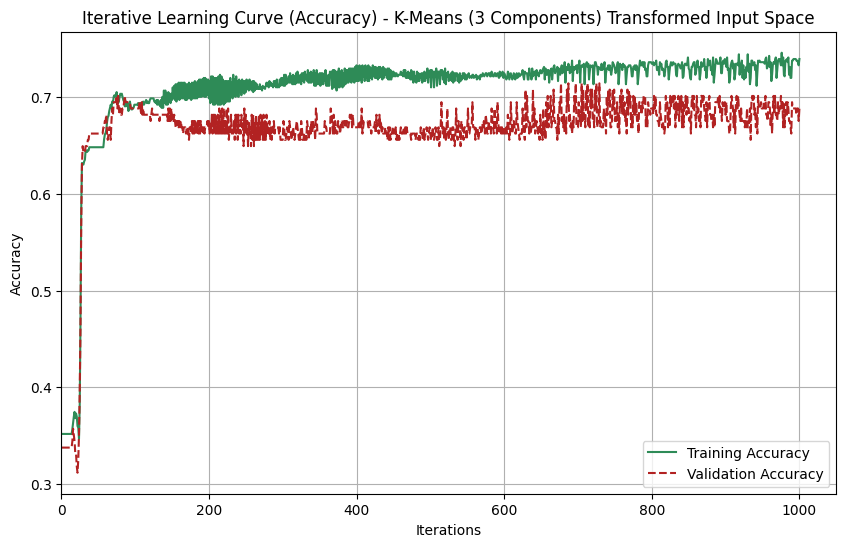

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn import preprocessing

# Suppress the ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Encode the labels for the target
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-Means clustering with 3 components and transform into cluster distances as the new input features
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X_train_scaled)
X_train_kmeans = kmeans.transform(X_train_scaled)  # Use distances to cluster centers as input for the neural network
X_test_kmeans = kmeans.transform(X_test_scaled)

# Initialize MLPClassifier for iterative accuracy tracking
mlp_accuracy = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,  # Train one iteration at a time
    warm_start=True,  # Continue training from the previous state
    random_state=4
)

# Lists to store accuracy values for each iteration
train_accuracy = []  # For training set
val_accuracy = []    # For validation set

# Number of iterations
n_iterations = 1000

# Training loop for incremental learning
for i in range(n_iterations):
    mlp_accuracy.fit(X_train_kmeans, y_train)  # Train the model on the K-Means clustering output

    # Predict on train and validation sets (K-Means clustering output as input)
    y_train_pred = mlp_accuracy.predict(X_train_kmeans)
    y_val_pred = mlp_accuracy.predict(X_test_kmeans)

    # Compute accuracy for train and validation sets
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    val_accuracy.append(accuracy_score(y_test, y_val_pred))

# Plotting the accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle="--")
plt.xlim(left=0)  # x-axis starting at 0
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy) - K-Means (3 Components) Transformed Input Space')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-Means clustering with 3 components and use distances to each cluster center as the new input features
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X_train_scaled)
X_train_kmeans = kmeans.transform(X_train_scaled)  # Use distances as input for the neural network
X_test_kmeans = kmeans.transform(X_test_scaled)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(3,), (3,3), (3,3,3), (5,), (5,5), (5,5,5), (8,), (8,8), (8,8,8), (10,), (10,10), (10,10,10), (12,), (12,12), (12,12,12)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=4), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search on the K-Means clustering output data
grid_search.fit(X_train_kmeans, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the training set with the best model
y_train_pred = best_model.predict(X_train_kmeans)

# Evaluate the model on training set
print("\nTraining Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))

# Train the final model on the entire training dataset
best_model.fit(X_train_kmeans, y_train)

# Evaluate the model by predicting values on the test dataset
y_test_pred = best_model.predict(X_test_kmeans)
print("\nTest Set Evaluation:")
print("Confusion matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification report:")
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

# Access the results of the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to store all parameter combinations and their corresponding scores
results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the mean test score in descending order (best combinations first)
ranked_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Keep relevant columns: rank, mean test score, and parameter combination
ranked_results_df = ranked_results_df[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate']]

# Show the top results for quick inspection
print("\nTop 10 Parameter Combinations by Cross-Validation Score:")
print(ranked_results_df.head(10))


Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation accuracy: 0.7035719045715048

Training Set Evaluation:
Confusion matrix:
[[335  63]
 [114 102]]

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       398
           1       0.62      0.47      0.54       216

    accuracy                           0.71       614
   macro avg       0.68      0.66      0.66       614
weighted avg       0.70      0.71      0.70       614


Test Set Evaluation:
Confusion matrix:
[[81 21]
 [30 22]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       102
           1       0.51      0.42      0.46        52

    accuracy                           0.67       154
   macro avg       0.62      0.61      0.61       154
weighted avg       0.66      0.6

In [ ]:
print("Based on grid search:")
print("Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (12,12,12), 'learning_rate': 'adaptive', 'solver': 'adam'}")

Based on grid search:
Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (12,12,12), 'learning_rate': 'adaptive', 'solver': 'adam'}


#### Combined Iterative Learning Curves (Clustering Algorithms)

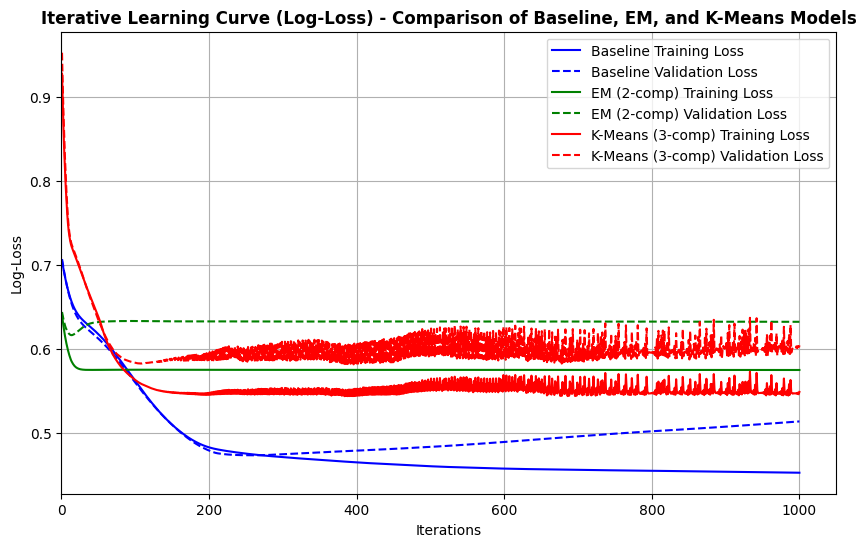

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)

# Prepare dictionaries to store the log-loss values for each model
loss_data = {
    "Baseline": {"train_loss": [], "val_loss": []},
    "EM": {"train_loss": [], "val_loss": []},
    "KMeans": {"train_loss": [], "val_loss": []}
}

# Number of iterations
n_iterations = 1000

# Baseline Model
mlp_baseline = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(8,8),
    solver='adam',
    alpha=0.0001,
    max_iter=1,
    warm_start=True,
    random_state=4
)

for _ in range(n_iterations):
    mlp_baseline.fit(X_train_scaled, y_train)
    y_train_prob = mlp_baseline.predict_proba(X_train_scaled)
    y_val_prob = mlp_baseline.predict_proba(X_test_scaled)
    loss_data["Baseline"]["train_loss"].append(log_loss(y_train, y_train_prob))
    loss_data["Baseline"]["val_loss"].append(log_loss(y_test, y_val_prob))

# EM Clustering Model
gmm = GaussianMixture(n_components=2, random_state=4)
gmm.fit(X_train_scaled)
X_train_gmm = gmm.predict_proba(X_train_scaled)
X_test_gmm = gmm.predict_proba(X_test_scaled)

mlp_em = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,
    warm_start=True,
    random_state=4
)

for _ in range(n_iterations):
    mlp_em.fit(X_train_gmm, y_train)
    y_train_prob = mlp_em.predict_proba(X_train_gmm)
    y_val_prob = mlp_em.predict_proba(X_test_gmm)
    loss_data["EM"]["train_loss"].append(log_loss(y_train, y_train_prob))
    loss_data["EM"]["val_loss"].append(log_loss(y_test, y_val_prob))

# K-Means Clustering Model
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X_train_scaled)
X_train_kmeans = kmeans.transform(X_train_scaled)
X_test_kmeans = kmeans.transform(X_test_scaled)

mlp_kmeans = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,
    warm_start=True,
    random_state=4
)

for _ in range(n_iterations):
    mlp_kmeans.fit(X_train_kmeans, y_train)
    y_train_prob = mlp_kmeans.predict_proba(X_train_kmeans)
    y_val_prob = mlp_kmeans.predict_proba(X_test_kmeans)
    loss_data["KMeans"]["train_loss"].append(log_loss(y_train, y_train_prob))
    loss_data["KMeans"]["val_loss"].append(log_loss(y_test, y_val_prob))

# Plotting the combined iterative learning curves
plt.figure(figsize=(10, 6))

# Baseline Model
plt.plot(range(1, n_iterations + 1), loss_data["Baseline"]["train_loss"], label='Baseline Training Loss', color='blue')
plt.plot(range(1, n_iterations + 1), loss_data["Baseline"]["val_loss"], label='Baseline Validation Loss', color='blue', linestyle="--")

# EM Model
plt.plot(range(1, n_iterations + 1), loss_data["EM"]["train_loss"], label='EM (2-comp) Training Loss', color='green')
plt.plot(range(1, n_iterations + 1), loss_data["EM"]["val_loss"], label='EM (2-comp) Validation Loss', color='green', linestyle="--")

# K-Means Model
plt.plot(range(1, n_iterations + 1), loss_data["KMeans"]["train_loss"], label='K-Means (3-comp) Training Loss', color='red')
plt.plot(range(1, n_iterations + 1), loss_data["KMeans"]["val_loss"], label='K-Means (3-comp) Validation Loss', color='red', linestyle="--")

plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss) - Comparison of Baseline, EM, and K-Means Models',fontweight='bold')
plt.legend()
plt.grid(True)
plt.xlim(left=0)
plt.show()


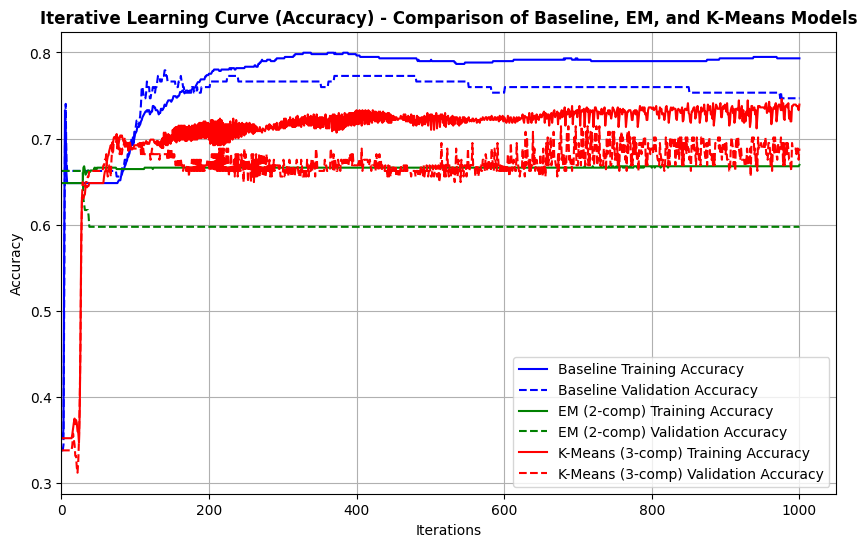

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Encode target labels
Label = preprocessing.LabelEncoder()
diabetes_outcome = Label.fit_transform(diabetes.target)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size=0.2, random_state=4, shuffle=True)

# Scale features
scaler_diab = StandardScaler()
X_train_scaled = scaler_diab.fit_transform(X_train)
X_test_scaled = scaler_diab.transform(X_test)  # Corrected line here

# Prepare dictionaries to store accuracy values for each model
accuracy_data = {
    "Baseline": {"train_accuracy": [], "val_accuracy": []},
    "EM": {"train_accuracy": [], "val_accuracy": []},
    "KMeans": {"train_accuracy": [], "val_accuracy": []}
}

# Number of iterations
n_iterations = 1000

# Baseline Model
mlp_baseline = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(8, 8),
    solver='adam',
    alpha=0.0001,
    max_iter=1,
    warm_start=True,
    random_state=4
)

for _ in range(n_iterations):
    mlp_baseline.fit(X_train_scaled, y_train)
    y_train_pred = mlp_baseline.predict(X_train_scaled)
    y_val_pred = mlp_baseline.predict(X_test_scaled)
    accuracy_data["Baseline"]["train_accuracy"].append(accuracy_score(y_train, y_train_pred))
    accuracy_data["Baseline"]["val_accuracy"].append(accuracy_score(y_test, y_val_pred))

# EM Clustering Model
gmm = GaussianMixture(n_components=2, random_state=4)
gmm.fit(X_train_scaled)
X_train_gmm = gmm.predict_proba(X_train_scaled)
X_test_gmm = gmm.predict_proba(X_test_scaled)

mlp_em = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,
    warm_start=True,
    random_state=4
)

for _ in range(n_iterations):
    mlp_em.fit(X_train_gmm, y_train)
    y_train_pred = mlp_em.predict(X_train_gmm)
    y_val_pred = mlp_em.predict(X_test_gmm)
    accuracy_data["EM"]["train_accuracy"].append(accuracy_score(y_train, y_train_pred))
    accuracy_data["EM"]["val_accuracy"].append(accuracy_score(y_test, y_val_pred))

# K-Means Clustering Model
kmeans = KMeans(n_clusters=3, random_state=4)
kmeans.fit(X_train_scaled)
X_train_kmeans = kmeans.transform(X_train_scaled)
X_test_kmeans = kmeans.transform(X_test_scaled)

mlp_kmeans = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(12, 12, 12),
    solver='adam',
    alpha=0.01,
    learning_rate='adaptive',
    max_iter=1,
    warm_start=True,
    random_state=4
)

for _ in range(n_iterations):
    mlp_kmeans.fit(X_train_kmeans, y_train)
    y_train_pred = mlp_kmeans.predict(X_train_kmeans)
    y_val_pred = mlp_kmeans.predict(X_test_kmeans)
    accuracy_data["KMeans"]["train_accuracy"].append(accuracy_score(y_train, y_train_pred))
    accuracy_data["KMeans"]["val_accuracy"].append(accuracy_score(y_test, y_val_pred))

# Plotting the combined iterative learning curves for accuracy
plt.figure(figsize=(10, 6))

# Baseline Model
plt.plot(range(1, n_iterations + 1), accuracy_data["Baseline"]["train_accuracy"], label='Baseline Training Accuracy', color='blue')
plt.plot(range(1, n_iterations + 1), accuracy_data["Baseline"]["val_accuracy"], label='Baseline Validation Accuracy', color='blue', linestyle="--")

# EM Model
plt.plot(range(1, n_iterations + 1), accuracy_data["EM"]["train_accuracy"], label='EM (2-comp) Training Accuracy', color='green')
plt.plot(range(1, n_iterations + 1), accuracy_data["EM"]["val_accuracy"], label='EM (2-comp) Validation Accuracy', color='green', linestyle="--")

# K-Means Model
plt.plot(range(1, n_iterations + 1), accuracy_data["KMeans"]["train_accuracy"], label='K-Means (3-comp) Training Accuracy', color='red')
plt.plot(range(1, n_iterations + 1), accuracy_data["KMeans"]["val_accuracy"], label='K-Means (3-comp) Validation Accuracy', color='red', linestyle="--")

plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy) - Comparison of Baseline, EM, and K-Means Models',fontweight='bold')
plt.legend(loc="lower right")  # Move the legend to the lower right corner
plt.grid(True)
plt.xlim(left=0)
plt.show()


### **Neural Networks (NN)**

##### **NN: Diabetes Dataset**

In [ ]:
from sklearn import preprocessing

# LabelEncoder is used to encode categorical labels (strings or numbers) into numerical values, specifically integers.
# This is useful in ML when you have categorical data that you need to convert to a numerical format, since ML algorithms require numerical input.
Label = preprocessing.LabelEncoder()

diabetes_outcome = Label.fit_transform(diabetes.target)
# print(diabetes_outcome)     # Categorical variable is converted to numerical variable

In [ ]:
# Split dataset in training dataset and test dataset.
# Training dataset: it is used to train and tune hyperparameters in model.
# Test dataset: it is used at the end once model is ready.
X_train, X_test, y_train, y_test = train_test_split(diabetes.features, diabetes_outcome, test_size = 0.2, random_state=sklearn_random_state, shuffle = True)  # 20% of data for testing purposes. Random_state for reproducible output. Shuffle data before splitting
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
# Scale features is recommended in ML models
from sklearn.preprocessing import StandardScaler
scaler_diab = StandardScaler()
scaler_diab.fit(X_train)                       # Fit the scaler on the training data (compute mean and std). This means it calculates the mean and standard deviation of each feature in the X_train dataset.
X_train = scaler_diab.fit_transform(X_train)   # Transform the training data
X_test = scaler_diab.transform(X_test)         # Transform the test data using the same scaler. This ensures that X_test is scaled using the mean and standard deviation calculated from the X_train dataset. Both X_train and X_test are scaled consistently.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

# Initialize MLPClassifier
MLP = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (8,8), solver = 'adam', alpha = 0.0001, max_iter = 600, random_state=sklearn_random_state)

# Perform cross-validation on the training data to evaluate performance of model
# Split the training data in k-fold, such as each fold takes a turn to be a validation set
cv_scores = cross_val_score(MLP, X_train, y_train, cv=5)      # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")                # Default estimator's scoring is used. For NN, it is accuracy
print(f"Average cross-validation score: {cv_scores.mean()}")

# Perform cross-validated predictions in X_train to assess how well the model generalizes to unseen data
y_train_pred = cross_val_predict(MLP, X_train, y_train, cv=5)

# Evaluate the model using cross-validated predictions on the training set
print("\nCross-validated training set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_train, y_train_pred))
print("Classification report: ")
print(classification_report(y_train, y_train_pred, zero_division = np.nan))
print("Accuracy score between y_train and y_train_pred: ")
print(accuracy_score(y_train, y_train_pred))

Cross-validation scores: [0.78861789 0.80487805 0.78861789 0.71544715 0.7704918 ]
Average cross-validation score: 0.7736105557776888

Cross-validated training set evaluation:
Confusion matrix: 
[[346  52]
 [ 87 129]]
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       398
           1       0.71      0.60      0.65       216

    accuracy                           0.77       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614

Accuracy score between y_train and y_train_pred: 
0.7736156351791531


In [ ]:
# Train the model on the entire training data
# Hyperparameters have been already tuned using cross validation
start_time = time.time()
MLP.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training time: {training_time:.4f} seconds")

# Print the number of iterations used to train the model
print("Number of iterations:")
print(MLP.n_iter_)

# Ensure that the model has been trained before accessing coefs_
if hasattr(MLP, 'coefs_'):
    # Extract and print the weights and biases of the model
    print("Model Weights:")
    for i, layer_weights in enumerate(MLP.coefs_):
        print(f"Layer {i+1} weights shape: {layer_weights.shape}")
        print(layer_weights)

    print("Model Biases:")
    for i, layer_biases in enumerate(MLP.intercepts_):
        print(f"Layer {i+1} biases shape: {layer_biases.shape}")
        print(layer_biases)
else:
    print("The model has not been trained yet or did not converge properly.")

# Evaluate the model by predicting values on the test dataset
query_start_time = time.time()
y_test_pred = MLP.predict(X_test)
query_time = time.time() - query_start_time
print(f"Query time (prediction time): {query_time:.4f} seconds")

print("y_test_pred: ")
print(y_test_pred)

# Compare to actual values in test dataset
print("y_test: ")
print(y_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Test set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report: ")
print(classification_report(y_test, y_test_pred, zero_division = np.nan))
print("Accuracy score between y_test and y_test_pred: ")
print(accuracy_score(y_test, y_test_pred))

Training time: 0.7660 seconds
Number of iterations:
425
Model Weights:
Layer 1 weights shape: (8, 8)
[[-0.0762723  -0.23151824  0.81229781 -0.19187014  0.63428997 -0.77975707
  -0.01175429 -0.55133953]
 [-1.23098951 -1.00607115  1.08660568 -1.08093839  1.10286296 -0.60198235
  -1.21489738 -0.81695222]
 [-0.00249592  0.08603961 -0.50192376  0.31262935 -0.35770602  0.46875861
   0.30735631  0.30258528]
 [-0.05179783 -0.20144982 -0.24950958 -0.0417107  -0.18520183  0.22914831
   0.1000186   0.16018415]
 [-0.32725907 -0.2897351  -0.29072584 -0.10727397 -0.250464    0.15601423
  -0.20010361 -0.16065537]
 [-1.04356896 -0.87266441  0.75491853 -1.08297789  0.46387463 -0.71872711
  -0.8313795  -0.97597408]
 [-0.60055791 -0.46618234  0.52591735 -0.51083611  0.40694262 -0.54092314
  -0.56628965 -0.60843532]
 [ 0.35842302  0.17265224  0.86905758 -0.03377181  0.89922639 -0.85105666
  -0.11494666  0.16401555]]
Layer 2 weights shape: (8, 8)
[[-0.46257731  0.74512804  0.14882092  0.53154291 -0.7965938

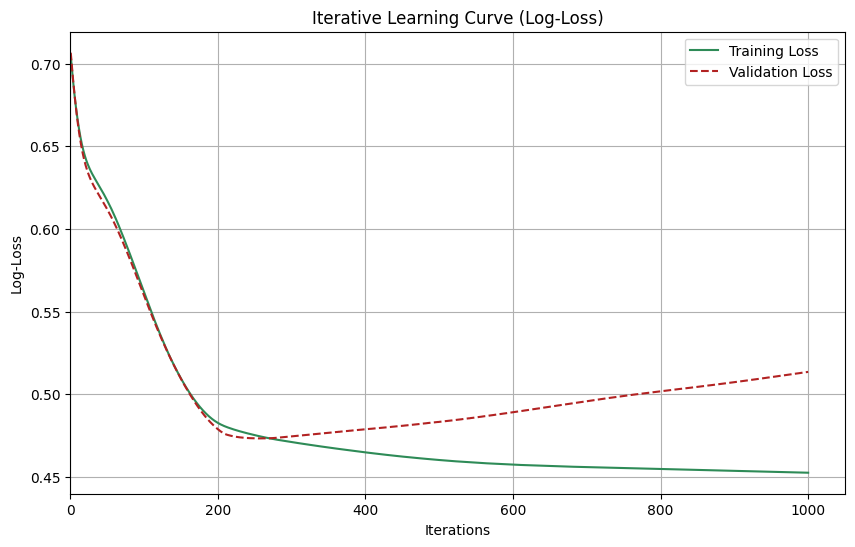

In [ ]:
# -- Iterative learning curve: iteration vs loss --

# Iterative learning curve shows how the loss changes over multiple iterations
# during training for both the training data and validation data.

# Per ChatGPT explanation:
# Scikit-learn's MLPClassifier provides a loss_curve_ attribute after training, which records the loss at each iteration.
# We'll use this attribute to plot the loss over iterations for both training and validation datasets.
# Re-initialize the MLPClassifier with necessary parameters
mlp_logloss = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(8,8),
    solver = 'adam', alpha = 0.0001,
    max_iter=1,  # One iteration (or epoch) of training will be done in each call of the fit() method. We will control number of iterations manually.
    warm_start=True,  # This allows the model to continue training from where it left off in the previous call to fit(). Without this, each call to fit() would restart the training from scratch.
    random_state = sklearn_random_state
)

# Lists to store log loss (cross-entropy loss) values for each iteration
train_loss = [] # For training set
val_loss = []   # For validation set

# Number of iterations
n_iterations = 1000

# Suppress the ConvergenceWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for i in range(n_iterations):
    mlp_logloss.fit(X_train, y_train)

    # Predict probabilities for each class. This is done for train and validation sets
    y_train_prob = mlp_logloss.predict_proba(X_train)
    # print("y_train_prob: ", y_train_prob)
    y_val_prob = mlp_logloss.predict_proba(X_test)
    # print("y_val_prob: ", y_val_prob)


    # Compute log loss (cross-entropy loss) for train and validation sets.
    # Log loss measures how well the model's predicted probabilities match the true class labels
    train_loss.append(log_loss(y_train, y_train_prob))
    val_loss.append(log_loss(y_test, y_val_prob))

# # Seee log loss values
# print("train_loss: ", train_loss)
# print("val_loss: ", val_loss)

# Plotting
plt.figure(figsize=(10, 6))
# Plotting training and validation loss
plt.plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color = 'firebrick', linestyle = "--")
# Set axis limits: Ensure x and y axes start from zero
plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0, top = 1)  # y-axis starting at 0
# plt.ylim(bottom=0)  # y-axis starting at 0
# Labels and title
plt.xlabel('Iterations')
plt.ylabel('Log-Loss')
plt.title('Iterative Learning Curve (Log-Loss)')
# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()

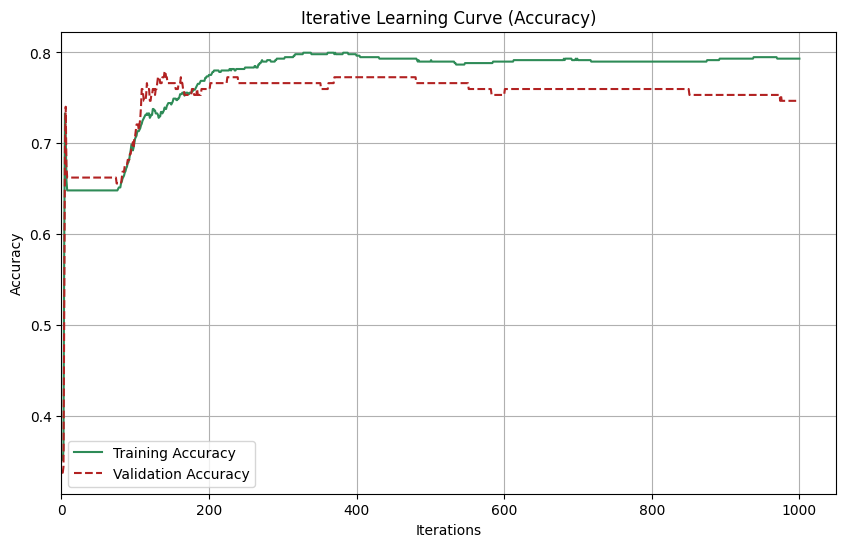

In [ ]:
# -- Iterative learning curve: iteration vs accuracy --

# Iterative learning curve shows how the accuracy changes over multiple iterations
# The goal is to observe how the model's performance improves (or not) over time.

# Per ChatGPT explanation:
# Similar to loss, we can track accuracy over iterations by evaluating the model's predictions after each incremental training step.
# We'll record accuracy on both training and validation datasets at each iteration.
# Re-initialize the MLPClassifier with necessary parameters
mlp_accuracy = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(8,8),
    solver = 'adam', alpha = 0.0001,
    max_iter=1,  # One iteration (or epoch) of training will be done in each call of the fit() method. We will control number of iterations manually.
    warm_start=True,  # This allows the model to continue training from where it left off in the previous call to fit(). Without this, each call to fit() would restart the training from scratch.
    random_state = sklearn_random_state
)

# Lists to store accuracy values
train_accuracy = [] # For training set
val_accuracy = []   # For validation set

# Number of iterations
n_iterations = 1000

# Suppress the ConvergenceWarning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

for i in range(n_iterations):
    mlp_accuracy.fit(X_train, y_train)

    # Predict on train and validation sets
    y_train_pred = mlp_accuracy.predict(X_train)
    y_val_pred = mlp_accuracy.predict(X_test)

    # Compute accuracy for train and validation sets
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    val_accuracy.append(accuracy_score(y_test, y_val_pred))

# Plotting
plt.figure(figsize=(10, 6))
# Plotting training and validation accuracy
plt.plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
plt.plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle = "--")
# Set axis limits: Ensure x and y axes start from zero
plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0)  # y-axis starting at 0
# Labels and title
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterative Learning Curve (Accuracy)')
# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()


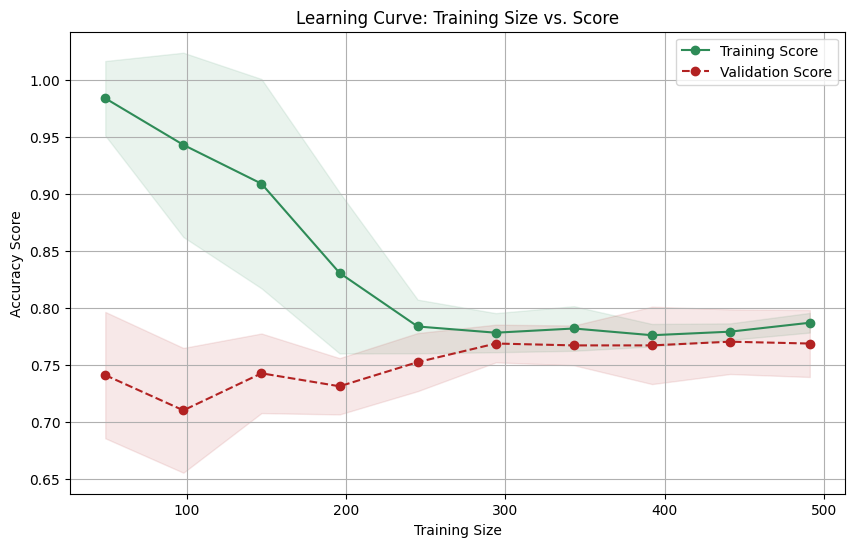

In [ ]:
# -- Learning curve: Training size vs score --
# Per ChatGPT explanation:
# We utilize scikit-learn's learning_curve function to assess how the model performance varies with different sizes of the training dataset.
# This helps in understanding whether the model would benefit from more data or is suffering from high bias/variance.
from sklearn.model_selection import learning_curve
import numpy as np

# Define the MLPClassifier
optimal_mlp = MLPClassifier(
    activation='logistic',
    hidden_layer_sizes=(8,8),
    solver = 'adam', alpha = 0.0001,
    max_iter=5000,
    random_state = sklearn_random_state
)

# Define the range of training sizes
train_sizes_lc = np.linspace(0.1, 1.0, 10)   # 0 values evenly spaced between 10% and 100%

# Compute learning curves
train_sizes_lc, train_scores, val_scores = learning_curve(
    estimator=optimal_mlp,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes_lc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    shuffle=True,
    random_state = sklearn_random_state
)

# Compute mean and standard deviation for training and validation scores
train_scores_mean_lc = np.mean(train_scores, axis=1)
train_scores_std_lc = np.std(train_scores, axis=1)
val_scores_mean_lc = np.mean(val_scores, axis=1)
val_scores_std_lc = np.std(val_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
# Plotting training and validation scores
plt.plot(train_sizes_lc, train_scores_mean_lc, 'o-', color='seagreen', label='Training Score')
plt.fill_between(train_sizes_lc, train_scores_mean_lc - train_scores_std_lc,
                 train_scores_mean_lc + train_scores_std_lc, alpha=0.1, color='seagreen')
plt.plot(train_sizes_lc, val_scores_mean_lc, 'o', color='firebrick', linestyle='--', label='Validation Score')
plt.fill_between(train_sizes_lc, val_scores_mean_lc - val_scores_std_lc,
                 val_scores_mean_lc + val_scores_std_lc, alpha=0.1, color='firebrick')
# # Set axis limits: Ensure x and y axes start from zero
# plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0)  # y-axis starting at 0
# Labels and title
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
# Show legend and grid
plt.title('Learning Curve: Training Size vs. Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


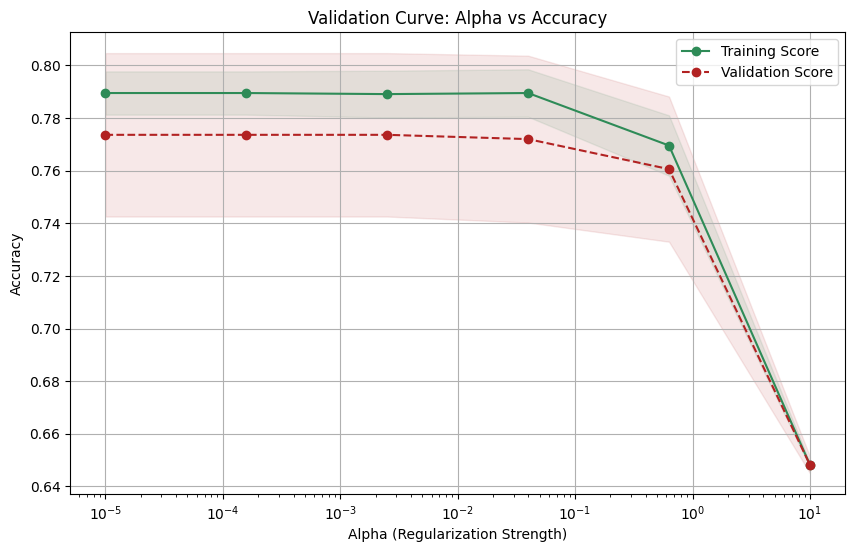

In [ ]:
# -- Validation curve --

# # Per ChatGPT explanation:
# A validation curve is a useful tool to understand how changes in a specific hyperparameter affect the model's performance. This can help in identifying whether the model is underfitting or overfitting.
# To create a validation curve, we’ll choose a hyperparameter to vary, such as the alpha parameter in the MLPClassifier. The validation curve will show the training and validation scores for different values of this hyperparameter.

from sklearn.model_selection import validation_curve

# Define the range of the hyperparameter 'alpha' to test
param_range_vc = np.logspace(-5, 1, 6)  # This generates 6 values for alpha, logarithmically spaced between 10^-4 and 10

# Compute the validation curve
train_scores, val_scores = validation_curve(
    estimator=MLPClassifier(activation='logistic',
    hidden_layer_sizes=(8, 8),
    solver = 'adam',
    max_iter=5000, random_state = sklearn_random_state),
    X=X_train,
    y=y_train,
    param_name='alpha',
    param_range=param_range_vc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Compute mean and standard deviation for training and validation scores
train_scores_mean_vc = np.mean(train_scores, axis=1)
train_scores_std_vc = np.std(train_scores, axis=1)
val_scores_mean_vc = np.mean(val_scores, axis=1)
val_scores_std_vc = np.std(val_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(param_range_vc, train_scores_mean_vc, 'o-', label='Training Score', color='seagreen')
plt.fill_between(param_range_vc, train_scores_mean_vc - train_scores_std_vc,
                 train_scores_mean_vc + train_scores_std_vc, alpha=0.1, color='seagreen')
plt.semilogx(param_range_vc, val_scores_mean_vc, 'o', label='Validation Score', linestyle='--', color='firebrick')
plt.fill_between(param_range_vc, val_scores_mean_vc - val_scores_std_vc,
                 val_scores_mean_vc + val_scores_std_vc, alpha=0.1, color='firebrick')
# # Set axis limits: Ensure x and y axes start from zero
# plt.xlim(left=0)  # x-axis starting at 0
# plt.ylim(bottom=0)  # y-axis starting at 0
# Labels and title
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Accuracy')
# Show legend and grid
plt.title('Validation Curve: Alpha vs Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


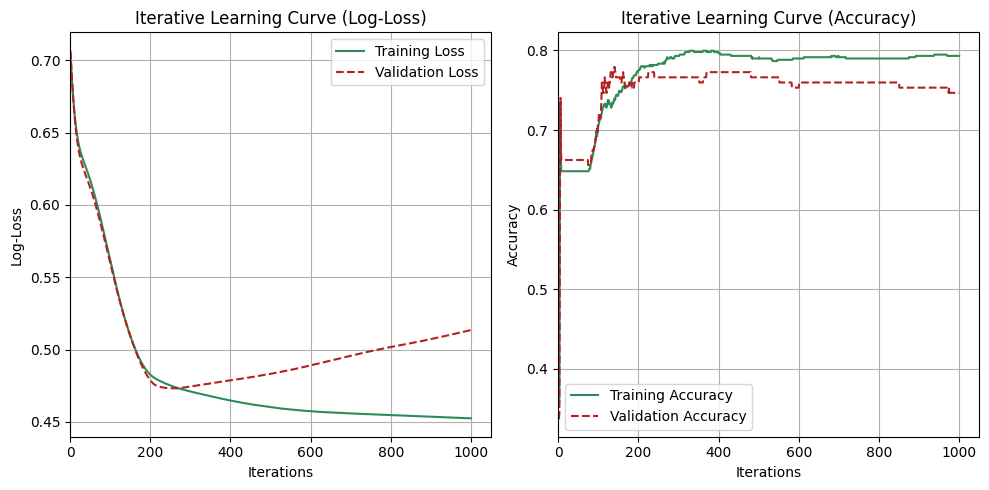

In [ ]:
# Combine all plots together
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Loss
axes[0].plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
axes[0].plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color = 'firebrick', linestyle = "--")
axes[0].set_xlim(left=0)  # x-axis starting at 0
# axes[0].set_ylim(bottom=0)  # y-axis starting at 0
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Log-Loss')
axes[0].set_title('Iterative Learning Curve (Log-Loss)')
axes[0].legend()
axes[0].grid(True)

# Plot for Accuracy
axes[1].plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
axes[1].plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle = "--")
axes[1].set_xlim(left=0)  # x-axis starting at 0
# axes[1].set_ylim(bottom=0)  # y-axis starting at 0
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Iterative Learning Curve (Accuracy)')
axes[1].legend()
axes[1].grid(True)

# # Add a big general title for all the subplots
# plt.suptitle('Iterative Learning Curves', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the suptitle
plt.tight_layout()
plt.show()

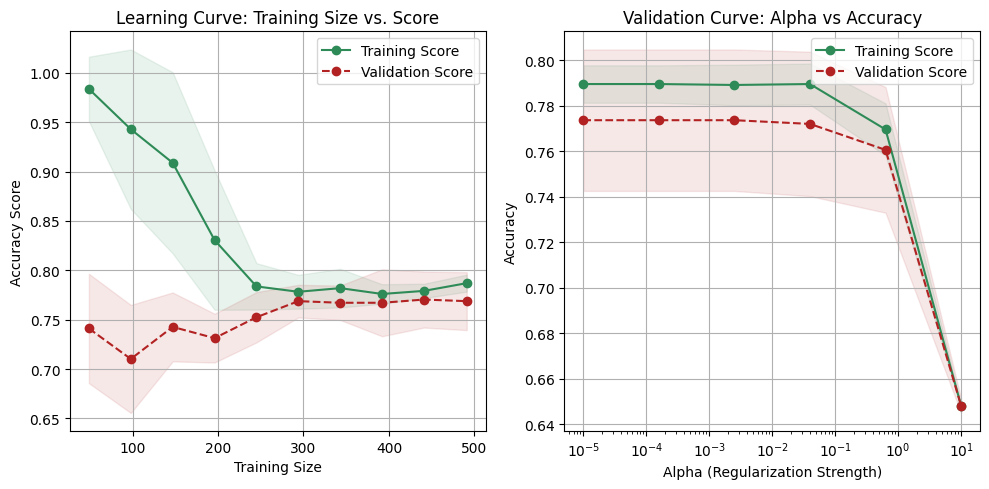

In [ ]:
# Combine all plots together
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Learning Curve
axes[0].plot(train_sizes_lc, train_scores_mean_lc, 'o-', color='seagreen', label='Training Score')
axes[0].fill_between(train_sizes_lc, train_scores_mean_lc - train_scores_std_lc,
                 train_scores_mean_lc + train_scores_std_lc, alpha=0.1, color='seagreen')
axes[0].plot(train_sizes_lc, val_scores_mean_lc, 'o', color='firebrick', linestyle='--', label='Validation Score')
axes[0].fill_between(train_sizes_lc, val_scores_mean_lc - val_scores_std_lc,
                 val_scores_mean_lc + val_scores_std_lc, alpha=0.1, color='firebrick')
axes[0].set_xlabel('Training Size')
axes[0].set_ylabel('Accuracy Score')
axes[0].set_title('Learning Curve: Training Size vs. Score')
axes[0].legend(loc='best')
axes[0].grid(True)

# Plot for Validation Curve
axes[1].semilogx(param_range_vc, train_scores_mean_vc, 'o-', label='Training Score', color='seagreen')
axes[1].fill_between(param_range_vc, train_scores_mean_vc - train_scores_std_vc,
                 train_scores_mean_vc + train_scores_std_vc, alpha=0.1, color='seagreen')
axes[1].semilogx(param_range_vc, val_scores_mean_vc, 'o', label='Validation Score', linestyle='--', color='firebrick')
axes[1].fill_between(param_range_vc, val_scores_mean_vc - val_scores_std_vc,
                 val_scores_mean_vc + val_scores_std_vc, alpha=0.1, color='firebrick')
axes[1].set_xlabel('Alpha (Regularization Strength)')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Validation Curve: Alpha vs Accuracy')
axes[1].legend(loc='best')
axes[1].grid(True)

# # Add a big general title for all the subplots
# plt.suptitle('Iterative Learning Curves', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the suptitle
plt.tight_layout()
plt.show()

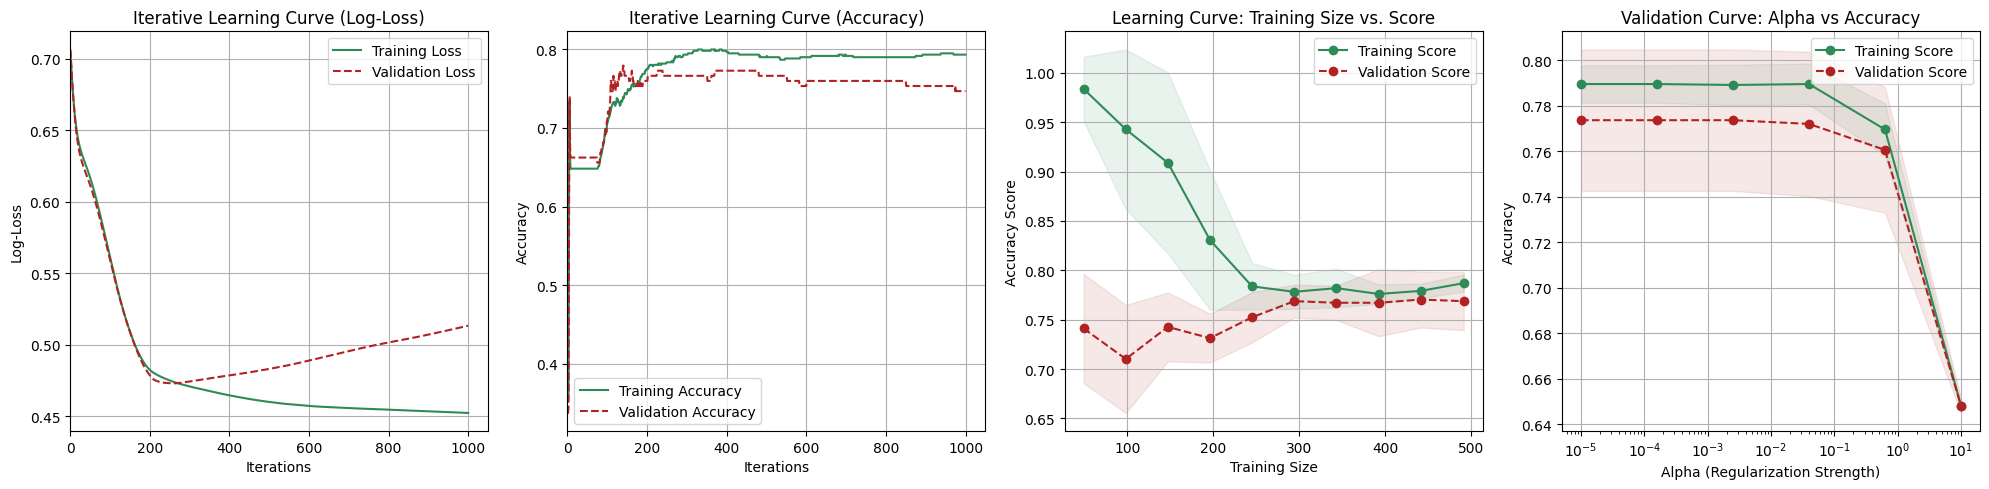

In [ ]:
# Combine all plots together
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot for Loss
axes[0].plot(range(1, n_iterations + 1), train_loss, label='Training Loss', color='seagreen')
axes[0].plot(range(1, n_iterations + 1), val_loss, label='Validation Loss', color = 'firebrick', linestyle = "--")
axes[0].set_xlim(left=0)  # x-axis starting at 0
# axes[0].set_ylim(bottom=0)  # y-axis starting at 0
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Log-Loss')
axes[0].set_title('Iterative Learning Curve (Log-Loss)')
axes[0].legend()
axes[0].grid(True)

# Plot for Accuracy
axes[1].plot(range(1, n_iterations + 1), train_accuracy, label='Training Accuracy', color='seagreen')
axes[1].plot(range(1, n_iterations + 1), val_accuracy, label='Validation Accuracy', color='firebrick', linestyle = "--")
axes[1].set_xlim(left=0)  # x-axis starting at 0
# axes[1].set_ylim(bottom=0)  # y-axis starting at 0
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Iterative Learning Curve (Accuracy)')
axes[1].legend()
axes[1].grid(True)

# Plot for Learning Curve
axes[2].plot(train_sizes_lc, train_scores_mean_lc, 'o-', color='seagreen', label='Training Score')
axes[2].fill_between(train_sizes_lc, train_scores_mean_lc - train_scores_std_lc,
                 train_scores_mean_lc + train_scores_std_lc, alpha=0.1, color='seagreen')
axes[2].plot(train_sizes_lc, val_scores_mean_lc, 'o', color='firebrick', linestyle='--', label='Validation Score')
axes[2].fill_between(train_sizes_lc, val_scores_mean_lc - val_scores_std_lc,
                 val_scores_mean_lc + val_scores_std_lc, alpha=0.1, color='firebrick')
axes[2].set_xlabel('Training Size')
axes[2].set_ylabel('Accuracy Score')
axes[2].set_title('Learning Curve: Training Size vs. Score')
axes[2].legend(loc='best')
axes[2].grid(True)

# Plot for Validation Curve
axes[3].semilogx(param_range_vc, train_scores_mean_vc, 'o-', label='Training Score', color='seagreen')
axes[3].fill_between(param_range_vc, train_scores_mean_vc - train_scores_std_vc,
                 train_scores_mean_vc + train_scores_std_vc, alpha=0.1, color='seagreen')
axes[3].semilogx(param_range_vc, val_scores_mean_vc, 'o', label='Validation Score', linestyle='--', color='firebrick')
axes[3].fill_between(param_range_vc, val_scores_mean_vc - val_scores_std_vc,
                 val_scores_mean_vc + val_scores_std_vc, alpha=0.1, color='firebrick')
axes[3].set_xlabel('Alpha (Regularization Strength)')
axes[3].set_ylabel('Accuracy')
axes[3].set_title('Validation Curve: Alpha vs Accuracy')
axes[3].legend(loc='best')
axes[3].grid(True)

# # Add a big general title for all the subplots
# plt.suptitle('Iterative Learning Curves', fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the suptitle
plt.tight_layout()
plt.show()

In [ ]:
# Grid search is used to find optimal hyperparameters
# Reference: https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

from sklearn.model_selection import GridSearchCV

# Define the parameter grid: They hyperparameters I want to explore
param_grid = {
    'hidden_layer_sizes': [(3), (3,3), (3,3,3), (5), (5,5), (5,5,5), (8), (8,8), (8,8,8), (10), (10,10), (10,10,10),(12), (12,12), (12,12,12)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(MLPClassifier(max_iter=5000, random_state=sklearn_random_state), param_grid, cv=5, scoring='accuracy', n_jobs=-1)   # Optimize accuracy, Number of jobs to run in parallel = -1 means using all processors

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the training set with the best model
y_train_pred = grid_search.predict(X_train)

# Evaluate the model
print("\nConfusion matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification report:")
print(classification_report(y_train, y_train_pred, zero_division=np.nan))

# Once we have run grid_sarch, train the final model on the entire training dataset
# Retrieve the best model
best_model = grid_search.best_estimator_  # or random_search.best_estimator_

# Train the final model on the entire training dataset
best_model.fit(X_train, y_train)

# Evaluate the model by predicting values on the test dataset
y_test_pred = best_model.predict(X_test)
print("y_test_pred: ")
print(y_test_pred)

# Compare to actual values in test dataset
print("y_test: ")
print(y_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Test set evaluation:")
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("Classification report: ")
print(classification_report(y_test, y_test_pred, zero_division = np.nan))

Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'solver': 'sgd'}
Best cross-validation accuracy: 0.7751832600293216

Confusion matrix:
[[346  52]
 [ 83 133]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       398
           1       0.72      0.62      0.66       216

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.78       614

y_test_pred: 
[0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0
 0 1 0 0 1 1]
y_test: 
[0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0

In [ ]:
# Access the results of the grid search
cv_results = grid_search.cv_results_

# Create a DataFrame to store all parameter combinations and their corresponding scores
results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the mean test score in descending order (best combinations first)
ranked_results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Keep relevant columns: rank, mean test score, and parameter combination
ranked_results_df = ranked_results_df[['rank_test_score', 'mean_test_score', 'param_hidden_layer_sizes', 'param_activation', 'param_solver', 'param_alpha', 'param_learning_rate']]

# Show the top results for quick inspection
print(ranked_results_df.head(10))

     rank_test_score  mean_test_score param_hidden_layer_sizes  \
193                1         0.775183                        5   
253                1         0.775183                        5   
313                1         0.775183                        5   
120                4         0.773611                        3   
122                4         0.773611                        3   
28                 6         0.773611                   (8, 8)   
30                 6         0.773611                   (8, 8)   
88                 6         0.773611                   (8, 8)   
90                 6         0.773611                   (8, 8)   
195               10         0.773557                        5   

    param_activation param_solver  param_alpha param_learning_rate  
193             tanh          sgd       0.0001            constant  
253             tanh          sgd       0.0010            constant  
313             tanh          sgd       0.0100            constant

In [ ]:
print("Based on grid search:")
print("Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'solver': 'sgd'}")

Based on grid search:
Best parameters found: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'solver': 'sgd'}
